In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets('/MNIST',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /MNIST\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /MNIST\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /MNIST\t10k-images-idx3-ubyte.gz
Extracting /MNIST\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


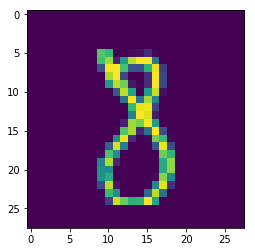

In [4]:
plt.imshow(mnist.train.images[112].reshape(28,28))

### Generator

In [5]:
def generator(z,reuse=None): #z=noise
    # to access architecture of layer belonginging the subset of paramater
    with tf.variable_scope('gen', reuse=reuse):
        hidden1=tf.layers.dense(inputs=z,units=128)
        alpha =0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        
        hidden2=tf.layers.dense(inputs=hidden1,units=128)
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        
        #as we're generating a new image so units =784
        output = tf.layers.dense(hidden2, units=784, activation=tf.nn.tanh)
        
        return output

### Discriminator

In [6]:
def discriminator(x,reuse=None): #z=noise
    # to access architecture of layer belonginging the subset of paramater
    with tf.variable_scope('dis', reuse=reuse):
        hidden1=tf.layers.dense(inputs=x,units=128)
        alpha =0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        
        hidden2=tf.layers.dense(inputs=hidden1,units=128)
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        
        #real or fake
        logits = tf.layers.dense(hidden2, units=1)
        output = tf.sigmoid(logits)
        
        return output,logits

In [7]:
real_images = tf.placeholder(tf.float32, shape=[None,784])
fake_image = tf.placeholder(tf.float32, shape=[None,784])
z = tf.placeholder(tf.float32, shape=[None,100])

In [8]:
G = generator(z)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


In [9]:
D_output_real, D_logits_real = discriminator(real_images)

In [10]:
D_output_fake, D_logits_fake = discriminator(G, reuse=True)

In [11]:
#Losses
def loss_fn(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in, labels=labels_in))

In [12]:
D_real_loss = loss_fn(D_logits_real, tf.ones_like(D_logits_real)*0.9) #0.9 is smoothing
D_fake_loss = loss_fn(D_logits_fake, tf.zeros_like(D_logits_real))

In [13]:
D_loss = D_real_loss + D_fake_loss

In [14]:
G_loss = loss_fn(D_logits_fake, tf.ones_like(D_logits_fake))

In [15]:
learning_rate = 0.001

tvar = tf.trainable_variables()

d_vars = [var for var in tvar if 'dis' in var.name]
g_vars = [var for var in tvar if 'gen' in var.name]

D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss,var_list=d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss,var_list=g_vars)

In [16]:
d_vars

[<tf.Variable 'dis/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'dis/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dis/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'dis/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dis/dense_2/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'dis/dense_2/bias:0' shape=(1,) dtype=float32_ref>]

In [17]:
batch_size = 256
epochs = 100
init=tf.global_variables_initializer()
gen_loss_dir = []
dis_loss_dir = []
samples = []

with tf.Session() as sess:
    sess.run(init)
    for epochs in range(epochs):
        num_batches = mnist.train.num_examples // batch_size
        for i in range(num_batches):
            
            batch=mnist.train.next_batch(batch_size)
            batch_image = batch[0].reshape((batch_size,784))
            
            batch_image = batch_image * 2 - 1 #rescale
            
            batch_z = np.random.uniform(-1,1,size=(batch_size,100))
            
            _ = sess.run(D_trainer, feed_dict ={real_images:batch_image,z:batch_z})
            _ = sess.run(G_trainer, feed_dict ={z:batch_z})
            
            d_loss = sess.run(D_loss, {z: batch_z, real_images: batch_image})
            g_loss = sess.run(G_loss, {z: batch_z})
            
            print ('Iteration : {} Generative Loss: {:.4f}  Discriminative Loss: {:.4f}'.format(epochs, g_loss, d_loss))
                
            gen_loss_dir.append(g_loss)
            dis_loss_dir.append(d_loss)
        
        sample_z = np.random.uniform(-1,1,size=(1,100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict={z:sample_z})
        
        samples.append(gen_sample)

Iteration : 0 Generative Loss: 0.5824  Discriminative Loss: 1.1523
Iteration : 0 Generative Loss: 0.5342  Discriminative Loss: 1.2603
Iteration : 0 Generative Loss: 0.5059  Discriminative Loss: 1.3010
Iteration : 0 Generative Loss: 0.4836  Discriminative Loss: 1.3114
Iteration : 0 Generative Loss: 0.4751  Discriminative Loss: 1.3063
Iteration : 0 Generative Loss: 0.4700  Discriminative Loss: 1.3220
Iteration : 0 Generative Loss: 0.4813  Discriminative Loss: 1.3295
Iteration : 0 Generative Loss: 0.5014  Discriminative Loss: 1.3037
Iteration : 0 Generative Loss: 0.5247  Discriminative Loss: 1.2613
Iteration : 0 Generative Loss: 0.5653  Discriminative Loss: 1.1888
Iteration : 0 Generative Loss: 0.6271  Discriminative Loss: 1.1031
Iteration : 0 Generative Loss: 0.7196  Discriminative Loss: 1.0023
Iteration : 0 Generative Loss: 0.8302  Discriminative Loss: 0.9061
Iteration : 0 Generative Loss: 0.9537  Discriminative Loss: 0.8218
Iteration : 0 Generative Loss: 1.0914  Discriminative Loss: 0.

Iteration : 0 Generative Loss: 3.3156  Discriminative Loss: 0.3717
Iteration : 0 Generative Loss: 3.5974  Discriminative Loss: 0.3653
Iteration : 0 Generative Loss: 3.8496  Discriminative Loss: 0.3559
Iteration : 0 Generative Loss: 4.0720  Discriminative Loss: 0.3553
Iteration : 0 Generative Loss: 4.1490  Discriminative Loss: 0.3539
Iteration : 0 Generative Loss: 4.1143  Discriminative Loss: 0.3563
Iteration : 0 Generative Loss: 3.7782  Discriminative Loss: 0.3620
Iteration : 0 Generative Loss: 3.5439  Discriminative Loss: 0.3734
Iteration : 0 Generative Loss: 3.1393  Discriminative Loss: 0.3898
Iteration : 0 Generative Loss: 2.8426  Discriminative Loss: 0.4086
Iteration : 0 Generative Loss: 2.6305  Discriminative Loss: 0.4214
Iteration : 0 Generative Loss: 2.5337  Discriminative Loss: 0.4347
Iteration : 0 Generative Loss: 2.4841  Discriminative Loss: 0.4281
Iteration : 0 Generative Loss: 2.6212  Discriminative Loss: 0.4181
Iteration : 0 Generative Loss: 2.8609  Discriminative Loss: 0.

Iteration : 1 Generative Loss: 3.5326  Discriminative Loss: 0.3633
Iteration : 1 Generative Loss: 3.6809  Discriminative Loss: 0.3625
Iteration : 1 Generative Loss: 3.7100  Discriminative Loss: 0.3578
Iteration : 1 Generative Loss: 3.7489  Discriminative Loss: 0.3555
Iteration : 1 Generative Loss: 3.8221  Discriminative Loss: 0.3538
Iteration : 1 Generative Loss: 3.9086  Discriminative Loss: 0.3589
Iteration : 1 Generative Loss: 3.7558  Discriminative Loss: 0.3563
Iteration : 1 Generative Loss: 3.6339  Discriminative Loss: 0.3634
Iteration : 1 Generative Loss: 3.6548  Discriminative Loss: 0.3657
Iteration : 1 Generative Loss: 3.4904  Discriminative Loss: 0.3741
Iteration : 1 Generative Loss: 3.1721  Discriminative Loss: 0.3841
Iteration : 1 Generative Loss: 3.1429  Discriminative Loss: 0.3880
Iteration : 1 Generative Loss: 3.3598  Discriminative Loss: 0.4092
Iteration : 1 Generative Loss: 2.7224  Discriminative Loss: 0.4372
Iteration : 1 Generative Loss: 2.7329  Discriminative Loss: 0.

Iteration : 1 Generative Loss: 3.6463  Discriminative Loss: 0.3689
Iteration : 1 Generative Loss: 4.3325  Discriminative Loss: 0.3727
Iteration : 1 Generative Loss: 4.4298  Discriminative Loss: 0.3577
Iteration : 1 Generative Loss: 4.3085  Discriminative Loss: 0.3602
Iteration : 1 Generative Loss: 4.7938  Discriminative Loss: 0.3515
Iteration : 1 Generative Loss: 5.5377  Discriminative Loss: 0.3606
Iteration : 1 Generative Loss: 5.4443  Discriminative Loss: 0.3434
Iteration : 1 Generative Loss: 5.2402  Discriminative Loss: 0.3500
Iteration : 1 Generative Loss: 5.2420  Discriminative Loss: 0.3461
Iteration : 1 Generative Loss: 5.2973  Discriminative Loss: 0.3599
Iteration : 1 Generative Loss: 4.2492  Discriminative Loss: 0.3627
Iteration : 1 Generative Loss: 3.7662  Discriminative Loss: 0.3761
Iteration : 1 Generative Loss: 3.8933  Discriminative Loss: 0.3535
Iteration : 1 Generative Loss: 4.3173  Discriminative Loss: 0.3745
Iteration : 1 Generative Loss: 4.4325  Discriminative Loss: 0.

Iteration : 2 Generative Loss: 2.4341  Discriminative Loss: 0.5249
Iteration : 2 Generative Loss: 4.4854  Discriminative Loss: 0.4578
Iteration : 2 Generative Loss: 4.4487  Discriminative Loss: 0.4736
Iteration : 2 Generative Loss: 2.7043  Discriminative Loss: 0.4513
Iteration : 2 Generative Loss: 1.8877  Discriminative Loss: 0.5818
Iteration : 2 Generative Loss: 2.1367  Discriminative Loss: 0.4934
Iteration : 2 Generative Loss: 3.1782  Discriminative Loss: 0.4405
Iteration : 2 Generative Loss: 3.7806  Discriminative Loss: 0.6189
Iteration : 2 Generative Loss: 2.3280  Discriminative Loss: 0.4541
Iteration : 2 Generative Loss: 1.6379  Discriminative Loss: 0.6057
Iteration : 2 Generative Loss: 2.0392  Discriminative Loss: 0.5239
Iteration : 2 Generative Loss: 3.3682  Discriminative Loss: 0.4418
Iteration : 2 Generative Loss: 4.6457  Discriminative Loss: 0.6075
Iteration : 2 Generative Loss: 2.9481  Discriminative Loss: 0.4481
Iteration : 2 Generative Loss: 2.1795  Discriminative Loss: 0.

Iteration : 2 Generative Loss: 3.4703  Discriminative Loss: 0.3856
Iteration : 2 Generative Loss: 4.3012  Discriminative Loss: 0.3984
Iteration : 2 Generative Loss: 4.2694  Discriminative Loss: 0.3969
Iteration : 2 Generative Loss: 2.9693  Discriminative Loss: 0.4219
Iteration : 2 Generative Loss: 2.6047  Discriminative Loss: 0.4607
Iteration : 2 Generative Loss: 3.4342  Discriminative Loss: 0.3891
Iteration : 2 Generative Loss: 4.6381  Discriminative Loss: 0.4356
Iteration : 2 Generative Loss: 4.1440  Discriminative Loss: 0.4150
Iteration : 2 Generative Loss: 2.7906  Discriminative Loss: 0.4275
Iteration : 2 Generative Loss: 2.4429  Discriminative Loss: 0.4564
Iteration : 2 Generative Loss: 3.1358  Discriminative Loss: 0.4283
Iteration : 3 Generative Loss: 3.6549  Discriminative Loss: 0.4706
Iteration : 3 Generative Loss: 2.0859  Discriminative Loss: 0.5294
Iteration : 3 Generative Loss: 2.0030  Discriminative Loss: 0.5540
Iteration : 3 Generative Loss: 3.0880  Discriminative Loss: 0.

Iteration : 3 Generative Loss: 3.3221  Discriminative Loss: 0.4453
Iteration : 3 Generative Loss: 3.3090  Discriminative Loss: 0.4240
Iteration : 3 Generative Loss: 3.7339  Discriminative Loss: 0.3927
Iteration : 3 Generative Loss: 4.3421  Discriminative Loss: 0.4047
Iteration : 3 Generative Loss: 4.6919  Discriminative Loss: 0.4041
Iteration : 3 Generative Loss: 4.3660  Discriminative Loss: 0.3977
Iteration : 3 Generative Loss: 3.5973  Discriminative Loss: 0.4028
Iteration : 3 Generative Loss: 2.8619  Discriminative Loss: 0.4673
Iteration : 3 Generative Loss: 3.0291  Discriminative Loss: 0.4461
Iteration : 3 Generative Loss: 3.6353  Discriminative Loss: 0.4646
Iteration : 3 Generative Loss: 2.9361  Discriminative Loss: 0.4368
Iteration : 3 Generative Loss: 3.0597  Discriminative Loss: 0.4352
Iteration : 3 Generative Loss: 4.0691  Discriminative Loss: 0.4198
Iteration : 3 Generative Loss: 4.0662  Discriminative Loss: 0.4175
Iteration : 3 Generative Loss: 4.1371  Discriminative Loss: 0.

Iteration : 4 Generative Loss: 1.8592  Discriminative Loss: 0.6533
Iteration : 4 Generative Loss: 2.5156  Discriminative Loss: 0.6386
Iteration : 4 Generative Loss: 2.7493  Discriminative Loss: 0.6953
Iteration : 4 Generative Loss: 1.7810  Discriminative Loss: 0.7578
Iteration : 4 Generative Loss: 2.3862  Discriminative Loss: 0.6689
Iteration : 4 Generative Loss: 3.0828  Discriminative Loss: 0.6015
Iteration : 4 Generative Loss: 2.6530  Discriminative Loss: 0.5217
Iteration : 4 Generative Loss: 3.5331  Discriminative Loss: 0.4442
Iteration : 4 Generative Loss: 4.9939  Discriminative Loss: 0.4086
Iteration : 4 Generative Loss: 6.3130  Discriminative Loss: 0.4274
Iteration : 4 Generative Loss: 6.4197  Discriminative Loss: 0.4225
Iteration : 4 Generative Loss: 5.5551  Discriminative Loss: 0.3941
Iteration : 4 Generative Loss: 4.8303  Discriminative Loss: 0.4137
Iteration : 4 Generative Loss: 4.7851  Discriminative Loss: 0.4136
Iteration : 4 Generative Loss: 5.0282  Discriminative Loss: 0.

Iteration : 4 Generative Loss: 2.5439  Discriminative Loss: 0.5502
Iteration : 4 Generative Loss: 2.0846  Discriminative Loss: 0.5746
Iteration : 4 Generative Loss: 1.7898  Discriminative Loss: 0.6299
Iteration : 4 Generative Loss: 2.1911  Discriminative Loss: 0.6357
Iteration : 4 Generative Loss: 1.9059  Discriminative Loss: 0.6271
Iteration : 4 Generative Loss: 1.7363  Discriminative Loss: 0.6328
Iteration : 4 Generative Loss: 2.0924  Discriminative Loss: 0.6307
Iteration : 4 Generative Loss: 2.0265  Discriminative Loss: 0.6227
Iteration : 4 Generative Loss: 1.4779  Discriminative Loss: 0.6977
Iteration : 4 Generative Loss: 2.2402  Discriminative Loss: 0.6295
Iteration : 4 Generative Loss: 2.4642  Discriminative Loss: 0.6296
Iteration : 4 Generative Loss: 2.0965  Discriminative Loss: 0.5562
Iteration : 4 Generative Loss: 2.5139  Discriminative Loss: 0.4943
Iteration : 4 Generative Loss: 3.7054  Discriminative Loss: 0.4315
Iteration : 4 Generative Loss: 4.0989  Discriminative Loss: 0.

Iteration : 5 Generative Loss: 3.4538  Discriminative Loss: 0.4043
Iteration : 5 Generative Loss: 3.9150  Discriminative Loss: 0.4083
Iteration : 5 Generative Loss: 4.1625  Discriminative Loss: 0.4037
Iteration : 5 Generative Loss: 3.9967  Discriminative Loss: 0.4093
Iteration : 5 Generative Loss: 3.6869  Discriminative Loss: 0.4069
Iteration : 5 Generative Loss: 3.3960  Discriminative Loss: 0.4496
Iteration : 5 Generative Loss: 3.3256  Discriminative Loss: 0.4457
Iteration : 5 Generative Loss: 3.0189  Discriminative Loss: 0.4859
Iteration : 5 Generative Loss: 2.9249  Discriminative Loss: 0.4725
Iteration : 5 Generative Loss: 2.6995  Discriminative Loss: 0.5024
Iteration : 5 Generative Loss: 2.6613  Discriminative Loss: 0.5049
Iteration : 5 Generative Loss: 2.5860  Discriminative Loss: 0.5289
Iteration : 5 Generative Loss: 2.3178  Discriminative Loss: 0.5508
Iteration : 5 Generative Loss: 2.4765  Discriminative Loss: 0.5241
Iteration : 5 Generative Loss: 2.5349  Discriminative Loss: 0.

Iteration : 5 Generative Loss: 2.6010  Discriminative Loss: 0.5008
Iteration : 5 Generative Loss: 2.7556  Discriminative Loss: 0.4711
Iteration : 5 Generative Loss: 2.9965  Discriminative Loss: 0.4839
Iteration : 5 Generative Loss: 3.1807  Discriminative Loss: 0.4546
Iteration : 5 Generative Loss: 3.0624  Discriminative Loss: 0.4567
Iteration : 5 Generative Loss: 3.0970  Discriminative Loss: 0.4432
Iteration : 5 Generative Loss: 3.0913  Discriminative Loss: 0.4613
Iteration : 5 Generative Loss: 3.0021  Discriminative Loss: 0.4619
Iteration : 5 Generative Loss: 2.8511  Discriminative Loss: 0.4738
Iteration : 5 Generative Loss: 2.7457  Discriminative Loss: 0.4721
Iteration : 5 Generative Loss: 2.8301  Discriminative Loss: 0.4767
Iteration : 5 Generative Loss: 2.5430  Discriminative Loss: 0.4989
Iteration : 5 Generative Loss: 2.1760  Discriminative Loss: 0.5422
Iteration : 5 Generative Loss: 2.3847  Discriminative Loss: 0.5369
Iteration : 5 Generative Loss: 2.6516  Discriminative Loss: 0.

Iteration : 6 Generative Loss: 3.9428  Discriminative Loss: 0.5661
Iteration : 6 Generative Loss: 2.5553  Discriminative Loss: 0.6212
Iteration : 6 Generative Loss: 2.5967  Discriminative Loss: 0.5824
Iteration : 6 Generative Loss: 3.8122  Discriminative Loss: 0.5721
Iteration : 6 Generative Loss: 3.4237  Discriminative Loss: 0.5434
Iteration : 6 Generative Loss: 2.5774  Discriminative Loss: 0.5345
Iteration : 6 Generative Loss: 3.0041  Discriminative Loss: 0.5337
Iteration : 6 Generative Loss: 3.9808  Discriminative Loss: 0.4868
Iteration : 6 Generative Loss: 4.7955  Discriminative Loss: 0.4776
Iteration : 6 Generative Loss: 4.4377  Discriminative Loss: 0.4603
Iteration : 6 Generative Loss: 3.4915  Discriminative Loss: 0.4609
Iteration : 6 Generative Loss: 3.3154  Discriminative Loss: 0.4687
Iteration : 6 Generative Loss: 3.8179  Discriminative Loss: 0.4330
Iteration : 6 Generative Loss: 4.2921  Discriminative Loss: 0.4542
Iteration : 6 Generative Loss: 3.6769  Discriminative Loss: 0.

Iteration : 7 Generative Loss: 3.6264  Discriminative Loss: 0.4410
Iteration : 7 Generative Loss: 3.6879  Discriminative Loss: 0.4344
Iteration : 7 Generative Loss: 4.1095  Discriminative Loss: 0.4328
Iteration : 7 Generative Loss: 3.7819  Discriminative Loss: 0.4235
Iteration : 7 Generative Loss: 3.4920  Discriminative Loss: 0.4160
Iteration : 7 Generative Loss: 3.5119  Discriminative Loss: 0.4178
Iteration : 7 Generative Loss: 3.7177  Discriminative Loss: 0.4174
Iteration : 7 Generative Loss: 3.0751  Discriminative Loss: 0.4315
Iteration : 7 Generative Loss: 3.5406  Discriminative Loss: 0.4146
Iteration : 7 Generative Loss: 4.6115  Discriminative Loss: 0.4207
Iteration : 7 Generative Loss: 3.6768  Discriminative Loss: 0.4284
Iteration : 7 Generative Loss: 3.2169  Discriminative Loss: 0.4444
Iteration : 7 Generative Loss: 4.1801  Discriminative Loss: 0.4379
Iteration : 7 Generative Loss: 3.9435  Discriminative Loss: 0.4559
Iteration : 7 Generative Loss: 2.8787  Discriminative Loss: 0.

Iteration : 7 Generative Loss: 2.3605  Discriminative Loss: 0.6108
Iteration : 7 Generative Loss: 1.8879  Discriminative Loss: 0.6588
Iteration : 7 Generative Loss: 3.3242  Discriminative Loss: 0.5521
Iteration : 7 Generative Loss: 3.8726  Discriminative Loss: 0.5639
Iteration : 7 Generative Loss: 3.6447  Discriminative Loss: 0.5153
Iteration : 7 Generative Loss: 2.9169  Discriminative Loss: 0.4943
Iteration : 7 Generative Loss: 2.9616  Discriminative Loss: 0.4885
Iteration : 7 Generative Loss: 3.6154  Discriminative Loss: 0.4601
Iteration : 7 Generative Loss: 4.1815  Discriminative Loss: 0.4597
Iteration : 7 Generative Loss: 4.0305  Discriminative Loss: 0.4656
Iteration : 7 Generative Loss: 3.1521  Discriminative Loss: 0.4745
Iteration : 7 Generative Loss: 2.8919  Discriminative Loss: 0.4778
Iteration : 7 Generative Loss: 3.6135  Discriminative Loss: 0.4196
Iteration : 7 Generative Loss: 4.6078  Discriminative Loss: 0.4173
Iteration : 7 Generative Loss: 5.1785  Discriminative Loss: 0.

Iteration : 8 Generative Loss: 2.7824  Discriminative Loss: 0.5634
Iteration : 8 Generative Loss: 2.8470  Discriminative Loss: 0.5159
Iteration : 8 Generative Loss: 2.8469  Discriminative Loss: 0.5150
Iteration : 8 Generative Loss: 2.9770  Discriminative Loss: 0.5063
Iteration : 8 Generative Loss: 2.8953  Discriminative Loss: 0.5023
Iteration : 8 Generative Loss: 3.1714  Discriminative Loss: 0.4849
Iteration : 8 Generative Loss: 3.4417  Discriminative Loss: 0.4641
Iteration : 8 Generative Loss: 3.8654  Discriminative Loss: 0.4614
Iteration : 8 Generative Loss: 4.3102  Discriminative Loss: 0.4335
Iteration : 8 Generative Loss: 4.4755  Discriminative Loss: 0.4370
Iteration : 8 Generative Loss: 4.5548  Discriminative Loss: 0.4498
Iteration : 8 Generative Loss: 4.6720  Discriminative Loss: 0.4337
Iteration : 8 Generative Loss: 5.0248  Discriminative Loss: 0.4230
Iteration : 8 Generative Loss: 4.6706  Discriminative Loss: 0.4380
Iteration : 8 Generative Loss: 4.5066  Discriminative Loss: 0.

Iteration : 8 Generative Loss: 5.1689  Discriminative Loss: 0.5130
Iteration : 8 Generative Loss: 5.2146  Discriminative Loss: 0.4724
Iteration : 8 Generative Loss: 4.8674  Discriminative Loss: 0.4758
Iteration : 8 Generative Loss: 6.0714  Discriminative Loss: 0.4360
Iteration : 8 Generative Loss: 7.0402  Discriminative Loss: 0.4380
Iteration : 8 Generative Loss: 6.5093  Discriminative Loss: 0.4381
Iteration : 8 Generative Loss: 5.2406  Discriminative Loss: 0.4292
Iteration : 8 Generative Loss: 4.8665  Discriminative Loss: 0.4380
Iteration : 8 Generative Loss: 5.3248  Discriminative Loss: 0.4163
Iteration : 8 Generative Loss: 5.6250  Discriminative Loss: 0.4612
Iteration : 8 Generative Loss: 4.6506  Discriminative Loss: 0.4335
Iteration : 8 Generative Loss: 3.4006  Discriminative Loss: 0.4977
Iteration : 8 Generative Loss: 3.5318  Discriminative Loss: 0.4587
Iteration : 8 Generative Loss: 3.8867  Discriminative Loss: 0.5608
Iteration : 8 Generative Loss: 3.4296  Discriminative Loss: 0.

Iteration : 9 Generative Loss: 6.0925  Discriminative Loss: 0.6690
Iteration : 9 Generative Loss: 6.8331  Discriminative Loss: 0.5894
Iteration : 9 Generative Loss: 6.3170  Discriminative Loss: 0.5517
Iteration : 9 Generative Loss: 5.4727  Discriminative Loss: 0.6187
Iteration : 9 Generative Loss: 5.5610  Discriminative Loss: 0.6077
Iteration : 9 Generative Loss: 4.1211  Discriminative Loss: 0.6071
Iteration : 9 Generative Loss: 2.9888  Discriminative Loss: 0.7499
Iteration : 9 Generative Loss: 3.0653  Discriminative Loss: 0.7581
Iteration : 9 Generative Loss: 1.9914  Discriminative Loss: 0.8546
Iteration : 9 Generative Loss: 3.8444  Discriminative Loss: 0.8897
Iteration : 9 Generative Loss: 1.9034  Discriminative Loss: 0.9086
Iteration : 9 Generative Loss: 3.5784  Discriminative Loss: 0.7650
Iteration : 9 Generative Loss: 3.6033  Discriminative Loss: 0.7963
Iteration : 9 Generative Loss: 1.0325  Discriminative Loss: 1.2394
Iteration : 9 Generative Loss: 4.8522  Discriminative Loss: 1.

Iteration : 9 Generative Loss: 2.4538  Discriminative Loss: 0.7188
Iteration : 9 Generative Loss: 3.0034  Discriminative Loss: 0.6753
Iteration : 9 Generative Loss: 3.3656  Discriminative Loss: 0.6220
Iteration : 10 Generative Loss: 3.9731  Discriminative Loss: 0.6117
Iteration : 10 Generative Loss: 4.7379  Discriminative Loss: 0.5877
Iteration : 10 Generative Loss: 5.6856  Discriminative Loss: 0.5947
Iteration : 10 Generative Loss: 5.5770  Discriminative Loss: 0.6051
Iteration : 10 Generative Loss: 5.3062  Discriminative Loss: 0.5469
Iteration : 10 Generative Loss: 5.3559  Discriminative Loss: 0.5524
Iteration : 10 Generative Loss: 5.2088  Discriminative Loss: 0.5404
Iteration : 10 Generative Loss: 4.9965  Discriminative Loss: 0.6010
Iteration : 10 Generative Loss: 4.6254  Discriminative Loss: 0.6261
Iteration : 10 Generative Loss: 4.1213  Discriminative Loss: 0.6462
Iteration : 10 Generative Loss: 3.6678  Discriminative Loss: 0.6129
Iteration : 10 Generative Loss: 3.4443  Discriminat

Iteration : 10 Generative Loss: 3.6018  Discriminative Loss: 0.5446
Iteration : 10 Generative Loss: 3.5411  Discriminative Loss: 0.5448
Iteration : 10 Generative Loss: 3.8754  Discriminative Loss: 0.5266
Iteration : 10 Generative Loss: 4.4626  Discriminative Loss: 0.5236
Iteration : 10 Generative Loss: 4.5268  Discriminative Loss: 0.5500
Iteration : 10 Generative Loss: 3.8189  Discriminative Loss: 0.5333
Iteration : 10 Generative Loss: 3.0727  Discriminative Loss: 0.5404
Iteration : 10 Generative Loss: 3.2867  Discriminative Loss: 0.5377
Iteration : 10 Generative Loss: 4.0913  Discriminative Loss: 0.5373
Iteration : 10 Generative Loss: 4.1813  Discriminative Loss: 0.5310
Iteration : 10 Generative Loss: 3.1246  Discriminative Loss: 0.5260
Iteration : 10 Generative Loss: 2.6803  Discriminative Loss: 0.5647
Iteration : 10 Generative Loss: 3.0481  Discriminative Loss: 0.5632
Iteration : 10 Generative Loss: 3.3941  Discriminative Loss: 0.5549
Iteration : 10 Generative Loss: 2.8469  Discrimi

Iteration : 11 Generative Loss: 3.3510  Discriminative Loss: 0.5396
Iteration : 11 Generative Loss: 3.7418  Discriminative Loss: 0.6178
Iteration : 11 Generative Loss: 3.6125  Discriminative Loss: 0.5489
Iteration : 11 Generative Loss: 4.2066  Discriminative Loss: 0.5224
Iteration : 11 Generative Loss: 5.0462  Discriminative Loss: 0.4896
Iteration : 11 Generative Loss: 5.4374  Discriminative Loss: 0.4970
Iteration : 11 Generative Loss: 4.8607  Discriminative Loss: 0.5036
Iteration : 11 Generative Loss: 6.0164  Discriminative Loss: 0.4835
Iteration : 11 Generative Loss: 6.4055  Discriminative Loss: 0.4609
Iteration : 11 Generative Loss: 6.0675  Discriminative Loss: 0.4572
Iteration : 11 Generative Loss: 5.0199  Discriminative Loss: 0.4807
Iteration : 11 Generative Loss: 5.0234  Discriminative Loss: 0.4750
Iteration : 11 Generative Loss: 5.1103  Discriminative Loss: 0.4877
Iteration : 11 Generative Loss: 4.0445  Discriminative Loss: 0.5205
Iteration : 11 Generative Loss: 2.9967  Discrimi

Iteration : 11 Generative Loss: 3.2181  Discriminative Loss: 0.5206
Iteration : 11 Generative Loss: 3.3892  Discriminative Loss: 0.5883
Iteration : 11 Generative Loss: 2.9697  Discriminative Loss: 0.5698
Iteration : 11 Generative Loss: 2.4231  Discriminative Loss: 0.5852
Iteration : 11 Generative Loss: 2.3298  Discriminative Loss: 0.6013
Iteration : 11 Generative Loss: 2.6608  Discriminative Loss: 0.6130
Iteration : 11 Generative Loss: 2.6281  Discriminative Loss: 0.6502
Iteration : 11 Generative Loss: 2.3445  Discriminative Loss: 0.6206
Iteration : 11 Generative Loss: 2.4449  Discriminative Loss: 0.6392
Iteration : 11 Generative Loss: 2.8107  Discriminative Loss: 0.6406
Iteration : 11 Generative Loss: 2.8510  Discriminative Loss: 0.5922
Iteration : 11 Generative Loss: 3.1574  Discriminative Loss: 0.5421
Iteration : 11 Generative Loss: 3.2946  Discriminative Loss: 0.5275
Iteration : 11 Generative Loss: 3.5623  Discriminative Loss: 0.5044
Iteration : 11 Generative Loss: 3.7536  Discrimi

Iteration : 12 Generative Loss: 2.6052  Discriminative Loss: 0.7709
Iteration : 12 Generative Loss: 2.2869  Discriminative Loss: 0.6291
Iteration : 12 Generative Loss: 1.7695  Discriminative Loss: 0.7655
Iteration : 12 Generative Loss: 2.5124  Discriminative Loss: 0.7247
Iteration : 12 Generative Loss: 2.3658  Discriminative Loss: 0.7264
Iteration : 12 Generative Loss: 2.0051  Discriminative Loss: 0.6610
Iteration : 12 Generative Loss: 1.9757  Discriminative Loss: 0.7067
Iteration : 12 Generative Loss: 2.4004  Discriminative Loss: 0.7019
Iteration : 12 Generative Loss: 1.9434  Discriminative Loss: 0.7215
Iteration : 12 Generative Loss: 1.9010  Discriminative Loss: 0.6740
Iteration : 12 Generative Loss: 2.2368  Discriminative Loss: 0.6999
Iteration : 12 Generative Loss: 2.1399  Discriminative Loss: 0.7222
Iteration : 12 Generative Loss: 1.8779  Discriminative Loss: 0.7279
Iteration : 12 Generative Loss: 2.1643  Discriminative Loss: 0.6771
Iteration : 12 Generative Loss: 2.0458  Discrimi

Iteration : 12 Generative Loss: 2.2038  Discriminative Loss: 0.9170
Iteration : 12 Generative Loss: 3.7055  Discriminative Loss: 0.8028
Iteration : 12 Generative Loss: 5.3933  Discriminative Loss: 0.7921
Iteration : 12 Generative Loss: 6.0122  Discriminative Loss: 0.6509
Iteration : 12 Generative Loss: 6.3896  Discriminative Loss: 0.6071
Iteration : 12 Generative Loss: 7.8655  Discriminative Loss: 0.5435
Iteration : 12 Generative Loss: 8.7960  Discriminative Loss: 0.5406
Iteration : 12 Generative Loss: 8.2021  Discriminative Loss: 0.6519
Iteration : 12 Generative Loss: 8.0082  Discriminative Loss: 0.5880
Iteration : 12 Generative Loss: 5.4863  Discriminative Loss: 0.5414
Iteration : 12 Generative Loss: 3.9957  Discriminative Loss: 0.6403
Iteration : 12 Generative Loss: 3.6201  Discriminative Loss: 0.6884
Iteration : 12 Generative Loss: 4.0386  Discriminative Loss: 0.6781
Iteration : 12 Generative Loss: 3.9499  Discriminative Loss: 0.7402
Iteration : 12 Generative Loss: 2.2391  Discrimi

Iteration : 13 Generative Loss: 6.9591  Discriminative Loss: 0.8001
Iteration : 13 Generative Loss: 5.8520  Discriminative Loss: 0.6159
Iteration : 13 Generative Loss: 3.9338  Discriminative Loss: 0.6702
Iteration : 13 Generative Loss: 3.0549  Discriminative Loss: 0.7611
Iteration : 13 Generative Loss: 3.5855  Discriminative Loss: 0.6174
Iteration : 13 Generative Loss: 5.0641  Discriminative Loss: 0.6277
Iteration : 13 Generative Loss: 5.3796  Discriminative Loss: 0.6844
Iteration : 13 Generative Loss: 3.9240  Discriminative Loss: 0.5898
Iteration : 13 Generative Loss: 2.0719  Discriminative Loss: 0.7367
Iteration : 13 Generative Loss: 1.9550  Discriminative Loss: 0.7515
Iteration : 13 Generative Loss: 3.0661  Discriminative Loss: 0.6953
Iteration : 13 Generative Loss: 3.7541  Discriminative Loss: 0.7651
Iteration : 13 Generative Loss: 2.9501  Discriminative Loss: 0.6876
Iteration : 13 Generative Loss: 1.8532  Discriminative Loss: 0.7539
Iteration : 13 Generative Loss: 2.2214  Discrimi

Iteration : 14 Generative Loss: 3.2469  Discriminative Loss: 0.4770
Iteration : 14 Generative Loss: 3.4039  Discriminative Loss: 0.4841
Iteration : 14 Generative Loss: 3.7888  Discriminative Loss: 0.4642
Iteration : 14 Generative Loss: 3.8345  Discriminative Loss: 0.4712
Iteration : 14 Generative Loss: 3.7898  Discriminative Loss: 0.4583
Iteration : 14 Generative Loss: 3.3812  Discriminative Loss: 0.5070
Iteration : 14 Generative Loss: 3.0736  Discriminative Loss: 0.4912
Iteration : 14 Generative Loss: 3.0203  Discriminative Loss: 0.4935
Iteration : 14 Generative Loss: 3.3968  Discriminative Loss: 0.4858
Iteration : 14 Generative Loss: 3.7049  Discriminative Loss: 0.4959
Iteration : 14 Generative Loss: 3.5302  Discriminative Loss: 0.5167
Iteration : 14 Generative Loss: 3.0141  Discriminative Loss: 0.5034
Iteration : 14 Generative Loss: 2.8293  Discriminative Loss: 0.5137
Iteration : 14 Generative Loss: 3.0327  Discriminative Loss: 0.5038
Iteration : 14 Generative Loss: 3.6106  Discrimi

Iteration : 14 Generative Loss: 3.1796  Discriminative Loss: 0.4710
Iteration : 14 Generative Loss: 3.1583  Discriminative Loss: 0.4927
Iteration : 14 Generative Loss: 3.0779  Discriminative Loss: 0.5010
Iteration : 14 Generative Loss: 3.1626  Discriminative Loss: 0.4848
Iteration : 14 Generative Loss: 3.4765  Discriminative Loss: 0.4706
Iteration : 14 Generative Loss: 3.4806  Discriminative Loss: 0.4750
Iteration : 14 Generative Loss: 3.2761  Discriminative Loss: 0.4745
Iteration : 14 Generative Loss: 3.1745  Discriminative Loss: 0.4848
Iteration : 14 Generative Loss: 3.3982  Discriminative Loss: 0.4638
Iteration : 14 Generative Loss: 3.5763  Discriminative Loss: 0.4656
Iteration : 14 Generative Loss: 3.1746  Discriminative Loss: 0.4846
Iteration : 14 Generative Loss: 3.0259  Discriminative Loss: 0.5066
Iteration : 14 Generative Loss: 3.3339  Discriminative Loss: 0.4736
Iteration : 14 Generative Loss: 3.5811  Discriminative Loss: 0.5057
Iteration : 14 Generative Loss: 3.2218  Discrimi

Iteration : 15 Generative Loss: 3.5807  Discriminative Loss: 0.5035
Iteration : 15 Generative Loss: 3.9282  Discriminative Loss: 0.5326
Iteration : 15 Generative Loss: 3.5786  Discriminative Loss: 0.5273
Iteration : 15 Generative Loss: 3.8333  Discriminative Loss: 0.4968
Iteration : 15 Generative Loss: 4.6975  Discriminative Loss: 0.4657
Iteration : 15 Generative Loss: 4.8059  Discriminative Loss: 0.4678
Iteration : 15 Generative Loss: 4.2363  Discriminative Loss: 0.4872
Iteration : 15 Generative Loss: 4.2820  Discriminative Loss: 0.4699
Iteration : 15 Generative Loss: 4.9076  Discriminative Loss: 0.4617
Iteration : 15 Generative Loss: 5.3092  Discriminative Loss: 0.4840
Iteration : 15 Generative Loss: 4.8810  Discriminative Loss: 0.4563
Iteration : 15 Generative Loss: 4.0080  Discriminative Loss: 0.4577
Iteration : 15 Generative Loss: 3.7640  Discriminative Loss: 0.4670
Iteration : 15 Generative Loss: 4.1589  Discriminative Loss: 0.4730
Iteration : 15 Generative Loss: 4.3728  Discrimi

Iteration : 15 Generative Loss: 4.4270  Discriminative Loss: 0.4814
Iteration : 15 Generative Loss: 4.8947  Discriminative Loss: 0.4881
Iteration : 15 Generative Loss: 4.7559  Discriminative Loss: 0.5201
Iteration : 15 Generative Loss: 4.1543  Discriminative Loss: 0.5117
Iteration : 15 Generative Loss: 4.0011  Discriminative Loss: 0.4867
Iteration : 15 Generative Loss: 3.9594  Discriminative Loss: 0.5072
Iteration : 15 Generative Loss: 3.7508  Discriminative Loss: 0.5349
Iteration : 15 Generative Loss: 3.6412  Discriminative Loss: 0.5206
Iteration : 15 Generative Loss: 3.3829  Discriminative Loss: 0.5398
Iteration : 15 Generative Loss: 3.3010  Discriminative Loss: 0.5500
Iteration : 15 Generative Loss: 3.1709  Discriminative Loss: 0.5392
Iteration : 15 Generative Loss: 2.6951  Discriminative Loss: 0.5851
Iteration : 15 Generative Loss: 3.4719  Discriminative Loss: 0.5873
Iteration : 15 Generative Loss: 2.9254  Discriminative Loss: 0.5816
Iteration : 15 Generative Loss: 2.6369  Discrimi

Iteration : 16 Generative Loss: 2.9778  Discriminative Loss: 0.5004
Iteration : 16 Generative Loss: 3.1583  Discriminative Loss: 0.5114
Iteration : 16 Generative Loss: 3.4136  Discriminative Loss: 0.5006
Iteration : 16 Generative Loss: 3.2749  Discriminative Loss: 0.5199
Iteration : 16 Generative Loss: 2.9937  Discriminative Loss: 0.5166
Iteration : 16 Generative Loss: 2.6963  Discriminative Loss: 0.5750
Iteration : 16 Generative Loss: 2.8021  Discriminative Loss: 0.5513
Iteration : 16 Generative Loss: 3.2057  Discriminative Loss: 0.5469
Iteration : 16 Generative Loss: 3.1040  Discriminative Loss: 0.5340
Iteration : 16 Generative Loss: 2.8500  Discriminative Loss: 0.5300
Iteration : 16 Generative Loss: 2.6241  Discriminative Loss: 0.5657
Iteration : 16 Generative Loss: 2.8539  Discriminative Loss: 0.5319
Iteration : 16 Generative Loss: 3.0755  Discriminative Loss: 0.5630
Iteration : 16 Generative Loss: 2.8875  Discriminative Loss: 0.5422
Iteration : 16 Generative Loss: 2.5063  Discrimi

Iteration : 16 Generative Loss: 3.3119  Discriminative Loss: 0.6580
Iteration : 16 Generative Loss: 2.6374  Discriminative Loss: 0.7150
Iteration : 16 Generative Loss: 2.0942  Discriminative Loss: 0.6989
Iteration : 16 Generative Loss: 2.8486  Discriminative Loss: 0.6290
Iteration : 16 Generative Loss: 3.7569  Discriminative Loss: 0.7104
Iteration : 16 Generative Loss: 3.3738  Discriminative Loss: 0.6465
Iteration : 16 Generative Loss: 2.5162  Discriminative Loss: 0.6477
Iteration : 16 Generative Loss: 2.6325  Discriminative Loss: 0.6457
Iteration : 16 Generative Loss: 3.7102  Discriminative Loss: 0.5662
Iteration : 16 Generative Loss: 4.5084  Discriminative Loss: 0.6096
Iteration : 16 Generative Loss: 4.0011  Discriminative Loss: 0.5428
Iteration : 16 Generative Loss: 3.2605  Discriminative Loss: 0.5632
Iteration : 16 Generative Loss: 3.3592  Discriminative Loss: 0.5190
Iteration : 17 Generative Loss: 4.1193  Discriminative Loss: 0.5162
Iteration : 17 Generative Loss: 4.8913  Discrimi

Iteration : 17 Generative Loss: 2.7096  Discriminative Loss: 0.5862
Iteration : 17 Generative Loss: 3.2252  Discriminative Loss: 0.5857
Iteration : 17 Generative Loss: 3.0481  Discriminative Loss: 0.5706
Iteration : 17 Generative Loss: 2.4379  Discriminative Loss: 0.5836
Iteration : 17 Generative Loss: 2.2693  Discriminative Loss: 0.6169
Iteration : 17 Generative Loss: 2.7383  Discriminative Loss: 0.5869
Iteration : 17 Generative Loss: 3.0977  Discriminative Loss: 0.5585
Iteration : 17 Generative Loss: 2.9127  Discriminative Loss: 0.6133
Iteration : 17 Generative Loss: 2.1027  Discriminative Loss: 0.6805
Iteration : 17 Generative Loss: 2.3954  Discriminative Loss: 0.5602
Iteration : 17 Generative Loss: 3.0852  Discriminative Loss: 0.6339
Iteration : 17 Generative Loss: 3.3359  Discriminative Loss: 0.5949
Iteration : 17 Generative Loss: 2.8520  Discriminative Loss: 0.6145
Iteration : 17 Generative Loss: 2.4897  Discriminative Loss: 0.5965
Iteration : 17 Generative Loss: 2.6231  Discrimi

Iteration : 18 Generative Loss: 3.0676  Discriminative Loss: 0.5086
Iteration : 18 Generative Loss: 3.0628  Discriminative Loss: 0.4958
Iteration : 18 Generative Loss: 2.6673  Discriminative Loss: 0.5352
Iteration : 18 Generative Loss: 2.7250  Discriminative Loss: 0.5525
Iteration : 18 Generative Loss: 2.9146  Discriminative Loss: 0.5351
Iteration : 18 Generative Loss: 2.8682  Discriminative Loss: 0.5396
Iteration : 18 Generative Loss: 2.9553  Discriminative Loss: 0.5309
Iteration : 18 Generative Loss: 2.6958  Discriminative Loss: 0.5436
Iteration : 18 Generative Loss: 2.4167  Discriminative Loss: 0.5863
Iteration : 18 Generative Loss: 2.6581  Discriminative Loss: 0.5788
Iteration : 18 Generative Loss: 3.2810  Discriminative Loss: 0.5182
Iteration : 18 Generative Loss: 3.4640  Discriminative Loss: 0.5610
Iteration : 18 Generative Loss: 2.8637  Discriminative Loss: 0.5549
Iteration : 18 Generative Loss: 2.5556  Discriminative Loss: 0.5783
Iteration : 18 Generative Loss: 3.1268  Discrimi

Iteration : 18 Generative Loss: 3.8184  Discriminative Loss: 0.5544
Iteration : 18 Generative Loss: 3.8950  Discriminative Loss: 0.4909
Iteration : 18 Generative Loss: 3.6609  Discriminative Loss: 0.5683
Iteration : 18 Generative Loss: 3.4946  Discriminative Loss: 0.5648
Iteration : 18 Generative Loss: 3.5306  Discriminative Loss: 0.5959
Iteration : 18 Generative Loss: 3.5372  Discriminative Loss: 0.5786
Iteration : 18 Generative Loss: 3.5281  Discriminative Loss: 0.6126
Iteration : 18 Generative Loss: 4.1417  Discriminative Loss: 0.6284
Iteration : 18 Generative Loss: 3.3124  Discriminative Loss: 0.6025
Iteration : 18 Generative Loss: 2.9059  Discriminative Loss: 0.6642
Iteration : 18 Generative Loss: 3.6631  Discriminative Loss: 0.6949
Iteration : 18 Generative Loss: 3.4756  Discriminative Loss: 0.7491
Iteration : 18 Generative Loss: 2.6564  Discriminative Loss: 0.8311
Iteration : 18 Generative Loss: 4.0952  Discriminative Loss: 0.8232
Iteration : 18 Generative Loss: 3.3990  Discrimi

Iteration : 19 Generative Loss: 2.6841  Discriminative Loss: 0.5286
Iteration : 19 Generative Loss: 2.9481  Discriminative Loss: 0.5676
Iteration : 19 Generative Loss: 2.9755  Discriminative Loss: 0.5542
Iteration : 19 Generative Loss: 2.6002  Discriminative Loss: 0.5528
Iteration : 19 Generative Loss: 2.1704  Discriminative Loss: 0.6126
Iteration : 19 Generative Loss: 2.2637  Discriminative Loss: 0.5866
Iteration : 19 Generative Loss: 2.8030  Discriminative Loss: 0.5568
Iteration : 19 Generative Loss: 3.0411  Discriminative Loss: 0.6090
Iteration : 19 Generative Loss: 2.7839  Discriminative Loss: 0.5993
Iteration : 19 Generative Loss: 2.2518  Discriminative Loss: 0.6011
Iteration : 19 Generative Loss: 2.0238  Discriminative Loss: 0.6327
Iteration : 19 Generative Loss: 2.4183  Discriminative Loss: 0.6106
Iteration : 19 Generative Loss: 2.8777  Discriminative Loss: 0.6328
Iteration : 19 Generative Loss: 2.9557  Discriminative Loss: 0.6123
Iteration : 19 Generative Loss: 2.5866  Discrimi

Iteration : 19 Generative Loss: 2.0217  Discriminative Loss: 1.2297
Iteration : 19 Generative Loss: 1.3856  Discriminative Loss: 1.2244
Iteration : 19 Generative Loss: 1.3732  Discriminative Loss: 1.1713
Iteration : 19 Generative Loss: 2.3185  Discriminative Loss: 1.0825
Iteration : 19 Generative Loss: 2.3109  Discriminative Loss: 1.0313
Iteration : 19 Generative Loss: 1.7197  Discriminative Loss: 0.9475
Iteration : 19 Generative Loss: 1.9971  Discriminative Loss: 0.8378
Iteration : 19 Generative Loss: 2.7142  Discriminative Loss: 0.8390
Iteration : 19 Generative Loss: 3.1011  Discriminative Loss: 0.7474
Iteration : 19 Generative Loss: 2.8641  Discriminative Loss: 0.6389
Iteration : 19 Generative Loss: 2.5257  Discriminative Loss: 0.6795
Iteration : 19 Generative Loss: 3.0463  Discriminative Loss: 0.5891
Iteration : 19 Generative Loss: 3.8262  Discriminative Loss: 0.5735
Iteration : 19 Generative Loss: 4.4622  Discriminative Loss: 0.5954
Iteration : 19 Generative Loss: 4.0946  Discrimi

Iteration : 20 Generative Loss: 3.9634  Discriminative Loss: 1.1067
Iteration : 20 Generative Loss: 3.7577  Discriminative Loss: 1.1900
Iteration : 20 Generative Loss: 2.9250  Discriminative Loss: 0.9698
Iteration : 20 Generative Loss: 3.1220  Discriminative Loss: 0.9591
Iteration : 20 Generative Loss: 3.6366  Discriminative Loss: 1.0915
Iteration : 20 Generative Loss: 3.7701  Discriminative Loss: 1.0465
Iteration : 20 Generative Loss: 3.5120  Discriminative Loss: 0.9064
Iteration : 20 Generative Loss: 3.7273  Discriminative Loss: 0.8251
Iteration : 20 Generative Loss: 5.1828  Discriminative Loss: 0.7731
Iteration : 20 Generative Loss: 5.5020  Discriminative Loss: 0.7572
Iteration : 20 Generative Loss: 4.9575  Discriminative Loss: 0.6788
Iteration : 20 Generative Loss: 4.6304  Discriminative Loss: 0.6228
Iteration : 20 Generative Loss: 4.2489  Discriminative Loss: 0.6088
Iteration : 20 Generative Loss: 5.4359  Discriminative Loss: 0.5455
Iteration : 20 Generative Loss: 5.5246  Discrimi

Iteration : 20 Generative Loss: 2.2887  Discriminative Loss: 0.7995
Iteration : 21 Generative Loss: 2.1146  Discriminative Loss: 0.8470
Iteration : 21 Generative Loss: 1.8184  Discriminative Loss: 0.8267
Iteration : 21 Generative Loss: 1.8145  Discriminative Loss: 0.8378
Iteration : 21 Generative Loss: 2.1018  Discriminative Loss: 0.7670
Iteration : 21 Generative Loss: 2.2251  Discriminative Loss: 0.8475
Iteration : 21 Generative Loss: 2.2254  Discriminative Loss: 0.8043
Iteration : 21 Generative Loss: 1.9814  Discriminative Loss: 0.8530
Iteration : 21 Generative Loss: 1.8824  Discriminative Loss: 0.8458
Iteration : 21 Generative Loss: 1.8853  Discriminative Loss: 0.8938
Iteration : 21 Generative Loss: 2.2343  Discriminative Loss: 0.8699
Iteration : 21 Generative Loss: 2.2025  Discriminative Loss: 0.9332
Iteration : 21 Generative Loss: 2.2126  Discriminative Loss: 0.9470
Iteration : 21 Generative Loss: 2.0410  Discriminative Loss: 0.9820
Iteration : 21 Generative Loss: 1.7358  Discrimi

Iteration : 21 Generative Loss: 3.2228  Discriminative Loss: 0.6053
Iteration : 21 Generative Loss: 2.7861  Discriminative Loss: 0.5849
Iteration : 21 Generative Loss: 3.0601  Discriminative Loss: 0.5737
Iteration : 21 Generative Loss: 4.1024  Discriminative Loss: 0.5638
Iteration : 21 Generative Loss: 4.0701  Discriminative Loss: 0.5557
Iteration : 21 Generative Loss: 3.1136  Discriminative Loss: 0.5802
Iteration : 21 Generative Loss: 2.9822  Discriminative Loss: 0.5717
Iteration : 21 Generative Loss: 3.8994  Discriminative Loss: 0.5670
Iteration : 21 Generative Loss: 3.9393  Discriminative Loss: 0.5639
Iteration : 21 Generative Loss: 2.8688  Discriminative Loss: 0.5776
Iteration : 21 Generative Loss: 2.9437  Discriminative Loss: 0.5979
Iteration : 21 Generative Loss: 3.5622  Discriminative Loss: 0.6364
Iteration : 21 Generative Loss: 3.2724  Discriminative Loss: 0.5924
Iteration : 21 Generative Loss: 2.6899  Discriminative Loss: 0.6699
Iteration : 21 Generative Loss: 3.2112  Discrimi

Iteration : 22 Generative Loss: 2.2105  Discriminative Loss: 0.8099
Iteration : 22 Generative Loss: 2.2751  Discriminative Loss: 0.8852
Iteration : 22 Generative Loss: 1.6302  Discriminative Loss: 0.8590
Iteration : 22 Generative Loss: 1.7422  Discriminative Loss: 0.8268
Iteration : 22 Generative Loss: 2.3932  Discriminative Loss: 0.7856
Iteration : 22 Generative Loss: 2.6338  Discriminative Loss: 0.7057
Iteration : 22 Generative Loss: 2.4689  Discriminative Loss: 0.6671
Iteration : 22 Generative Loss: 2.1782  Discriminative Loss: 0.6377
Iteration : 22 Generative Loss: 2.3415  Discriminative Loss: 0.6343
Iteration : 22 Generative Loss: 3.0602  Discriminative Loss: 0.5663
Iteration : 22 Generative Loss: 3.1362  Discriminative Loss: 0.5964
Iteration : 22 Generative Loss: 2.6923  Discriminative Loss: 0.5748
Iteration : 22 Generative Loss: 2.4653  Discriminative Loss: 0.5961
Iteration : 22 Generative Loss: 2.7190  Discriminative Loss: 0.5642
Iteration : 22 Generative Loss: 3.1240  Discrimi

Iteration : 22 Generative Loss: 1.5934  Discriminative Loss: 0.9316
Iteration : 22 Generative Loss: 2.4510  Discriminative Loss: 0.9057
Iteration : 22 Generative Loss: 2.1474  Discriminative Loss: 0.9813
Iteration : 22 Generative Loss: 1.6459  Discriminative Loss: 1.0052
Iteration : 22 Generative Loss: 1.6102  Discriminative Loss: 1.0071
Iteration : 22 Generative Loss: 2.4487  Discriminative Loss: 1.0006
Iteration : 22 Generative Loss: 2.4188  Discriminative Loss: 1.0277
Iteration : 22 Generative Loss: 1.6668  Discriminative Loss: 0.9542
Iteration : 22 Generative Loss: 1.5528  Discriminative Loss: 0.9751
Iteration : 22 Generative Loss: 2.3542  Discriminative Loss: 0.9961
Iteration : 22 Generative Loss: 2.0912  Discriminative Loss: 1.0032
Iteration : 22 Generative Loss: 1.6303  Discriminative Loss: 0.9666
Iteration : 22 Generative Loss: 1.9606  Discriminative Loss: 0.8795
Iteration : 22 Generative Loss: 2.3734  Discriminative Loss: 0.9525
Iteration : 22 Generative Loss: 1.9632  Discrimi

Iteration : 23 Generative Loss: 2.5600  Discriminative Loss: 0.6982
Iteration : 23 Generative Loss: 2.9549  Discriminative Loss: 0.7017
Iteration : 23 Generative Loss: 2.8878  Discriminative Loss: 0.6434
Iteration : 23 Generative Loss: 2.5811  Discriminative Loss: 0.7000
Iteration : 23 Generative Loss: 2.2241  Discriminative Loss: 0.6662
Iteration : 23 Generative Loss: 2.3482  Discriminative Loss: 0.6773
Iteration : 23 Generative Loss: 2.5448  Discriminative Loss: 0.7361
Iteration : 23 Generative Loss: 2.6482  Discriminative Loss: 0.6842
Iteration : 23 Generative Loss: 2.5474  Discriminative Loss: 0.7257
Iteration : 23 Generative Loss: 2.1493  Discriminative Loss: 0.7782
Iteration : 23 Generative Loss: 1.9950  Discriminative Loss: 0.7245
Iteration : 23 Generative Loss: 2.1220  Discriminative Loss: 0.7413
Iteration : 23 Generative Loss: 2.3457  Discriminative Loss: 0.8021
Iteration : 23 Generative Loss: 2.2603  Discriminative Loss: 0.8371
Iteration : 23 Generative Loss: 2.1461  Discrimi

Iteration : 23 Generative Loss: 2.6079  Discriminative Loss: 0.5536
Iteration : 23 Generative Loss: 2.7802  Discriminative Loss: 0.6083
Iteration : 23 Generative Loss: 2.8453  Discriminative Loss: 0.5834
Iteration : 23 Generative Loss: 2.7995  Discriminative Loss: 0.5789
Iteration : 23 Generative Loss: 2.4225  Discriminative Loss: 0.5779
Iteration : 23 Generative Loss: 2.4521  Discriminative Loss: 0.5686
Iteration : 23 Generative Loss: 2.6687  Discriminative Loss: 0.5777
Iteration : 23 Generative Loss: 2.8336  Discriminative Loss: 0.5702
Iteration : 23 Generative Loss: 2.8037  Discriminative Loss: 0.5875
Iteration : 23 Generative Loss: 2.4780  Discriminative Loss: 0.5986
Iteration : 23 Generative Loss: 2.5185  Discriminative Loss: 0.5888
Iteration : 23 Generative Loss: 2.8630  Discriminative Loss: 0.5816
Iteration : 23 Generative Loss: 2.9747  Discriminative Loss: 0.5787
Iteration : 23 Generative Loss: 2.8803  Discriminative Loss: 0.5806
Iteration : 23 Generative Loss: 2.6419  Discrimi

Iteration : 24 Generative Loss: 2.1428  Discriminative Loss: 0.6816
Iteration : 24 Generative Loss: 2.1993  Discriminative Loss: 0.6882
Iteration : 24 Generative Loss: 2.2302  Discriminative Loss: 0.7092
Iteration : 24 Generative Loss: 2.2420  Discriminative Loss: 0.7075
Iteration : 24 Generative Loss: 2.1235  Discriminative Loss: 0.7007
Iteration : 24 Generative Loss: 2.0148  Discriminative Loss: 0.7481
Iteration : 24 Generative Loss: 1.9223  Discriminative Loss: 0.7330
Iteration : 24 Generative Loss: 2.1733  Discriminative Loss: 0.6859
Iteration : 24 Generative Loss: 2.3097  Discriminative Loss: 0.6792
Iteration : 24 Generative Loss: 2.1411  Discriminative Loss: 0.7498
Iteration : 24 Generative Loss: 1.9873  Discriminative Loss: 0.7247
Iteration : 24 Generative Loss: 1.9784  Discriminative Loss: 0.6910
Iteration : 24 Generative Loss: 2.0364  Discriminative Loss: 0.6922
Iteration : 24 Generative Loss: 2.1750  Discriminative Loss: 0.7283
Iteration : 24 Generative Loss: 2.2661  Discrimi

Iteration : 25 Generative Loss: 2.4938  Discriminative Loss: 0.7588
Iteration : 25 Generative Loss: 2.7012  Discriminative Loss: 0.8246
Iteration : 25 Generative Loss: 2.5303  Discriminative Loss: 0.7773
Iteration : 25 Generative Loss: 2.3554  Discriminative Loss: 0.7964
Iteration : 25 Generative Loss: 2.4369  Discriminative Loss: 0.7888
Iteration : 25 Generative Loss: 2.7891  Discriminative Loss: 0.8171
Iteration : 25 Generative Loss: 2.5848  Discriminative Loss: 0.8321
Iteration : 25 Generative Loss: 2.2566  Discriminative Loss: 0.8540
Iteration : 25 Generative Loss: 2.4127  Discriminative Loss: 0.7772
Iteration : 25 Generative Loss: 2.6862  Discriminative Loss: 0.7957
Iteration : 25 Generative Loss: 2.6224  Discriminative Loss: 0.7852
Iteration : 25 Generative Loss: 2.3651  Discriminative Loss: 0.7649
Iteration : 25 Generative Loss: 2.5988  Discriminative Loss: 0.7101
Iteration : 25 Generative Loss: 2.4872  Discriminative Loss: 0.7817
Iteration : 25 Generative Loss: 2.3987  Discrimi

Iteration : 25 Generative Loss: 1.9303  Discriminative Loss: 0.9236
Iteration : 25 Generative Loss: 2.1209  Discriminative Loss: 0.8100
Iteration : 25 Generative Loss: 2.5637  Discriminative Loss: 0.7782
Iteration : 25 Generative Loss: 2.5895  Discriminative Loss: 0.8479
Iteration : 25 Generative Loss: 2.5533  Discriminative Loss: 0.7968
Iteration : 25 Generative Loss: 2.7131  Discriminative Loss: 0.7896
Iteration : 25 Generative Loss: 2.5272  Discriminative Loss: 0.8317
Iteration : 25 Generative Loss: 3.0271  Discriminative Loss: 0.7859
Iteration : 25 Generative Loss: 2.8257  Discriminative Loss: 0.8405
Iteration : 25 Generative Loss: 3.4206  Discriminative Loss: 0.8226
Iteration : 25 Generative Loss: 3.7998  Discriminative Loss: 0.9119
Iteration : 25 Generative Loss: 4.2925  Discriminative Loss: 0.7911
Iteration : 25 Generative Loss: 5.2125  Discriminative Loss: 0.7829
Iteration : 25 Generative Loss: 5.6111  Discriminative Loss: 0.7941
Iteration : 25 Generative Loss: 5.5137  Discrimi

Iteration : 26 Generative Loss: 1.6862  Discriminative Loss: 0.9720
Iteration : 26 Generative Loss: 1.7992  Discriminative Loss: 0.9150
Iteration : 26 Generative Loss: 1.8932  Discriminative Loss: 0.9667
Iteration : 26 Generative Loss: 1.9408  Discriminative Loss: 0.9292
Iteration : 26 Generative Loss: 1.8522  Discriminative Loss: 0.9377
Iteration : 26 Generative Loss: 1.9239  Discriminative Loss: 0.8605
Iteration : 26 Generative Loss: 1.8905  Discriminative Loss: 0.8149
Iteration : 26 Generative Loss: 1.9514  Discriminative Loss: 0.8123
Iteration : 26 Generative Loss: 2.1460  Discriminative Loss: 0.8090
Iteration : 26 Generative Loss: 2.0302  Discriminative Loss: 0.7620
Iteration : 26 Generative Loss: 2.1789  Discriminative Loss: 0.7638
Iteration : 26 Generative Loss: 2.1398  Discriminative Loss: 0.7471
Iteration : 26 Generative Loss: 2.1846  Discriminative Loss: 0.7648
Iteration : 26 Generative Loss: 2.2680  Discriminative Loss: 0.7340
Iteration : 26 Generative Loss: 2.3063  Discrimi

Iteration : 26 Generative Loss: 2.2208  Discriminative Loss: 0.6669
Iteration : 26 Generative Loss: 2.4364  Discriminative Loss: 0.6349
Iteration : 26 Generative Loss: 2.5680  Discriminative Loss: 0.6324
Iteration : 26 Generative Loss: 2.4117  Discriminative Loss: 0.6693
Iteration : 26 Generative Loss: 2.2942  Discriminative Loss: 0.6336
Iteration : 26 Generative Loss: 2.1607  Discriminative Loss: 0.6546
Iteration : 26 Generative Loss: 2.1212  Discriminative Loss: 0.6747
Iteration : 26 Generative Loss: 2.1949  Discriminative Loss: 0.6713
Iteration : 26 Generative Loss: 2.4244  Discriminative Loss: 0.6404
Iteration : 26 Generative Loss: 2.6231  Discriminative Loss: 0.6247
Iteration : 26 Generative Loss: 2.6611  Discriminative Loss: 0.6291
Iteration : 26 Generative Loss: 2.4133  Discriminative Loss: 0.6628
Iteration : 26 Generative Loss: 2.1563  Discriminative Loss: 0.6984
Iteration : 26 Generative Loss: 2.3212  Discriminative Loss: 0.6384
Iteration : 26 Generative Loss: 2.6038  Discrimi

Iteration : 27 Generative Loss: 3.3569  Discriminative Loss: 0.5317
Iteration : 27 Generative Loss: 3.4485  Discriminative Loss: 0.5306
Iteration : 27 Generative Loss: 3.4668  Discriminative Loss: 0.5297
Iteration : 27 Generative Loss: 3.5187  Discriminative Loss: 0.5052
Iteration : 27 Generative Loss: 3.5563  Discriminative Loss: 0.5301
Iteration : 27 Generative Loss: 3.4897  Discriminative Loss: 0.5333
Iteration : 27 Generative Loss: 3.4051  Discriminative Loss: 0.5165
Iteration : 27 Generative Loss: 3.3687  Discriminative Loss: 0.5510
Iteration : 27 Generative Loss: 3.5151  Discriminative Loss: 0.5113
Iteration : 27 Generative Loss: 3.4733  Discriminative Loss: 0.5218
Iteration : 27 Generative Loss: 3.4068  Discriminative Loss: 0.5558
Iteration : 27 Generative Loss: 3.1003  Discriminative Loss: 0.5642
Iteration : 27 Generative Loss: 3.1733  Discriminative Loss: 0.5524
Iteration : 27 Generative Loss: 3.0563  Discriminative Loss: 0.5577
Iteration : 27 Generative Loss: 3.1847  Discrimi

Iteration : 27 Generative Loss: 2.4981  Discriminative Loss: 0.7436
Iteration : 27 Generative Loss: 2.6806  Discriminative Loss: 0.7248
Iteration : 27 Generative Loss: 2.1761  Discriminative Loss: 0.7242
Iteration : 27 Generative Loss: 2.0580  Discriminative Loss: 0.7557
Iteration : 27 Generative Loss: 2.8122  Discriminative Loss: 0.6489
Iteration : 27 Generative Loss: 3.1645  Discriminative Loss: 0.7276
Iteration : 27 Generative Loss: 2.1359  Discriminative Loss: 0.7489
Iteration : 27 Generative Loss: 2.2393  Discriminative Loss: 0.6923
Iteration : 27 Generative Loss: 3.2912  Discriminative Loss: 0.6418
Iteration : 27 Generative Loss: 3.3788  Discriminative Loss: 0.6697
Iteration : 27 Generative Loss: 2.4572  Discriminative Loss: 0.6442
Iteration : 27 Generative Loss: 2.2947  Discriminative Loss: 0.6648
Iteration : 27 Generative Loss: 3.0142  Discriminative Loss: 0.5847
Iteration : 27 Generative Loss: 3.6343  Discriminative Loss: 0.5941
Iteration : 27 Generative Loss: 3.3888  Discrimi

Iteration : 28 Generative Loss: 3.1925  Discriminative Loss: 0.9651
Iteration : 28 Generative Loss: 2.4140  Discriminative Loss: 0.9315
Iteration : 28 Generative Loss: 1.4419  Discriminative Loss: 1.1033
Iteration : 28 Generative Loss: 2.5512  Discriminative Loss: 1.2016
Iteration : 28 Generative Loss: 2.3307  Discriminative Loss: 1.1867
Iteration : 28 Generative Loss: 1.4255  Discriminative Loss: 1.3874
Iteration : 28 Generative Loss: 2.0346  Discriminative Loss: 1.3480
Iteration : 28 Generative Loss: 2.2631  Discriminative Loss: 1.4043
Iteration : 28 Generative Loss: 1.3763  Discriminative Loss: 1.4603
Iteration : 28 Generative Loss: 1.5601  Discriminative Loss: 1.3624
Iteration : 28 Generative Loss: 2.3254  Discriminative Loss: 1.4002
Iteration : 28 Generative Loss: 2.0995  Discriminative Loss: 1.2646
Iteration : 28 Generative Loss: 1.4792  Discriminative Loss: 1.3487
Iteration : 28 Generative Loss: 2.2405  Discriminative Loss: 1.0842
Iteration : 28 Generative Loss: 2.7587  Discrimi

Iteration : 29 Generative Loss: 3.1933  Discriminative Loss: 0.9094
Iteration : 29 Generative Loss: 3.3322  Discriminative Loss: 0.8795
Iteration : 29 Generative Loss: 4.2651  Discriminative Loss: 0.8554
Iteration : 29 Generative Loss: 4.6637  Discriminative Loss: 0.8229
Iteration : 29 Generative Loss: 3.8033  Discriminative Loss: 0.6789
Iteration : 29 Generative Loss: 2.8724  Discriminative Loss: 0.8276
Iteration : 29 Generative Loss: 3.1219  Discriminative Loss: 0.8057
Iteration : 29 Generative Loss: 4.1591  Discriminative Loss: 0.7249
Iteration : 29 Generative Loss: 4.1217  Discriminative Loss: 0.7855
Iteration : 29 Generative Loss: 2.9923  Discriminative Loss: 0.7689
Iteration : 29 Generative Loss: 2.5699  Discriminative Loss: 0.7615
Iteration : 29 Generative Loss: 3.0793  Discriminative Loss: 0.7284
Iteration : 29 Generative Loss: 3.4796  Discriminative Loss: 0.8135
Iteration : 29 Generative Loss: 2.6896  Discriminative Loss: 0.7432
Iteration : 29 Generative Loss: 2.0737  Discrimi

Iteration : 29 Generative Loss: 1.8787  Discriminative Loss: 0.7418
Iteration : 29 Generative Loss: 2.7413  Discriminative Loss: 0.7831
Iteration : 29 Generative Loss: 2.6070  Discriminative Loss: 0.7416
Iteration : 29 Generative Loss: 1.7047  Discriminative Loss: 0.8218
Iteration : 29 Generative Loss: 2.5137  Discriminative Loss: 0.8165
Iteration : 29 Generative Loss: 2.5640  Discriminative Loss: 0.8083
Iteration : 29 Generative Loss: 1.8008  Discriminative Loss: 0.8113
Iteration : 29 Generative Loss: 2.4012  Discriminative Loss: 0.7304
Iteration : 29 Generative Loss: 2.3568  Discriminative Loss: 0.8111
Iteration : 29 Generative Loss: 1.8589  Discriminative Loss: 0.8302
Iteration : 29 Generative Loss: 2.1958  Discriminative Loss: 0.7859
Iteration : 29 Generative Loss: 2.5212  Discriminative Loss: 0.8419
Iteration : 29 Generative Loss: 2.0910  Discriminative Loss: 0.7617
Iteration : 29 Generative Loss: 2.1097  Discriminative Loss: 0.7630
Iteration : 29 Generative Loss: 2.8484  Discrimi

Iteration : 30 Generative Loss: 1.8832  Discriminative Loss: 1.1721
Iteration : 30 Generative Loss: 3.0305  Discriminative Loss: 1.1782
Iteration : 30 Generative Loss: 2.7808  Discriminative Loss: 1.0398
Iteration : 30 Generative Loss: 2.3175  Discriminative Loss: 1.0582
Iteration : 30 Generative Loss: 2.6075  Discriminative Loss: 1.0058
Iteration : 30 Generative Loss: 2.8615  Discriminative Loss: 1.0681
Iteration : 30 Generative Loss: 2.9155  Discriminative Loss: 1.0417
Iteration : 30 Generative Loss: 2.6435  Discriminative Loss: 1.0564
Iteration : 30 Generative Loss: 2.3994  Discriminative Loss: 0.9017
Iteration : 30 Generative Loss: 2.6021  Discriminative Loss: 0.9139
Iteration : 30 Generative Loss: 2.8750  Discriminative Loss: 0.9469
Iteration : 30 Generative Loss: 3.0179  Discriminative Loss: 0.8798
Iteration : 30 Generative Loss: 2.1597  Discriminative Loss: 0.8805
Iteration : 30 Generative Loss: 2.0502  Discriminative Loss: 0.8658
Iteration : 30 Generative Loss: 2.7681  Discrimi

Iteration : 30 Generative Loss: 3.2481  Discriminative Loss: 0.5637
Iteration : 30 Generative Loss: 3.6136  Discriminative Loss: 0.5543
Iteration : 30 Generative Loss: 3.5790  Discriminative Loss: 0.5501
Iteration : 30 Generative Loss: 3.4102  Discriminative Loss: 0.5071
Iteration : 30 Generative Loss: 3.2063  Discriminative Loss: 0.5195
Iteration : 30 Generative Loss: 3.2798  Discriminative Loss: 0.4973
Iteration : 30 Generative Loss: 3.5388  Discriminative Loss: 0.4846
Iteration : 30 Generative Loss: 3.7577  Discriminative Loss: 0.4938
Iteration : 30 Generative Loss: 3.8014  Discriminative Loss: 0.4994
Iteration : 30 Generative Loss: 3.6338  Discriminative Loss: 0.4858
Iteration : 30 Generative Loss: 3.5789  Discriminative Loss: 0.4705
Iteration : 30 Generative Loss: 3.1624  Discriminative Loss: 0.5037
Iteration : 30 Generative Loss: 3.0552  Discriminative Loss: 0.5069
Iteration : 30 Generative Loss: 3.3485  Discriminative Loss: 0.4901
Iteration : 30 Generative Loss: 3.3362  Discrimi

Iteration : 31 Generative Loss: 3.3087  Discriminative Loss: 0.7471
Iteration : 31 Generative Loss: 3.0260  Discriminative Loss: 0.7783
Iteration : 31 Generative Loss: 3.0947  Discriminative Loss: 0.7658
Iteration : 31 Generative Loss: 3.2851  Discriminative Loss: 0.7642
Iteration : 31 Generative Loss: 2.9782  Discriminative Loss: 0.7191
Iteration : 31 Generative Loss: 2.9166  Discriminative Loss: 0.7144
Iteration : 31 Generative Loss: 2.7568  Discriminative Loss: 0.7301
Iteration : 31 Generative Loss: 2.7219  Discriminative Loss: 0.7136
Iteration : 31 Generative Loss: 2.7309  Discriminative Loss: 0.6720
Iteration : 31 Generative Loss: 2.5399  Discriminative Loss: 0.6801
Iteration : 31 Generative Loss: 2.5400  Discriminative Loss: 0.6990
Iteration : 31 Generative Loss: 2.7052  Discriminative Loss: 0.6982
Iteration : 31 Generative Loss: 2.4885  Discriminative Loss: 0.7189
Iteration : 31 Generative Loss: 2.2103  Discriminative Loss: 0.7376
Iteration : 31 Generative Loss: 2.0524  Discrimi

Iteration : 31 Generative Loss: 1.6508  Discriminative Loss: 0.8569
Iteration : 31 Generative Loss: 2.2551  Discriminative Loss: 0.8629
Iteration : 31 Generative Loss: 1.9525  Discriminative Loss: 0.9129
Iteration : 31 Generative Loss: 1.4257  Discriminative Loss: 0.8774
Iteration : 31 Generative Loss: 1.5162  Discriminative Loss: 0.7602
Iteration : 31 Generative Loss: 2.1460  Discriminative Loss: 0.6930
Iteration : 31 Generative Loss: 2.4886  Discriminative Loss: 0.7578
Iteration : 31 Generative Loss: 2.4210  Discriminative Loss: 0.6727
Iteration : 31 Generative Loss: 2.1542  Discriminative Loss: 0.6660
Iteration : 31 Generative Loss: 2.0164  Discriminative Loss: 0.6610
Iteration : 31 Generative Loss: 2.2341  Discriminative Loss: 0.6248
Iteration : 31 Generative Loss: 2.4227  Discriminative Loss: 0.6535
Iteration : 31 Generative Loss: 2.6253  Discriminative Loss: 0.5941
Iteration : 31 Generative Loss: 2.6976  Discriminative Loss: 0.5936
Iteration : 31 Generative Loss: 2.5291  Discrimi

Iteration : 32 Generative Loss: 2.2232  Discriminative Loss: 0.8018
Iteration : 32 Generative Loss: 1.9370  Discriminative Loss: 0.8442
Iteration : 32 Generative Loss: 1.9197  Discriminative Loss: 0.8510
Iteration : 32 Generative Loss: 2.0515  Discriminative Loss: 0.8336
Iteration : 32 Generative Loss: 2.4321  Discriminative Loss: 0.8671
Iteration : 32 Generative Loss: 2.4078  Discriminative Loss: 0.8320
Iteration : 32 Generative Loss: 2.1661  Discriminative Loss: 0.8253
Iteration : 32 Generative Loss: 2.2725  Discriminative Loss: 0.7956
Iteration : 32 Generative Loss: 2.3998  Discriminative Loss: 0.7654
Iteration : 32 Generative Loss: 2.7180  Discriminative Loss: 0.8122
Iteration : 32 Generative Loss: 2.3932  Discriminative Loss: 0.8013
Iteration : 32 Generative Loss: 2.3444  Discriminative Loss: 0.7427
Iteration : 32 Generative Loss: 2.2704  Discriminative Loss: 0.7943
Iteration : 32 Generative Loss: 2.9498  Discriminative Loss: 0.7216
Iteration : 32 Generative Loss: 2.7799  Discrimi

Iteration : 33 Generative Loss: 2.0154  Discriminative Loss: 0.8514
Iteration : 33 Generative Loss: 2.3786  Discriminative Loss: 0.8041
Iteration : 33 Generative Loss: 2.4878  Discriminative Loss: 0.8847
Iteration : 33 Generative Loss: 2.3584  Discriminative Loss: 0.8715
Iteration : 33 Generative Loss: 2.0677  Discriminative Loss: 0.8986
Iteration : 33 Generative Loss: 2.0481  Discriminative Loss: 0.9288
Iteration : 33 Generative Loss: 2.3098  Discriminative Loss: 0.7930
Iteration : 33 Generative Loss: 2.5122  Discriminative Loss: 0.8206
Iteration : 33 Generative Loss: 2.3145  Discriminative Loss: 0.8798
Iteration : 33 Generative Loss: 2.1364  Discriminative Loss: 0.7558
Iteration : 33 Generative Loss: 1.9886  Discriminative Loss: 0.7805
Iteration : 33 Generative Loss: 2.1942  Discriminative Loss: 0.8473
Iteration : 33 Generative Loss: 2.3620  Discriminative Loss: 0.8202
Iteration : 33 Generative Loss: 2.2618  Discriminative Loss: 0.7681
Iteration : 33 Generative Loss: 1.8956  Discrimi

Iteration : 33 Generative Loss: 2.2458  Discriminative Loss: 0.6466
Iteration : 33 Generative Loss: 2.3834  Discriminative Loss: 0.6197
Iteration : 33 Generative Loss: 2.5526  Discriminative Loss: 0.6079
Iteration : 33 Generative Loss: 2.7168  Discriminative Loss: 0.6010
Iteration : 33 Generative Loss: 2.6506  Discriminative Loss: 0.6017
Iteration : 33 Generative Loss: 2.7332  Discriminative Loss: 0.5505
Iteration : 33 Generative Loss: 2.8899  Discriminative Loss: 0.5434
Iteration : 33 Generative Loss: 3.0111  Discriminative Loss: 0.5301
Iteration : 33 Generative Loss: 3.1613  Discriminative Loss: 0.5287
Iteration : 33 Generative Loss: 3.1172  Discriminative Loss: 0.5465
Iteration : 33 Generative Loss: 3.0814  Discriminative Loss: 0.5003
Iteration : 33 Generative Loss: 3.0451  Discriminative Loss: 0.5282
Iteration : 33 Generative Loss: 3.0393  Discriminative Loss: 0.5193
Iteration : 33 Generative Loss: 3.1072  Discriminative Loss: 0.5126
Iteration : 33 Generative Loss: 3.1025  Discrimi

Iteration : 34 Generative Loss: 2.0106  Discriminative Loss: 0.8011
Iteration : 34 Generative Loss: 1.8841  Discriminative Loss: 0.7846
Iteration : 34 Generative Loss: 1.7243  Discriminative Loss: 0.8311
Iteration : 34 Generative Loss: 1.8134  Discriminative Loss: 0.8212
Iteration : 34 Generative Loss: 1.9687  Discriminative Loss: 0.8109
Iteration : 34 Generative Loss: 1.9936  Discriminative Loss: 0.7806
Iteration : 34 Generative Loss: 1.8917  Discriminative Loss: 0.7914
Iteration : 34 Generative Loss: 1.8429  Discriminative Loss: 0.7905
Iteration : 34 Generative Loss: 1.7282  Discriminative Loss: 0.8128
Iteration : 34 Generative Loss: 1.8904  Discriminative Loss: 0.7935
Iteration : 34 Generative Loss: 2.0489  Discriminative Loss: 0.8552
Iteration : 34 Generative Loss: 1.9296  Discriminative Loss: 0.8398
Iteration : 34 Generative Loss: 1.7772  Discriminative Loss: 0.8060
Iteration : 34 Generative Loss: 1.8317  Discriminative Loss: 0.8466
Iteration : 34 Generative Loss: 1.9838  Discrimi

Iteration : 34 Generative Loss: 2.5544  Discriminative Loss: 0.7162
Iteration : 34 Generative Loss: 2.4310  Discriminative Loss: 0.7682
Iteration : 34 Generative Loss: 2.5646  Discriminative Loss: 0.7845
Iteration : 34 Generative Loss: 2.7943  Discriminative Loss: 0.7849
Iteration : 34 Generative Loss: 2.5354  Discriminative Loss: 0.7253
Iteration : 34 Generative Loss: 2.2712  Discriminative Loss: 0.8556
Iteration : 34 Generative Loss: 2.5373  Discriminative Loss: 0.8637
Iteration : 34 Generative Loss: 2.6545  Discriminative Loss: 0.8579
Iteration : 34 Generative Loss: 2.5397  Discriminative Loss: 0.7861
Iteration : 34 Generative Loss: 2.1381  Discriminative Loss: 0.9235
Iteration : 34 Generative Loss: 2.9458  Discriminative Loss: 0.8107
Iteration : 34 Generative Loss: 2.6045  Discriminative Loss: 0.8949
Iteration : 34 Generative Loss: 2.2607  Discriminative Loss: 0.9303
Iteration : 34 Generative Loss: 2.2935  Discriminative Loss: 0.9334
Iteration : 34 Generative Loss: 2.7969  Discrimi

Iteration : 35 Generative Loss: 4.4158  Discriminative Loss: 0.7926
Iteration : 35 Generative Loss: 4.3664  Discriminative Loss: 0.7197
Iteration : 35 Generative Loss: 3.3650  Discriminative Loss: 0.6777
Iteration : 35 Generative Loss: 2.8809  Discriminative Loss: 0.7173
Iteration : 35 Generative Loss: 3.6257  Discriminative Loss: 0.6579
Iteration : 35 Generative Loss: 4.6847  Discriminative Loss: 0.7025
Iteration : 35 Generative Loss: 4.4259  Discriminative Loss: 0.6860
Iteration : 35 Generative Loss: 2.9631  Discriminative Loss: 0.7127
Iteration : 35 Generative Loss: 2.9216  Discriminative Loss: 0.7965
Iteration : 35 Generative Loss: 4.0878  Discriminative Loss: 0.7584
Iteration : 35 Generative Loss: 4.4780  Discriminative Loss: 0.8474
Iteration : 35 Generative Loss: 3.1882  Discriminative Loss: 0.7239
Iteration : 35 Generative Loss: 1.7570  Discriminative Loss: 1.0199
Iteration : 35 Generative Loss: 2.7891  Discriminative Loss: 0.8486
Iteration : 35 Generative Loss: 3.9402  Discrimi

Iteration : 35 Generative Loss: 1.8045  Discriminative Loss: 0.9237
Iteration : 35 Generative Loss: 2.2268  Discriminative Loss: 0.8488
Iteration : 35 Generative Loss: 2.6791  Discriminative Loss: 0.8930
Iteration : 35 Generative Loss: 2.2548  Discriminative Loss: 0.9397
Iteration : 35 Generative Loss: 1.9016  Discriminative Loss: 0.8978
Iteration : 35 Generative Loss: 1.7810  Discriminative Loss: 0.8877
Iteration : 35 Generative Loss: 2.0935  Discriminative Loss: 0.7951
Iteration : 35 Generative Loss: 2.4253  Discriminative Loss: 0.8623
Iteration : 36 Generative Loss: 2.4052  Discriminative Loss: 0.8490
Iteration : 36 Generative Loss: 2.1302  Discriminative Loss: 0.7877
Iteration : 36 Generative Loss: 1.9200  Discriminative Loss: 0.8043
Iteration : 36 Generative Loss: 2.1652  Discriminative Loss: 0.7442
Iteration : 36 Generative Loss: 2.1999  Discriminative Loss: 0.7850
Iteration : 36 Generative Loss: 2.1479  Discriminative Loss: 0.7641
Iteration : 36 Generative Loss: 2.4146  Discrimi

Iteration : 36 Generative Loss: 2.6967  Discriminative Loss: 0.6797
Iteration : 36 Generative Loss: 3.3035  Discriminative Loss: 0.7408
Iteration : 36 Generative Loss: 3.2170  Discriminative Loss: 0.6704
Iteration : 36 Generative Loss: 2.4343  Discriminative Loss: 0.6854
Iteration : 36 Generative Loss: 2.3658  Discriminative Loss: 0.6918
Iteration : 36 Generative Loss: 2.8504  Discriminative Loss: 0.7188
Iteration : 36 Generative Loss: 3.1709  Discriminative Loss: 0.7166
Iteration : 36 Generative Loss: 2.8190  Discriminative Loss: 0.7049
Iteration : 36 Generative Loss: 2.3565  Discriminative Loss: 0.8040
Iteration : 36 Generative Loss: 2.7565  Discriminative Loss: 0.7324
Iteration : 36 Generative Loss: 3.5246  Discriminative Loss: 0.7071
Iteration : 36 Generative Loss: 3.6546  Discriminative Loss: 0.7017
Iteration : 36 Generative Loss: 2.9720  Discriminative Loss: 0.6746
Iteration : 36 Generative Loss: 2.7145  Discriminative Loss: 0.8394
Iteration : 36 Generative Loss: 2.8173  Discrimi

Iteration : 37 Generative Loss: 2.5382  Discriminative Loss: 0.6908
Iteration : 37 Generative Loss: 2.2934  Discriminative Loss: 0.7761
Iteration : 37 Generative Loss: 2.3443  Discriminative Loss: 0.6726
Iteration : 37 Generative Loss: 2.2816  Discriminative Loss: 0.7296
Iteration : 37 Generative Loss: 2.2162  Discriminative Loss: 0.7284
Iteration : 37 Generative Loss: 2.0965  Discriminative Loss: 0.7892
Iteration : 37 Generative Loss: 2.0830  Discriminative Loss: 0.8102
Iteration : 37 Generative Loss: 2.1349  Discriminative Loss: 0.8449
Iteration : 37 Generative Loss: 2.0910  Discriminative Loss: 0.8336
Iteration : 37 Generative Loss: 1.8338  Discriminative Loss: 0.8724
Iteration : 37 Generative Loss: 1.9034  Discriminative Loss: 0.8078
Iteration : 37 Generative Loss: 1.8783  Discriminative Loss: 0.8870
Iteration : 37 Generative Loss: 1.9938  Discriminative Loss: 0.8774
Iteration : 37 Generative Loss: 2.0445  Discriminative Loss: 0.9079
Iteration : 37 Generative Loss: 1.8881  Discrimi

Iteration : 37 Generative Loss: 2.1638  Discriminative Loss: 0.7761
Iteration : 37 Generative Loss: 2.0080  Discriminative Loss: 0.7993
Iteration : 37 Generative Loss: 1.8326  Discriminative Loss: 0.8581
Iteration : 37 Generative Loss: 2.1570  Discriminative Loss: 0.7591
Iteration : 37 Generative Loss: 2.3145  Discriminative Loss: 0.8096
Iteration : 37 Generative Loss: 2.2691  Discriminative Loss: 0.7663
Iteration : 37 Generative Loss: 1.7210  Discriminative Loss: 0.8411
Iteration : 37 Generative Loss: 1.8483  Discriminative Loss: 0.8279
Iteration : 37 Generative Loss: 2.2476  Discriminative Loss: 0.8681
Iteration : 37 Generative Loss: 2.4797  Discriminative Loss: 0.8086
Iteration : 37 Generative Loss: 2.1284  Discriminative Loss: 0.7469
Iteration : 37 Generative Loss: 1.8281  Discriminative Loss: 0.7889
Iteration : 37 Generative Loss: 1.8783  Discriminative Loss: 0.7974
Iteration : 37 Generative Loss: 2.1915  Discriminative Loss: 0.8340
Iteration : 37 Generative Loss: 2.3489  Discrimi

Iteration : 38 Generative Loss: 1.8776  Discriminative Loss: 0.9123
Iteration : 38 Generative Loss: 1.9890  Discriminative Loss: 0.9063
Iteration : 38 Generative Loss: 2.0902  Discriminative Loss: 0.8614
Iteration : 38 Generative Loss: 2.1097  Discriminative Loss: 0.8375
Iteration : 38 Generative Loss: 2.0638  Discriminative Loss: 0.8605
Iteration : 38 Generative Loss: 1.9874  Discriminative Loss: 0.8078
Iteration : 38 Generative Loss: 1.8659  Discriminative Loss: 0.8344
Iteration : 38 Generative Loss: 1.9439  Discriminative Loss: 0.7660
Iteration : 38 Generative Loss: 2.1638  Discriminative Loss: 0.7479
Iteration : 38 Generative Loss: 2.4093  Discriminative Loss: 0.7474
Iteration : 38 Generative Loss: 2.4669  Discriminative Loss: 0.7171
Iteration : 38 Generative Loss: 2.3425  Discriminative Loss: 0.7203
Iteration : 38 Generative Loss: 2.2967  Discriminative Loss: 0.6853
Iteration : 38 Generative Loss: 2.1852  Discriminative Loss: 0.6724
Iteration : 38 Generative Loss: 2.2007  Discrimi

Iteration : 38 Generative Loss: 1.9302  Discriminative Loss: 0.8934
Iteration : 38 Generative Loss: 1.8852  Discriminative Loss: 0.8758
Iteration : 38 Generative Loss: 1.7572  Discriminative Loss: 0.8386
Iteration : 38 Generative Loss: 1.7995  Discriminative Loss: 0.8520
Iteration : 38 Generative Loss: 1.7390  Discriminative Loss: 0.8648
Iteration : 38 Generative Loss: 1.9095  Discriminative Loss: 0.8406
Iteration : 38 Generative Loss: 2.0130  Discriminative Loss: 0.8332
Iteration : 38 Generative Loss: 1.9189  Discriminative Loss: 0.7966
Iteration : 38 Generative Loss: 1.7714  Discriminative Loss: 0.8843
Iteration : 38 Generative Loss: 1.8655  Discriminative Loss: 0.8618
Iteration : 38 Generative Loss: 2.0449  Discriminative Loss: 0.8200
Iteration : 38 Generative Loss: 2.0509  Discriminative Loss: 0.8181
Iteration : 38 Generative Loss: 2.0107  Discriminative Loss: 0.7725
Iteration : 38 Generative Loss: 1.9592  Discriminative Loss: 0.7932
Iteration : 38 Generative Loss: 2.1007  Discrimi

Iteration : 39 Generative Loss: 1.8154  Discriminative Loss: 1.0912
Iteration : 39 Generative Loss: 1.7913  Discriminative Loss: 1.0687
Iteration : 39 Generative Loss: 1.4591  Discriminative Loss: 1.1238
Iteration : 39 Generative Loss: 1.5977  Discriminative Loss: 1.1231
Iteration : 39 Generative Loss: 1.8527  Discriminative Loss: 1.0267
Iteration : 39 Generative Loss: 1.6016  Discriminative Loss: 1.1026
Iteration : 39 Generative Loss: 1.4963  Discriminative Loss: 1.1135
Iteration : 39 Generative Loss: 1.6097  Discriminative Loss: 1.1278
Iteration : 39 Generative Loss: 2.0218  Discriminative Loss: 1.0662
Iteration : 39 Generative Loss: 1.9308  Discriminative Loss: 1.0636
Iteration : 39 Generative Loss: 1.5827  Discriminative Loss: 1.0285
Iteration : 39 Generative Loss: 1.6037  Discriminative Loss: 1.0071
Iteration : 39 Generative Loss: 2.0630  Discriminative Loss: 0.9921
Iteration : 39 Generative Loss: 2.4761  Discriminative Loss: 0.9152
Iteration : 39 Generative Loss: 2.2384  Discrimi

Iteration : 39 Generative Loss: 2.3952  Discriminative Loss: 0.6666
Iteration : 40 Generative Loss: 2.8739  Discriminative Loss: 0.6385
Iteration : 40 Generative Loss: 2.9601  Discriminative Loss: 0.6657
Iteration : 40 Generative Loss: 2.4681  Discriminative Loss: 0.6467
Iteration : 40 Generative Loss: 2.2415  Discriminative Loss: 0.6576
Iteration : 40 Generative Loss: 2.7216  Discriminative Loss: 0.6323
Iteration : 40 Generative Loss: 3.1111  Discriminative Loss: 0.6484
Iteration : 40 Generative Loss: 3.1394  Discriminative Loss: 0.6581
Iteration : 40 Generative Loss: 2.4934  Discriminative Loss: 0.6591
Iteration : 40 Generative Loss: 2.2917  Discriminative Loss: 0.6777
Iteration : 40 Generative Loss: 2.5350  Discriminative Loss: 0.6601
Iteration : 40 Generative Loss: 2.8819  Discriminative Loss: 0.6785
Iteration : 40 Generative Loss: 2.7808  Discriminative Loss: 0.6681
Iteration : 40 Generative Loss: 2.4000  Discriminative Loss: 0.7136
Iteration : 40 Generative Loss: 2.2364  Discrimi

Iteration : 40 Generative Loss: 2.2791  Discriminative Loss: 0.7615
Iteration : 40 Generative Loss: 2.6767  Discriminative Loss: 0.7273
Iteration : 40 Generative Loss: 2.8352  Discriminative Loss: 0.7619
Iteration : 40 Generative Loss: 2.3733  Discriminative Loss: 0.7886
Iteration : 40 Generative Loss: 2.0986  Discriminative Loss: 0.7553
Iteration : 40 Generative Loss: 2.1295  Discriminative Loss: 0.7148
Iteration : 40 Generative Loss: 2.4891  Discriminative Loss: 0.7527
Iteration : 40 Generative Loss: 2.6649  Discriminative Loss: 0.8325
Iteration : 40 Generative Loss: 2.3255  Discriminative Loss: 0.7866
Iteration : 40 Generative Loss: 2.1512  Discriminative Loss: 0.7898
Iteration : 40 Generative Loss: 2.0421  Discriminative Loss: 0.7665
Iteration : 40 Generative Loss: 2.4795  Discriminative Loss: 0.7973
Iteration : 40 Generative Loss: 2.7525  Discriminative Loss: 0.7996
Iteration : 40 Generative Loss: 2.7351  Discriminative Loss: 0.7587
Iteration : 40 Generative Loss: 2.2051  Discrimi

Iteration : 41 Generative Loss: 2.5832  Discriminative Loss: 0.5953
Iteration : 41 Generative Loss: 2.6086  Discriminative Loss: 0.6103
Iteration : 41 Generative Loss: 2.5203  Discriminative Loss: 0.6102
Iteration : 41 Generative Loss: 2.5029  Discriminative Loss: 0.6289
Iteration : 41 Generative Loss: 2.7644  Discriminative Loss: 0.6010
Iteration : 41 Generative Loss: 2.5840  Discriminative Loss: 0.6172
Iteration : 41 Generative Loss: 2.5557  Discriminative Loss: 0.5879
Iteration : 41 Generative Loss: 2.5223  Discriminative Loss: 0.6686
Iteration : 41 Generative Loss: 2.5227  Discriminative Loss: 0.5968
Iteration : 41 Generative Loss: 2.4611  Discriminative Loss: 0.6281
Iteration : 41 Generative Loss: 2.7255  Discriminative Loss: 0.5892
Iteration : 41 Generative Loss: 2.8504  Discriminative Loss: 0.6010
Iteration : 41 Generative Loss: 2.6691  Discriminative Loss: 0.5881
Iteration : 41 Generative Loss: 2.3845  Discriminative Loss: 0.6447
Iteration : 41 Generative Loss: 2.5055  Discrimi

Iteration : 41 Generative Loss: 2.8801  Discriminative Loss: 0.6540
Iteration : 41 Generative Loss: 2.9752  Discriminative Loss: 0.6014
Iteration : 41 Generative Loss: 2.8096  Discriminative Loss: 0.6422
Iteration : 41 Generative Loss: 3.0589  Discriminative Loss: 0.5791
Iteration : 41 Generative Loss: 3.0125  Discriminative Loss: 0.6194
Iteration : 41 Generative Loss: 3.3638  Discriminative Loss: 0.6296
Iteration : 41 Generative Loss: 3.3515  Discriminative Loss: 0.6124
Iteration : 41 Generative Loss: 3.2533  Discriminative Loss: 0.5592
Iteration : 41 Generative Loss: 3.0964  Discriminative Loss: 0.5978
Iteration : 41 Generative Loss: 3.1033  Discriminative Loss: 0.6339
Iteration : 41 Generative Loss: 3.3320  Discriminative Loss: 0.5950
Iteration : 41 Generative Loss: 3.4101  Discriminative Loss: 0.6031
Iteration : 41 Generative Loss: 3.3585  Discriminative Loss: 0.5863
Iteration : 41 Generative Loss: 3.0268  Discriminative Loss: 0.6386
Iteration : 41 Generative Loss: 2.9398  Discrimi

Iteration : 42 Generative Loss: 3.1574  Discriminative Loss: 0.6903
Iteration : 42 Generative Loss: 2.5584  Discriminative Loss: 0.6859
Iteration : 42 Generative Loss: 2.0519  Discriminative Loss: 0.7370
Iteration : 42 Generative Loss: 2.4691  Discriminative Loss: 0.6420
Iteration : 42 Generative Loss: 2.7439  Discriminative Loss: 0.7699
Iteration : 42 Generative Loss: 2.6582  Discriminative Loss: 0.6916
Iteration : 42 Generative Loss: 2.1343  Discriminative Loss: 0.7147
Iteration : 42 Generative Loss: 2.0220  Discriminative Loss: 0.7285
Iteration : 42 Generative Loss: 2.6776  Discriminative Loss: 0.6650
Iteration : 42 Generative Loss: 2.8187  Discriminative Loss: 0.7335
Iteration : 42 Generative Loss: 2.3778  Discriminative Loss: 0.6945
Iteration : 42 Generative Loss: 1.9666  Discriminative Loss: 0.7476
Iteration : 42 Generative Loss: 2.2172  Discriminative Loss: 0.6655
Iteration : 42 Generative Loss: 2.5038  Discriminative Loss: 0.7795
Iteration : 42 Generative Loss: 2.4373  Discrimi

Iteration : 42 Generative Loss: 2.4287  Discriminative Loss: 0.7079
Iteration : 42 Generative Loss: 2.7737  Discriminative Loss: 0.7768
Iteration : 42 Generative Loss: 2.4663  Discriminative Loss: 0.7375
Iteration : 42 Generative Loss: 1.9607  Discriminative Loss: 0.8067
Iteration : 42 Generative Loss: 2.2308  Discriminative Loss: 0.7305
Iteration : 42 Generative Loss: 2.6471  Discriminative Loss: 0.7276
Iteration : 42 Generative Loss: 2.6588  Discriminative Loss: 0.7693
Iteration : 42 Generative Loss: 2.3794  Discriminative Loss: 0.7521
Iteration : 42 Generative Loss: 2.0845  Discriminative Loss: 0.7474
Iteration : 42 Generative Loss: 2.4373  Discriminative Loss: 0.6937
Iteration : 42 Generative Loss: 2.8139  Discriminative Loss: 0.7159
Iteration : 42 Generative Loss: 2.9678  Discriminative Loss: 0.7166
Iteration : 42 Generative Loss: 2.4891  Discriminative Loss: 0.7369
Iteration : 42 Generative Loss: 1.8920  Discriminative Loss: 0.7677
Iteration : 42 Generative Loss: 2.0668  Discrimi

Iteration : 43 Generative Loss: 1.9085  Discriminative Loss: 0.7285
Iteration : 43 Generative Loss: 2.3462  Discriminative Loss: 0.7841
Iteration : 43 Generative Loss: 2.7333  Discriminative Loss: 0.7530
Iteration : 43 Generative Loss: 2.5558  Discriminative Loss: 0.7640
Iteration : 43 Generative Loss: 2.1978  Discriminative Loss: 0.7496
Iteration : 43 Generative Loss: 1.9910  Discriminative Loss: 0.7388
Iteration : 43 Generative Loss: 2.2631  Discriminative Loss: 0.7148
Iteration : 43 Generative Loss: 2.5091  Discriminative Loss: 0.7518
Iteration : 43 Generative Loss: 2.4087  Discriminative Loss: 0.8092
Iteration : 43 Generative Loss: 2.2364  Discriminative Loss: 0.7295
Iteration : 43 Generative Loss: 2.2251  Discriminative Loss: 0.7220
Iteration : 43 Generative Loss: 2.3882  Discriminative Loss: 0.7199
Iteration : 43 Generative Loss: 2.1910  Discriminative Loss: 0.7861
Iteration : 43 Generative Loss: 2.2323  Discriminative Loss: 0.7194
Iteration : 43 Generative Loss: 2.5950  Discrimi

Iteration : 44 Generative Loss: 2.3520  Discriminative Loss: 0.6391
Iteration : 44 Generative Loss: 2.4196  Discriminative Loss: 0.6567
Iteration : 44 Generative Loss: 2.9157  Discriminative Loss: 0.6430
Iteration : 44 Generative Loss: 2.8928  Discriminative Loss: 0.6582
Iteration : 44 Generative Loss: 2.5945  Discriminative Loss: 0.6268
Iteration : 44 Generative Loss: 2.4231  Discriminative Loss: 0.6555
Iteration : 44 Generative Loss: 2.5823  Discriminative Loss: 0.6436
Iteration : 44 Generative Loss: 2.6202  Discriminative Loss: 0.6773
Iteration : 44 Generative Loss: 2.3479  Discriminative Loss: 0.7093
Iteration : 44 Generative Loss: 2.3437  Discriminative Loss: 0.6980
Iteration : 44 Generative Loss: 2.5841  Discriminative Loss: 0.6882
Iteration : 44 Generative Loss: 2.7217  Discriminative Loss: 0.6648
Iteration : 44 Generative Loss: 2.4446  Discriminative Loss: 0.6654
Iteration : 44 Generative Loss: 2.2217  Discriminative Loss: 0.6801
Iteration : 44 Generative Loss: 2.4394  Discrimi

Iteration : 44 Generative Loss: 1.9673  Discriminative Loss: 0.8770
Iteration : 44 Generative Loss: 1.9012  Discriminative Loss: 0.8709
Iteration : 44 Generative Loss: 2.2421  Discriminative Loss: 0.8391
Iteration : 44 Generative Loss: 2.6451  Discriminative Loss: 0.7933
Iteration : 44 Generative Loss: 2.5283  Discriminative Loss: 0.7960
Iteration : 44 Generative Loss: 2.4372  Discriminative Loss: 0.8034
Iteration : 44 Generative Loss: 2.4737  Discriminative Loss: 0.7870
Iteration : 44 Generative Loss: 2.9241  Discriminative Loss: 0.6848
Iteration : 44 Generative Loss: 2.9580  Discriminative Loss: 0.7704
Iteration : 44 Generative Loss: 2.7535  Discriminative Loss: 0.7059
Iteration : 44 Generative Loss: 2.6948  Discriminative Loss: 0.7469
Iteration : 44 Generative Loss: 2.7210  Discriminative Loss: 0.7378
Iteration : 44 Generative Loss: 2.7673  Discriminative Loss: 0.7280
Iteration : 44 Generative Loss: 2.9864  Discriminative Loss: 0.7073
Iteration : 44 Generative Loss: 2.8713  Discrimi

Iteration : 45 Generative Loss: 2.0019  Discriminative Loss: 0.8344
Iteration : 45 Generative Loss: 2.0623  Discriminative Loss: 0.8465
Iteration : 45 Generative Loss: 2.0230  Discriminative Loss: 0.8251
Iteration : 45 Generative Loss: 1.9950  Discriminative Loss: 0.8171
Iteration : 45 Generative Loss: 2.0003  Discriminative Loss: 0.8374
Iteration : 45 Generative Loss: 1.9469  Discriminative Loss: 0.8438
Iteration : 45 Generative Loss: 2.0602  Discriminative Loss: 0.8006
Iteration : 45 Generative Loss: 2.0333  Discriminative Loss: 0.8266
Iteration : 45 Generative Loss: 2.1465  Discriminative Loss: 0.7722
Iteration : 45 Generative Loss: 2.1696  Discriminative Loss: 0.7385
Iteration : 45 Generative Loss: 2.1292  Discriminative Loss: 0.7728
Iteration : 45 Generative Loss: 2.3152  Discriminative Loss: 0.7474
Iteration : 45 Generative Loss: 2.4395  Discriminative Loss: 0.7521
Iteration : 45 Generative Loss: 2.3520  Discriminative Loss: 0.7514
Iteration : 45 Generative Loss: 2.3518  Discrimi

Iteration : 45 Generative Loss: 2.8570  Discriminative Loss: 0.6169
Iteration : 45 Generative Loss: 2.5724  Discriminative Loss: 0.6478
Iteration : 45 Generative Loss: 2.7085  Discriminative Loss: 0.5877
Iteration : 45 Generative Loss: 3.0492  Discriminative Loss: 0.6557
Iteration : 45 Generative Loss: 3.4842  Discriminative Loss: 0.6053
Iteration : 45 Generative Loss: 3.3734  Discriminative Loss: 0.6371
Iteration : 45 Generative Loss: 3.2279  Discriminative Loss: 0.5985
Iteration : 45 Generative Loss: 3.0406  Discriminative Loss: 0.6440
Iteration : 45 Generative Loss: 3.1113  Discriminative Loss: 0.6066
Iteration : 45 Generative Loss: 3.1827  Discriminative Loss: 0.6082
Iteration : 45 Generative Loss: 3.0279  Discriminative Loss: 0.6543
Iteration : 45 Generative Loss: 3.0767  Discriminative Loss: 0.6310
Iteration : 45 Generative Loss: 3.1022  Discriminative Loss: 0.6304
Iteration : 45 Generative Loss: 2.9848  Discriminative Loss: 0.5993
Iteration : 45 Generative Loss: 2.9738  Discrimi

Iteration : 46 Generative Loss: 2.5015  Discriminative Loss: 0.7500
Iteration : 46 Generative Loss: 2.5799  Discriminative Loss: 0.7644
Iteration : 46 Generative Loss: 2.6611  Discriminative Loss: 0.7454
Iteration : 46 Generative Loss: 2.6618  Discriminative Loss: 0.7189
Iteration : 46 Generative Loss: 2.2384  Discriminative Loss: 0.7380
Iteration : 46 Generative Loss: 2.3207  Discriminative Loss: 0.7227
Iteration : 46 Generative Loss: 2.5873  Discriminative Loss: 0.7413
Iteration : 46 Generative Loss: 2.8077  Discriminative Loss: 0.7176
Iteration : 46 Generative Loss: 2.4807  Discriminative Loss: 0.7116
Iteration : 46 Generative Loss: 2.1949  Discriminative Loss: 0.7346
Iteration : 46 Generative Loss: 2.3885  Discriminative Loss: 0.7319
Iteration : 46 Generative Loss: 2.5447  Discriminative Loss: 0.7422
Iteration : 46 Generative Loss: 2.7279  Discriminative Loss: 0.7017
Iteration : 46 Generative Loss: 2.4714  Discriminative Loss: 0.6958
Iteration : 46 Generative Loss: 2.4399  Discrimi

Iteration : 46 Generative Loss: 2.2813  Discriminative Loss: 0.7502
Iteration : 46 Generative Loss: 2.1768  Discriminative Loss: 0.7127
Iteration : 46 Generative Loss: 2.0937  Discriminative Loss: 0.7401
Iteration : 46 Generative Loss: 2.2366  Discriminative Loss: 0.7339
Iteration : 46 Generative Loss: 2.5365  Discriminative Loss: 0.7073
Iteration : 46 Generative Loss: 2.4795  Discriminative Loss: 0.7144
Iteration : 46 Generative Loss: 2.2727  Discriminative Loss: 0.7246
Iteration : 46 Generative Loss: 1.9266  Discriminative Loss: 0.7421
Iteration : 46 Generative Loss: 2.1124  Discriminative Loss: 0.7267
Iteration : 46 Generative Loss: 2.3081  Discriminative Loss: 0.7159
Iteration : 47 Generative Loss: 2.4946  Discriminative Loss: 0.7047
Iteration : 47 Generative Loss: 2.3164  Discriminative Loss: 0.7234
Iteration : 47 Generative Loss: 2.0579  Discriminative Loss: 0.7358
Iteration : 47 Generative Loss: 2.1575  Discriminative Loss: 0.7051
Iteration : 47 Generative Loss: 2.2582  Discrimi

Iteration : 47 Generative Loss: 2.8181  Discriminative Loss: 0.7246
Iteration : 47 Generative Loss: 3.3068  Discriminative Loss: 0.7109
Iteration : 47 Generative Loss: 3.1369  Discriminative Loss: 0.6650
Iteration : 47 Generative Loss: 2.6620  Discriminative Loss: 0.7406
Iteration : 47 Generative Loss: 2.9126  Discriminative Loss: 0.6629
Iteration : 47 Generative Loss: 3.6819  Discriminative Loss: 0.6447
Iteration : 47 Generative Loss: 4.0405  Discriminative Loss: 0.6244
Iteration : 47 Generative Loss: 3.7011  Discriminative Loss: 0.6287
Iteration : 47 Generative Loss: 3.5421  Discriminative Loss: 0.6160
Iteration : 47 Generative Loss: 3.6686  Discriminative Loss: 0.5673
Iteration : 47 Generative Loss: 4.0543  Discriminative Loss: 0.5954
Iteration : 47 Generative Loss: 4.2576  Discriminative Loss: 0.5496
Iteration : 47 Generative Loss: 3.5437  Discriminative Loss: 0.6172
Iteration : 47 Generative Loss: 2.7219  Discriminative Loss: 0.7108
Iteration : 47 Generative Loss: 3.2408  Discrimi

Iteration : 48 Generative Loss: 1.8770  Discriminative Loss: 1.0847
Iteration : 48 Generative Loss: 2.2786  Discriminative Loss: 1.0468
Iteration : 48 Generative Loss: 2.0147  Discriminative Loss: 1.0600
Iteration : 48 Generative Loss: 1.8406  Discriminative Loss: 0.8919
Iteration : 48 Generative Loss: 1.8106  Discriminative Loss: 0.9288
Iteration : 48 Generative Loss: 2.1441  Discriminative Loss: 0.8119
Iteration : 48 Generative Loss: 2.3694  Discriminative Loss: 0.9184
Iteration : 48 Generative Loss: 2.4483  Discriminative Loss: 0.8339
Iteration : 48 Generative Loss: 2.5446  Discriminative Loss: 0.7548
Iteration : 48 Generative Loss: 2.3217  Discriminative Loss: 0.8084
Iteration : 48 Generative Loss: 2.4555  Discriminative Loss: 0.7497
Iteration : 48 Generative Loss: 2.6382  Discriminative Loss: 0.6403
Iteration : 48 Generative Loss: 2.8682  Discriminative Loss: 0.6756
Iteration : 48 Generative Loss: 2.9220  Discriminative Loss: 0.6556
Iteration : 48 Generative Loss: 3.1163  Discrimi

Iteration : 48 Generative Loss: 1.9325  Discriminative Loss: 0.7399
Iteration : 48 Generative Loss: 2.3096  Discriminative Loss: 0.6742
Iteration : 48 Generative Loss: 2.8302  Discriminative Loss: 0.6895
Iteration : 48 Generative Loss: 2.8246  Discriminative Loss: 0.7232
Iteration : 48 Generative Loss: 2.5560  Discriminative Loss: 0.6450
Iteration : 48 Generative Loss: 1.9915  Discriminative Loss: 0.7420
Iteration : 48 Generative Loss: 1.9476  Discriminative Loss: 0.7088
Iteration : 48 Generative Loss: 2.4108  Discriminative Loss: 0.7105
Iteration : 48 Generative Loss: 2.8140  Discriminative Loss: 0.7375
Iteration : 48 Generative Loss: 2.5742  Discriminative Loss: 0.7284
Iteration : 48 Generative Loss: 2.2042  Discriminative Loss: 0.6962
Iteration : 48 Generative Loss: 1.9921  Discriminative Loss: 0.7580
Iteration : 48 Generative Loss: 2.1852  Discriminative Loss: 0.7484
Iteration : 48 Generative Loss: 2.5568  Discriminative Loss: 0.7616
Iteration : 48 Generative Loss: 2.4904  Discrimi

Iteration : 49 Generative Loss: 2.3214  Discriminative Loss: 0.8238
Iteration : 49 Generative Loss: 2.0476  Discriminative Loss: 0.8712
Iteration : 49 Generative Loss: 2.4713  Discriminative Loss: 0.8511
Iteration : 49 Generative Loss: 2.6794  Discriminative Loss: 0.8375
Iteration : 49 Generative Loss: 2.4517  Discriminative Loss: 0.8517
Iteration : 49 Generative Loss: 2.1441  Discriminative Loss: 0.8419
Iteration : 49 Generative Loss: 2.5795  Discriminative Loss: 0.7367
Iteration : 49 Generative Loss: 2.9518  Discriminative Loss: 0.7895
Iteration : 49 Generative Loss: 3.0682  Discriminative Loss: 0.7723
Iteration : 49 Generative Loss: 2.7637  Discriminative Loss: 0.7471
Iteration : 49 Generative Loss: 2.4106  Discriminative Loss: 0.7879
Iteration : 49 Generative Loss: 2.6660  Discriminative Loss: 0.7760
Iteration : 49 Generative Loss: 3.2113  Discriminative Loss: 0.7833
Iteration : 49 Generative Loss: 3.2167  Discriminative Loss: 0.8077
Iteration : 49 Generative Loss: 2.6214  Discrimi

Iteration : 49 Generative Loss: 2.2985  Discriminative Loss: 0.8382
Iteration : 49 Generative Loss: 2.2116  Discriminative Loss: 0.8692
Iteration : 49 Generative Loss: 2.4465  Discriminative Loss: 0.8425
Iteration : 49 Generative Loss: 2.2732  Discriminative Loss: 0.8949
Iteration : 49 Generative Loss: 1.9061  Discriminative Loss: 0.9816
Iteration : 49 Generative Loss: 1.9658  Discriminative Loss: 0.9171
Iteration : 49 Generative Loss: 2.2330  Discriminative Loss: 1.0167
Iteration : 49 Generative Loss: 2.2873  Discriminative Loss: 0.9427
Iteration : 49 Generative Loss: 2.0863  Discriminative Loss: 0.9439
Iteration : 49 Generative Loss: 2.0086  Discriminative Loss: 0.9258
Iteration : 49 Generative Loss: 2.3403  Discriminative Loss: 0.8492
Iteration : 49 Generative Loss: 2.4762  Discriminative Loss: 0.8243
Iteration : 49 Generative Loss: 2.5166  Discriminative Loss: 0.8602
Iteration : 49 Generative Loss: 2.3492  Discriminative Loss: 0.7808
Iteration : 49 Generative Loss: 2.3974  Discrimi

Iteration : 50 Generative Loss: 2.0630  Discriminative Loss: 1.0090
Iteration : 50 Generative Loss: 1.7956  Discriminative Loss: 1.0599
Iteration : 50 Generative Loss: 1.9542  Discriminative Loss: 1.0283
Iteration : 50 Generative Loss: 1.7393  Discriminative Loss: 1.0958
Iteration : 50 Generative Loss: 1.6333  Discriminative Loss: 1.1174
Iteration : 50 Generative Loss: 1.7096  Discriminative Loss: 1.1516
Iteration : 50 Generative Loss: 1.5634  Discriminative Loss: 1.1962
Iteration : 50 Generative Loss: 1.7448  Discriminative Loss: 1.0918
Iteration : 50 Generative Loss: 1.7761  Discriminative Loss: 1.0767
Iteration : 50 Generative Loss: 1.6295  Discriminative Loss: 1.0856
Iteration : 50 Generative Loss: 1.7027  Discriminative Loss: 1.1195
Iteration : 50 Generative Loss: 1.7501  Discriminative Loss: 1.0616
Iteration : 50 Generative Loss: 1.8688  Discriminative Loss: 1.0339
Iteration : 50 Generative Loss: 1.8360  Discriminative Loss: 1.0439
Iteration : 50 Generative Loss: 1.5807  Discrimi

Iteration : 51 Generative Loss: 2.4905  Discriminative Loss: 0.8109
Iteration : 51 Generative Loss: 2.5615  Discriminative Loss: 0.7868
Iteration : 51 Generative Loss: 2.6537  Discriminative Loss: 0.8040
Iteration : 51 Generative Loss: 2.3439  Discriminative Loss: 0.8341
Iteration : 51 Generative Loss: 2.0026  Discriminative Loss: 0.9097
Iteration : 51 Generative Loss: 2.6152  Discriminative Loss: 0.8255
Iteration : 51 Generative Loss: 2.7319  Discriminative Loss: 0.9117
Iteration : 51 Generative Loss: 2.1123  Discriminative Loss: 0.9204
Iteration : 51 Generative Loss: 1.9644  Discriminative Loss: 0.9450
Iteration : 51 Generative Loss: 2.5135  Discriminative Loss: 0.8781
Iteration : 51 Generative Loss: 2.6824  Discriminative Loss: 0.9319
Iteration : 51 Generative Loss: 2.2182  Discriminative Loss: 0.9500
Iteration : 51 Generative Loss: 1.8027  Discriminative Loss: 0.9997
Iteration : 51 Generative Loss: 2.4798  Discriminative Loss: 0.9685
Iteration : 51 Generative Loss: 2.7782  Discrimi

Iteration : 51 Generative Loss: 2.1765  Discriminative Loss: 0.7626
Iteration : 51 Generative Loss: 1.9129  Discriminative Loss: 0.8850
Iteration : 51 Generative Loss: 3.3723  Discriminative Loss: 0.7440
Iteration : 51 Generative Loss: 3.0114  Discriminative Loss: 0.7876
Iteration : 51 Generative Loss: 1.7747  Discriminative Loss: 0.8382
Iteration : 51 Generative Loss: 2.0325  Discriminative Loss: 0.8226
Iteration : 51 Generative Loss: 3.1095  Discriminative Loss: 0.8459
Iteration : 51 Generative Loss: 2.9266  Discriminative Loss: 0.8045
Iteration : 51 Generative Loss: 1.9395  Discriminative Loss: 0.8861
Iteration : 51 Generative Loss: 2.1021  Discriminative Loss: 0.7975
Iteration : 51 Generative Loss: 2.8333  Discriminative Loss: 0.8072
Iteration : 51 Generative Loss: 2.2722  Discriminative Loss: 0.9011
Iteration : 51 Generative Loss: 1.9298  Discriminative Loss: 0.9169
Iteration : 51 Generative Loss: 2.4217  Discriminative Loss: 0.8840
Iteration : 51 Generative Loss: 2.5335  Discrimi

Iteration : 52 Generative Loss: 3.2192  Discriminative Loss: 0.8460
Iteration : 52 Generative Loss: 3.3216  Discriminative Loss: 0.8870
Iteration : 52 Generative Loss: 2.5563  Discriminative Loss: 0.8648
Iteration : 52 Generative Loss: 2.4580  Discriminative Loss: 0.8243
Iteration : 52 Generative Loss: 2.8500  Discriminative Loss: 0.8397
Iteration : 52 Generative Loss: 3.2632  Discriminative Loss: 0.8829
Iteration : 52 Generative Loss: 2.4036  Discriminative Loss: 0.8959
Iteration : 52 Generative Loss: 2.4509  Discriminative Loss: 0.8779
Iteration : 52 Generative Loss: 3.7114  Discriminative Loss: 0.9393
Iteration : 52 Generative Loss: 2.8546  Discriminative Loss: 0.9896
Iteration : 52 Generative Loss: 2.1473  Discriminative Loss: 0.9130
Iteration : 52 Generative Loss: 2.8033  Discriminative Loss: 0.9438
Iteration : 52 Generative Loss: 3.2696  Discriminative Loss: 0.9682
Iteration : 52 Generative Loss: 2.4274  Discriminative Loss: 0.9419
Iteration : 52 Generative Loss: 2.3053  Discrimi

Iteration : 52 Generative Loss: 3.0574  Discriminative Loss: 0.6664
Iteration : 52 Generative Loss: 2.9719  Discriminative Loss: 0.6505
Iteration : 52 Generative Loss: 2.7580  Discriminative Loss: 0.6726
Iteration : 52 Generative Loss: 3.0953  Discriminative Loss: 0.6070
Iteration : 52 Generative Loss: 3.2654  Discriminative Loss: 0.6353
Iteration : 52 Generative Loss: 3.0942  Discriminative Loss: 0.6368
Iteration : 52 Generative Loss: 2.7903  Discriminative Loss: 0.6879
Iteration : 52 Generative Loss: 2.7483  Discriminative Loss: 0.6735
Iteration : 52 Generative Loss: 2.9674  Discriminative Loss: 0.6127
Iteration : 52 Generative Loss: 2.9561  Discriminative Loss: 0.6913
Iteration : 52 Generative Loss: 2.8475  Discriminative Loss: 0.6664
Iteration : 52 Generative Loss: 2.5386  Discriminative Loss: 0.6538
Iteration : 52 Generative Loss: 2.5571  Discriminative Loss: 0.6773
Iteration : 52 Generative Loss: 2.8468  Discriminative Loss: 0.6932
Iteration : 52 Generative Loss: 2.7063  Discrimi

Iteration : 53 Generative Loss: 2.3402  Discriminative Loss: 0.7180
Iteration : 53 Generative Loss: 2.1551  Discriminative Loss: 0.7116
Iteration : 53 Generative Loss: 3.0545  Discriminative Loss: 0.6593
Iteration : 53 Generative Loss: 3.4693  Discriminative Loss: 0.7863
Iteration : 53 Generative Loss: 2.7520  Discriminative Loss: 0.7073
Iteration : 53 Generative Loss: 2.0423  Discriminative Loss: 0.7440
Iteration : 53 Generative Loss: 2.3886  Discriminative Loss: 0.7758
Iteration : 53 Generative Loss: 3.0287  Discriminative Loss: 0.7371
Iteration : 53 Generative Loss: 3.0676  Discriminative Loss: 0.7194
Iteration : 53 Generative Loss: 2.4871  Discriminative Loss: 0.6926
Iteration : 53 Generative Loss: 2.0901  Discriminative Loss: 0.7218
Iteration : 53 Generative Loss: 2.2752  Discriminative Loss: 0.7653
Iteration : 53 Generative Loss: 2.9790  Discriminative Loss: 0.6761
Iteration : 53 Generative Loss: 2.5545  Discriminative Loss: 0.7527
Iteration : 53 Generative Loss: 2.1723  Discrimi

Iteration : 53 Generative Loss: 2.3115  Discriminative Loss: 0.6784
Iteration : 53 Generative Loss: 2.4276  Discriminative Loss: 0.6995
Iteration : 53 Generative Loss: 2.6739  Discriminative Loss: 0.6639
Iteration : 53 Generative Loss: 3.0928  Discriminative Loss: 0.6859
Iteration : 53 Generative Loss: 2.9390  Discriminative Loss: 0.6235
Iteration : 53 Generative Loss: 2.6560  Discriminative Loss: 0.6165
Iteration : 53 Generative Loss: 2.4340  Discriminative Loss: 0.6766
Iteration : 53 Generative Loss: 2.8292  Discriminative Loss: 0.6471
Iteration : 53 Generative Loss: 3.2000  Discriminative Loss: 0.6211
Iteration : 53 Generative Loss: 2.9260  Discriminative Loss: 0.6237
Iteration : 53 Generative Loss: 2.5505  Discriminative Loss: 0.6438
Iteration : 53 Generative Loss: 2.8136  Discriminative Loss: 0.6697
Iteration : 53 Generative Loss: 3.4664  Discriminative Loss: 0.6517
Iteration : 53 Generative Loss: 2.8880  Discriminative Loss: 0.6513
Iteration : 53 Generative Loss: 2.4938  Discrimi

Iteration : 54 Generative Loss: 2.1955  Discriminative Loss: 0.7703
Iteration : 54 Generative Loss: 2.5112  Discriminative Loss: 0.7301
Iteration : 54 Generative Loss: 3.0670  Discriminative Loss: 0.7746
Iteration : 54 Generative Loss: 2.8058  Discriminative Loss: 0.7844
Iteration : 54 Generative Loss: 2.2101  Discriminative Loss: 0.7501
Iteration : 54 Generative Loss: 1.9931  Discriminative Loss: 0.7440
Iteration : 54 Generative Loss: 2.8184  Discriminative Loss: 0.7258
Iteration : 54 Generative Loss: 3.2409  Discriminative Loss: 0.7572
Iteration : 54 Generative Loss: 2.2306  Discriminative Loss: 0.7039
Iteration : 54 Generative Loss: 2.0184  Discriminative Loss: 0.7155
Iteration : 54 Generative Loss: 2.6952  Discriminative Loss: 0.7076
Iteration : 54 Generative Loss: 3.2596  Discriminative Loss: 0.6777
Iteration : 54 Generative Loss: 2.3342  Discriminative Loss: 0.7419
Iteration : 54 Generative Loss: 1.9047  Discriminative Loss: 0.7706
Iteration : 54 Generative Loss: 2.6424  Discrimi

Iteration : 55 Generative Loss: 2.1840  Discriminative Loss: 0.7682
Iteration : 55 Generative Loss: 2.7341  Discriminative Loss: 0.7835
Iteration : 55 Generative Loss: 2.7557  Discriminative Loss: 0.7758
Iteration : 55 Generative Loss: 2.0750  Discriminative Loss: 0.8481
Iteration : 55 Generative Loss: 1.9403  Discriminative Loss: 0.7967
Iteration : 55 Generative Loss: 2.4960  Discriminative Loss: 0.8624
Iteration : 55 Generative Loss: 2.6532  Discriminative Loss: 0.8627
Iteration : 55 Generative Loss: 2.3899  Discriminative Loss: 0.7670
Iteration : 55 Generative Loss: 1.7718  Discriminative Loss: 0.8589
Iteration : 55 Generative Loss: 2.0983  Discriminative Loss: 0.8364
Iteration : 55 Generative Loss: 2.7536  Discriminative Loss: 0.8110
Iteration : 55 Generative Loss: 2.6776  Discriminative Loss: 0.8873
Iteration : 55 Generative Loss: 2.2778  Discriminative Loss: 0.7752
Iteration : 55 Generative Loss: 1.6672  Discriminative Loss: 0.8920
Iteration : 55 Generative Loss: 2.3550  Discrimi

Iteration : 55 Generative Loss: 2.1511  Discriminative Loss: 0.7777
Iteration : 55 Generative Loss: 1.9347  Discriminative Loss: 0.8083
Iteration : 55 Generative Loss: 2.0427  Discriminative Loss: 0.8094
Iteration : 55 Generative Loss: 2.4512  Discriminative Loss: 0.8085
Iteration : 55 Generative Loss: 2.3362  Discriminative Loss: 0.7852
Iteration : 55 Generative Loss: 2.2631  Discriminative Loss: 0.7582
Iteration : 55 Generative Loss: 1.9683  Discriminative Loss: 0.8169
Iteration : 55 Generative Loss: 2.2498  Discriminative Loss: 0.7918
Iteration : 55 Generative Loss: 2.2916  Discriminative Loss: 0.8695
Iteration : 55 Generative Loss: 2.1375  Discriminative Loss: 0.8210
Iteration : 55 Generative Loss: 1.9773  Discriminative Loss: 0.8671
Iteration : 55 Generative Loss: 2.0456  Discriminative Loss: 0.8422
Iteration : 55 Generative Loss: 2.1498  Discriminative Loss: 0.8509
Iteration : 55 Generative Loss: 2.1193  Discriminative Loss: 0.8674
Iteration : 55 Generative Loss: 2.0485  Discrimi

Iteration : 56 Generative Loss: 2.7831  Discriminative Loss: 0.7359
Iteration : 56 Generative Loss: 2.8254  Discriminative Loss: 0.7305
Iteration : 56 Generative Loss: 2.4212  Discriminative Loss: 0.6611
Iteration : 56 Generative Loss: 2.2518  Discriminative Loss: 0.7246
Iteration : 56 Generative Loss: 2.2318  Discriminative Loss: 0.7582
Iteration : 56 Generative Loss: 2.6725  Discriminative Loss: 0.7444
Iteration : 56 Generative Loss: 2.6204  Discriminative Loss: 0.7272
Iteration : 56 Generative Loss: 1.9779  Discriminative Loss: 0.7566
Iteration : 56 Generative Loss: 2.3398  Discriminative Loss: 0.7155
Iteration : 56 Generative Loss: 2.7913  Discriminative Loss: 0.7365
Iteration : 56 Generative Loss: 2.4944  Discriminative Loss: 0.7370
Iteration : 56 Generative Loss: 1.6687  Discriminative Loss: 0.8658
Iteration : 56 Generative Loss: 2.1671  Discriminative Loss: 0.7989
Iteration : 56 Generative Loss: 2.9869  Discriminative Loss: 0.7908
Iteration : 56 Generative Loss: 2.3326  Discrimi

Iteration : 56 Generative Loss: 1.9442  Discriminative Loss: 0.9686
Iteration : 56 Generative Loss: 2.9065  Discriminative Loss: 0.8570
Iteration : 56 Generative Loss: 2.7523  Discriminative Loss: 0.9376
Iteration : 56 Generative Loss: 1.9495  Discriminative Loss: 0.8822
Iteration : 56 Generative Loss: 2.2400  Discriminative Loss: 0.8839
Iteration : 56 Generative Loss: 2.9788  Discriminative Loss: 0.8905
Iteration : 56 Generative Loss: 2.4488  Discriminative Loss: 0.8248
Iteration : 56 Generative Loss: 2.0442  Discriminative Loss: 0.8277
Iteration : 56 Generative Loss: 2.2893  Discriminative Loss: 0.8014
Iteration : 56 Generative Loss: 2.8963  Discriminative Loss: 0.7646
Iteration : 56 Generative Loss: 2.8950  Discriminative Loss: 0.7208
Iteration : 56 Generative Loss: 2.4647  Discriminative Loss: 0.7546
Iteration : 56 Generative Loss: 2.4541  Discriminative Loss: 0.7238
Iteration : 56 Generative Loss: 3.3073  Discriminative Loss: 0.6851
Iteration : 56 Generative Loss: 3.6354  Discrimi

Iteration : 57 Generative Loss: 3.2333  Discriminative Loss: 0.6759
Iteration : 57 Generative Loss: 3.4152  Discriminative Loss: 0.6376
Iteration : 57 Generative Loss: 2.7532  Discriminative Loss: 0.6790
Iteration : 57 Generative Loss: 2.5261  Discriminative Loss: 0.7800
Iteration : 57 Generative Loss: 2.8831  Discriminative Loss: 0.7475
Iteration : 57 Generative Loss: 3.0800  Discriminative Loss: 0.6630
Iteration : 57 Generative Loss: 2.6919  Discriminative Loss: 0.7386
Iteration : 57 Generative Loss: 3.0152  Discriminative Loss: 0.6562
Iteration : 57 Generative Loss: 2.7171  Discriminative Loss: 0.7038
Iteration : 57 Generative Loss: 2.5229  Discriminative Loss: 0.7114
Iteration : 57 Generative Loss: 2.7354  Discriminative Loss: 0.6961
Iteration : 57 Generative Loss: 2.9577  Discriminative Loss: 0.7304
Iteration : 57 Generative Loss: 2.7226  Discriminative Loss: 0.7173
Iteration : 57 Generative Loss: 2.2984  Discriminative Loss: 0.7461
Iteration : 57 Generative Loss: 2.4320  Discrimi

Iteration : 57 Generative Loss: 2.6094  Discriminative Loss: 0.7587
Iteration : 57 Generative Loss: 3.1686  Discriminative Loss: 0.8237
Iteration : 57 Generative Loss: 2.7750  Discriminative Loss: 0.8059
Iteration : 57 Generative Loss: 2.2269  Discriminative Loss: 0.7948
Iteration : 57 Generative Loss: 2.3205  Discriminative Loss: 0.8513
Iteration : 57 Generative Loss: 2.4188  Discriminative Loss: 0.8484
Iteration : 57 Generative Loss: 2.3379  Discriminative Loss: 0.8452
Iteration : 57 Generative Loss: 2.1262  Discriminative Loss: 0.8069
Iteration : 57 Generative Loss: 2.1837  Discriminative Loss: 0.8452
Iteration : 57 Generative Loss: 2.8122  Discriminative Loss: 0.7792
Iteration : 58 Generative Loss: 2.8107  Discriminative Loss: 0.8568
Iteration : 58 Generative Loss: 2.4677  Discriminative Loss: 0.7591
Iteration : 58 Generative Loss: 2.3581  Discriminative Loss: 0.7346
Iteration : 58 Generative Loss: 2.4878  Discriminative Loss: 0.7795
Iteration : 58 Generative Loss: 2.4290  Discrimi

Iteration : 58 Generative Loss: 3.5892  Discriminative Loss: 0.6581
Iteration : 58 Generative Loss: 3.7995  Discriminative Loss: 0.6450
Iteration : 58 Generative Loss: 3.8252  Discriminative Loss: 0.6594
Iteration : 58 Generative Loss: 2.7586  Discriminative Loss: 0.7488
Iteration : 58 Generative Loss: 2.8365  Discriminative Loss: 0.7696
Iteration : 58 Generative Loss: 3.1782  Discriminative Loss: 0.7684
Iteration : 58 Generative Loss: 3.1506  Discriminative Loss: 0.8035
Iteration : 58 Generative Loss: 2.0445  Discriminative Loss: 0.9261
Iteration : 58 Generative Loss: 2.3101  Discriminative Loss: 0.8191
Iteration : 58 Generative Loss: 3.0107  Discriminative Loss: 0.9790
Iteration : 58 Generative Loss: 2.4466  Discriminative Loss: 0.8996
Iteration : 58 Generative Loss: 1.7427  Discriminative Loss: 1.0032
Iteration : 58 Generative Loss: 2.1263  Discriminative Loss: 0.9266
Iteration : 58 Generative Loss: 2.7918  Discriminative Loss: 1.1018
Iteration : 58 Generative Loss: 2.5679  Discrimi

Iteration : 59 Generative Loss: 2.4019  Discriminative Loss: 0.7656
Iteration : 59 Generative Loss: 2.4534  Discriminative Loss: 0.7541
Iteration : 59 Generative Loss: 2.3614  Discriminative Loss: 0.7309
Iteration : 59 Generative Loss: 2.4723  Discriminative Loss: 0.7632
Iteration : 59 Generative Loss: 2.7521  Discriminative Loss: 0.7835
Iteration : 59 Generative Loss: 2.8034  Discriminative Loss: 0.7713
Iteration : 59 Generative Loss: 2.5165  Discriminative Loss: 0.7451
Iteration : 59 Generative Loss: 2.2638  Discriminative Loss: 0.7562
Iteration : 59 Generative Loss: 2.3577  Discriminative Loss: 0.7443
Iteration : 59 Generative Loss: 2.8925  Discriminative Loss: 0.7054
Iteration : 59 Generative Loss: 2.9850  Discriminative Loss: 0.7860
Iteration : 59 Generative Loss: 2.8030  Discriminative Loss: 0.7011
Iteration : 59 Generative Loss: 2.6796  Discriminative Loss: 0.6748
Iteration : 59 Generative Loss: 2.1875  Discriminative Loss: 0.7455
Iteration : 59 Generative Loss: 2.4686  Discrimi

Iteration : 59 Generative Loss: 2.2628  Discriminative Loss: 0.7750
Iteration : 59 Generative Loss: 2.3973  Discriminative Loss: 0.7465
Iteration : 59 Generative Loss: 2.5117  Discriminative Loss: 0.6948
Iteration : 59 Generative Loss: 2.1119  Discriminative Loss: 0.7884
Iteration : 59 Generative Loss: 2.0164  Discriminative Loss: 0.7657
Iteration : 59 Generative Loss: 2.1660  Discriminative Loss: 0.8019
Iteration : 59 Generative Loss: 2.3742  Discriminative Loss: 0.8201
Iteration : 59 Generative Loss: 2.0567  Discriminative Loss: 0.8308
Iteration : 59 Generative Loss: 1.8340  Discriminative Loss: 0.8590
Iteration : 59 Generative Loss: 1.9439  Discriminative Loss: 0.8523
Iteration : 59 Generative Loss: 2.2055  Discriminative Loss: 0.8072
Iteration : 59 Generative Loss: 2.3273  Discriminative Loss: 0.8357
Iteration : 59 Generative Loss: 2.0556  Discriminative Loss: 0.8716
Iteration : 59 Generative Loss: 1.9635  Discriminative Loss: 0.8018
Iteration : 59 Generative Loss: 1.8842  Discrimi

Iteration : 60 Generative Loss: 2.1054  Discriminative Loss: 0.7799
Iteration : 60 Generative Loss: 2.1742  Discriminative Loss: 0.7838
Iteration : 60 Generative Loss: 2.3451  Discriminative Loss: 0.7575
Iteration : 60 Generative Loss: 2.1958  Discriminative Loss: 0.8212
Iteration : 60 Generative Loss: 2.1088  Discriminative Loss: 0.7470
Iteration : 60 Generative Loss: 2.1296  Discriminative Loss: 0.7705
Iteration : 60 Generative Loss: 2.0061  Discriminative Loss: 0.8266
Iteration : 60 Generative Loss: 2.1466  Discriminative Loss: 0.7539
Iteration : 60 Generative Loss: 2.3507  Discriminative Loss: 0.7444
Iteration : 60 Generative Loss: 2.3399  Discriminative Loss: 0.7637
Iteration : 60 Generative Loss: 2.1530  Discriminative Loss: 0.7273
Iteration : 60 Generative Loss: 2.1752  Discriminative Loss: 0.7596
Iteration : 60 Generative Loss: 2.2936  Discriminative Loss: 0.7421
Iteration : 60 Generative Loss: 2.7068  Discriminative Loss: 0.7136
Iteration : 60 Generative Loss: 2.6276  Discrimi

Iteration : 60 Generative Loss: 2.3133  Discriminative Loss: 0.7348
Iteration : 60 Generative Loss: 2.7256  Discriminative Loss: 0.7978
Iteration : 60 Generative Loss: 2.4652  Discriminative Loss: 0.7516
Iteration : 60 Generative Loss: 2.0742  Discriminative Loss: 0.7077
Iteration : 60 Generative Loss: 2.0538  Discriminative Loss: 0.7435
Iteration : 60 Generative Loss: 2.4656  Discriminative Loss: 0.6803
Iteration : 60 Generative Loss: 2.7105  Discriminative Loss: 0.7559
Iteration : 60 Generative Loss: 2.5472  Discriminative Loss: 0.7342
Iteration : 60 Generative Loss: 2.1272  Discriminative Loss: 0.7601
Iteration : 60 Generative Loss: 2.1177  Discriminative Loss: 0.7316
Iteration : 60 Generative Loss: 2.5724  Discriminative Loss: 0.7675
Iteration : 60 Generative Loss: 2.8020  Discriminative Loss: 0.7632
Iteration : 60 Generative Loss: 2.5214  Discriminative Loss: 0.7635
Iteration : 60 Generative Loss: 2.2103  Discriminative Loss: 0.7539
Iteration : 60 Generative Loss: 2.2546  Discrimi

Iteration : 61 Generative Loss: 2.3708  Discriminative Loss: 0.6780
Iteration : 61 Generative Loss: 2.3791  Discriminative Loss: 0.6893
Iteration : 61 Generative Loss: 2.7586  Discriminative Loss: 0.7024
Iteration : 61 Generative Loss: 2.9092  Discriminative Loss: 0.6990
Iteration : 61 Generative Loss: 2.6851  Discriminative Loss: 0.7125
Iteration : 61 Generative Loss: 2.5153  Discriminative Loss: 0.7315
Iteration : 61 Generative Loss: 2.2281  Discriminative Loss: 0.7804
Iteration : 61 Generative Loss: 2.3611  Discriminative Loss: 0.6940
Iteration : 61 Generative Loss: 2.3973  Discriminative Loss: 0.7220
Iteration : 61 Generative Loss: 2.5251  Discriminative Loss: 0.7128
Iteration : 61 Generative Loss: 2.5155  Discriminative Loss: 0.7933
Iteration : 61 Generative Loss: 2.4389  Discriminative Loss: 0.7726
Iteration : 61 Generative Loss: 2.3033  Discriminative Loss: 0.7843
Iteration : 61 Generative Loss: 2.2101  Discriminative Loss: 0.7027
Iteration : 61 Generative Loss: 2.2854  Discrimi

Iteration : 62 Generative Loss: 2.1685  Discriminative Loss: 0.7188
Iteration : 62 Generative Loss: 2.5389  Discriminative Loss: 0.7591
Iteration : 62 Generative Loss: 2.6875  Discriminative Loss: 0.7806
Iteration : 62 Generative Loss: 2.5922  Discriminative Loss: 0.6993
Iteration : 62 Generative Loss: 2.2021  Discriminative Loss: 0.7389
Iteration : 62 Generative Loss: 1.9784  Discriminative Loss: 0.7408
Iteration : 62 Generative Loss: 2.0337  Discriminative Loss: 0.7219
Iteration : 62 Generative Loss: 2.3222  Discriminative Loss: 0.7533
Iteration : 62 Generative Loss: 2.6450  Discriminative Loss: 0.6892
Iteration : 62 Generative Loss: 2.7773  Discriminative Loss: 0.7476
Iteration : 62 Generative Loss: 2.3607  Discriminative Loss: 0.7512
Iteration : 62 Generative Loss: 2.1917  Discriminative Loss: 0.6779
Iteration : 62 Generative Loss: 2.1999  Discriminative Loss: 0.6895
Iteration : 62 Generative Loss: 2.4106  Discriminative Loss: 0.6780
Iteration : 62 Generative Loss: 2.5760  Discrimi

Iteration : 62 Generative Loss: 2.3807  Discriminative Loss: 0.7566
Iteration : 62 Generative Loss: 2.2219  Discriminative Loss: 0.7790
Iteration : 62 Generative Loss: 2.0496  Discriminative Loss: 0.7856
Iteration : 62 Generative Loss: 2.1522  Discriminative Loss: 0.7300
Iteration : 62 Generative Loss: 2.3124  Discriminative Loss: 0.7420
Iteration : 62 Generative Loss: 2.4677  Discriminative Loss: 0.7247
Iteration : 62 Generative Loss: 2.1955  Discriminative Loss: 0.7450
Iteration : 62 Generative Loss: 2.2046  Discriminative Loss: 0.7106
Iteration : 62 Generative Loss: 1.9723  Discriminative Loss: 0.7808
Iteration : 62 Generative Loss: 1.9142  Discriminative Loss: 0.7933
Iteration : 62 Generative Loss: 2.1786  Discriminative Loss: 0.7454
Iteration : 62 Generative Loss: 2.4484  Discriminative Loss: 0.7693
Iteration : 62 Generative Loss: 2.3595  Discriminative Loss: 0.8094
Iteration : 62 Generative Loss: 2.0597  Discriminative Loss: 0.7668
Iteration : 62 Generative Loss: 2.0720  Discrimi

Iteration : 63 Generative Loss: 2.5734  Discriminative Loss: 0.8511
Iteration : 63 Generative Loss: 2.3437  Discriminative Loss: 0.8572
Iteration : 63 Generative Loss: 2.0240  Discriminative Loss: 0.8714
Iteration : 63 Generative Loss: 1.9955  Discriminative Loss: 0.8447
Iteration : 63 Generative Loss: 2.6159  Discriminative Loss: 0.8007
Iteration : 63 Generative Loss: 2.6159  Discriminative Loss: 0.8463
Iteration : 63 Generative Loss: 2.3115  Discriminative Loss: 0.8696
Iteration : 63 Generative Loss: 2.0783  Discriminative Loss: 0.8220
Iteration : 63 Generative Loss: 1.8607  Discriminative Loss: 0.8941
Iteration : 63 Generative Loss: 2.5553  Discriminative Loss: 0.7751
Iteration : 63 Generative Loss: 2.6898  Discriminative Loss: 0.7998
Iteration : 63 Generative Loss: 2.1712  Discriminative Loss: 0.8885
Iteration : 63 Generative Loss: 2.0028  Discriminative Loss: 0.8897
Iteration : 63 Generative Loss: 2.1355  Discriminative Loss: 0.8353
Iteration : 63 Generative Loss: 2.5172  Discrimi

Iteration : 63 Generative Loss: 1.8967  Discriminative Loss: 0.8694
Iteration : 63 Generative Loss: 1.8182  Discriminative Loss: 0.9523
Iteration : 63 Generative Loss: 2.1278  Discriminative Loss: 0.9490
Iteration : 63 Generative Loss: 2.4905  Discriminative Loss: 0.9162
Iteration : 63 Generative Loss: 2.0178  Discriminative Loss: 0.8954
Iteration : 63 Generative Loss: 1.7101  Discriminative Loss: 0.8923
Iteration : 63 Generative Loss: 1.8585  Discriminative Loss: 0.8942
Iteration : 63 Generative Loss: 2.2399  Discriminative Loss: 0.8359
Iteration : 63 Generative Loss: 2.3771  Discriminative Loss: 0.9294
Iteration : 63 Generative Loss: 2.3849  Discriminative Loss: 0.7814
Iteration : 63 Generative Loss: 2.3932  Discriminative Loss: 0.7176
Iteration : 63 Generative Loss: 2.1442  Discriminative Loss: 0.7101
Iteration : 63 Generative Loss: 2.4002  Discriminative Loss: 0.7482
Iteration : 63 Generative Loss: 2.4245  Discriminative Loss: 0.7032
Iteration : 63 Generative Loss: 2.4745  Discrimi

Iteration : 64 Generative Loss: 2.6705  Discriminative Loss: 0.7428
Iteration : 64 Generative Loss: 2.3185  Discriminative Loss: 0.7606
Iteration : 64 Generative Loss: 2.2913  Discriminative Loss: 0.6859
Iteration : 64 Generative Loss: 2.3603  Discriminative Loss: 0.7333
Iteration : 64 Generative Loss: 2.5284  Discriminative Loss: 0.7995
Iteration : 64 Generative Loss: 2.7978  Discriminative Loss: 0.7256
Iteration : 64 Generative Loss: 2.4840  Discriminative Loss: 0.7369
Iteration : 64 Generative Loss: 2.1121  Discriminative Loss: 0.7789
Iteration : 64 Generative Loss: 2.6070  Discriminative Loss: 0.7011
Iteration : 64 Generative Loss: 2.7374  Discriminative Loss: 0.8428
Iteration : 64 Generative Loss: 2.7369  Discriminative Loss: 0.7401
Iteration : 64 Generative Loss: 2.2637  Discriminative Loss: 0.7689
Iteration : 64 Generative Loss: 2.0603  Discriminative Loss: 0.8108
Iteration : 64 Generative Loss: 2.5070  Discriminative Loss: 0.7390
Iteration : 64 Generative Loss: 2.8261  Discrimi

Iteration : 64 Generative Loss: 2.5212  Discriminative Loss: 0.8167
Iteration : 64 Generative Loss: 2.3704  Discriminative Loss: 0.8398
Iteration : 64 Generative Loss: 1.8794  Discriminative Loss: 0.8117
Iteration : 64 Generative Loss: 2.0211  Discriminative Loss: 0.7429
Iteration : 64 Generative Loss: 2.3042  Discriminative Loss: 0.7740
Iteration : 64 Generative Loss: 2.4422  Discriminative Loss: 0.8098
Iteration : 64 Generative Loss: 2.0534  Discriminative Loss: 0.7929
Iteration : 64 Generative Loss: 1.9972  Discriminative Loss: 0.7786
Iteration : 64 Generative Loss: 2.2303  Discriminative Loss: 0.7659
Iteration : 64 Generative Loss: 2.3720  Discriminative Loss: 0.7593
Iteration : 64 Generative Loss: 2.3424  Discriminative Loss: 0.7548
Iteration : 64 Generative Loss: 2.3853  Discriminative Loss: 0.7314
Iteration : 64 Generative Loss: 2.4983  Discriminative Loss: 0.6982
Iteration : 64 Generative Loss: 2.3190  Discriminative Loss: 0.7607
Iteration : 64 Generative Loss: 2.3924  Discrimi

Iteration : 65 Generative Loss: 2.9385  Discriminative Loss: 0.7160
Iteration : 65 Generative Loss: 2.4984  Discriminative Loss: 0.7984
Iteration : 65 Generative Loss: 2.0137  Discriminative Loss: 0.8212
Iteration : 65 Generative Loss: 2.1120  Discriminative Loss: 0.7807
Iteration : 65 Generative Loss: 2.6415  Discriminative Loss: 0.7995
Iteration : 65 Generative Loss: 2.8821  Discriminative Loss: 0.8302
Iteration : 65 Generative Loss: 2.4046  Discriminative Loss: 0.7639
Iteration : 65 Generative Loss: 2.0401  Discriminative Loss: 0.8165
Iteration : 65 Generative Loss: 2.2397  Discriminative Loss: 0.8271
Iteration : 65 Generative Loss: 2.6171  Discriminative Loss: 0.8010
Iteration : 65 Generative Loss: 2.5562  Discriminative Loss: 0.8088
Iteration : 65 Generative Loss: 2.1897  Discriminative Loss: 0.8200
Iteration : 65 Generative Loss: 2.1153  Discriminative Loss: 0.8130
Iteration : 65 Generative Loss: 2.4348  Discriminative Loss: 0.8419
Iteration : 65 Generative Loss: 2.3816  Discrimi

Iteration : 66 Generative Loss: 2.8098  Discriminative Loss: 0.5955
Iteration : 66 Generative Loss: 3.1757  Discriminative Loss: 0.6537
Iteration : 66 Generative Loss: 2.8221  Discriminative Loss: 0.7408
Iteration : 66 Generative Loss: 2.5344  Discriminative Loss: 0.6756
Iteration : 66 Generative Loss: 2.5258  Discriminative Loss: 0.6566
Iteration : 66 Generative Loss: 2.8000  Discriminative Loss: 0.6923
Iteration : 66 Generative Loss: 2.8538  Discriminative Loss: 0.6486
Iteration : 66 Generative Loss: 2.4758  Discriminative Loss: 0.6670
Iteration : 66 Generative Loss: 2.5180  Discriminative Loss: 0.6584
Iteration : 66 Generative Loss: 2.5240  Discriminative Loss: 0.7714
Iteration : 66 Generative Loss: 2.7644  Discriminative Loss: 0.6483
Iteration : 66 Generative Loss: 2.5636  Discriminative Loss: 0.6778
Iteration : 66 Generative Loss: 2.2778  Discriminative Loss: 0.7069
Iteration : 66 Generative Loss: 2.6433  Discriminative Loss: 0.6504
Iteration : 66 Generative Loss: 2.7940  Discrimi

Iteration : 66 Generative Loss: 2.5880  Discriminative Loss: 0.7328
Iteration : 66 Generative Loss: 2.3271  Discriminative Loss: 0.7314
Iteration : 66 Generative Loss: 2.4744  Discriminative Loss: 0.7222
Iteration : 66 Generative Loss: 2.9662  Discriminative Loss: 0.7111
Iteration : 66 Generative Loss: 2.9020  Discriminative Loss: 0.7214
Iteration : 66 Generative Loss: 2.6594  Discriminative Loss: 0.7330
Iteration : 66 Generative Loss: 2.5009  Discriminative Loss: 0.6553
Iteration : 66 Generative Loss: 2.9029  Discriminative Loss: 0.6463
Iteration : 66 Generative Loss: 3.4844  Discriminative Loss: 0.6696
Iteration : 66 Generative Loss: 3.3155  Discriminative Loss: 0.6556
Iteration : 66 Generative Loss: 2.8143  Discriminative Loss: 0.6358
Iteration : 66 Generative Loss: 2.2656  Discriminative Loss: 0.6896
Iteration : 66 Generative Loss: 2.5657  Discriminative Loss: 0.6915
Iteration : 66 Generative Loss: 2.9012  Discriminative Loss: 0.6729
Iteration : 66 Generative Loss: 3.3364  Discrimi

Iteration : 67 Generative Loss: 2.0966  Discriminative Loss: 0.8316
Iteration : 67 Generative Loss: 2.3908  Discriminative Loss: 0.8027
Iteration : 67 Generative Loss: 2.8312  Discriminative Loss: 0.7558
Iteration : 67 Generative Loss: 2.5004  Discriminative Loss: 0.8273
Iteration : 67 Generative Loss: 1.9646  Discriminative Loss: 0.8369
Iteration : 67 Generative Loss: 1.9855  Discriminative Loss: 0.7822
Iteration : 67 Generative Loss: 2.5283  Discriminative Loss: 0.8228
Iteration : 67 Generative Loss: 2.6927  Discriminative Loss: 0.8590
Iteration : 67 Generative Loss: 2.2533  Discriminative Loss: 0.7617
Iteration : 67 Generative Loss: 2.0706  Discriminative Loss: 0.8376
Iteration : 67 Generative Loss: 2.3132  Discriminative Loss: 0.8496
Iteration : 67 Generative Loss: 2.5386  Discriminative Loss: 0.8563
Iteration : 67 Generative Loss: 2.0881  Discriminative Loss: 0.8495
Iteration : 67 Generative Loss: 2.0279  Discriminative Loss: 0.8942
Iteration : 67 Generative Loss: 2.6306  Discrimi

Iteration : 67 Generative Loss: 2.4907  Discriminative Loss: 0.7660
Iteration : 67 Generative Loss: 3.0810  Discriminative Loss: 0.7866
Iteration : 67 Generative Loss: 3.2378  Discriminative Loss: 0.7440
Iteration : 67 Generative Loss: 2.4680  Discriminative Loss: 0.7473
Iteration : 67 Generative Loss: 2.0244  Discriminative Loss: 0.8131
Iteration : 67 Generative Loss: 2.3317  Discriminative Loss: 0.8231
Iteration : 67 Generative Loss: 2.9914  Discriminative Loss: 0.7459
Iteration : 67 Generative Loss: 3.2111  Discriminative Loss: 0.8155
Iteration : 67 Generative Loss: 2.7134  Discriminative Loss: 0.7277
Iteration : 67 Generative Loss: 1.9150  Discriminative Loss: 0.8059
Iteration : 67 Generative Loss: 2.0105  Discriminative Loss: 0.7788
Iteration : 67 Generative Loss: 2.6770  Discriminative Loss: 0.7526
Iteration : 67 Generative Loss: 2.8300  Discriminative Loss: 0.8373
Iteration : 67 Generative Loss: 2.3215  Discriminative Loss: 0.7421
Iteration : 67 Generative Loss: 2.0904  Discrimi

Iteration : 68 Generative Loss: 2.1412  Discriminative Loss: 0.7574
Iteration : 68 Generative Loss: 2.1374  Discriminative Loss: 0.7782
Iteration : 68 Generative Loss: 2.3719  Discriminative Loss: 0.8151
Iteration : 68 Generative Loss: 2.6817  Discriminative Loss: 0.7375
Iteration : 68 Generative Loss: 2.1570  Discriminative Loss: 0.7962
Iteration : 68 Generative Loss: 2.0822  Discriminative Loss: 0.7952
Iteration : 68 Generative Loss: 2.3650  Discriminative Loss: 0.7852
Iteration : 68 Generative Loss: 2.4322  Discriminative Loss: 0.8405
Iteration : 68 Generative Loss: 2.1083  Discriminative Loss: 0.8563
Iteration : 68 Generative Loss: 2.0606  Discriminative Loss: 0.7932
Iteration : 68 Generative Loss: 2.2750  Discriminative Loss: 0.8278
Iteration : 68 Generative Loss: 2.4719  Discriminative Loss: 0.8337
Iteration : 68 Generative Loss: 2.2686  Discriminative Loss: 0.8419
Iteration : 68 Generative Loss: 1.7973  Discriminative Loss: 0.8675
Iteration : 68 Generative Loss: 1.7074  Discrimi

Iteration : 68 Generative Loss: 2.2374  Discriminative Loss: 0.8091
Iteration : 68 Generative Loss: 2.1693  Discriminative Loss: 0.7701
Iteration : 68 Generative Loss: 2.1626  Discriminative Loss: 0.7896
Iteration : 68 Generative Loss: 2.1797  Discriminative Loss: 0.8027
Iteration : 68 Generative Loss: 2.2872  Discriminative Loss: 0.7508
Iteration : 68 Generative Loss: 2.2762  Discriminative Loss: 0.8126
Iteration : 68 Generative Loss: 2.2211  Discriminative Loss: 0.8172
Iteration : 68 Generative Loss: 2.1505  Discriminative Loss: 0.8469
Iteration : 68 Generative Loss: 2.1004  Discriminative Loss: 0.8013
Iteration : 68 Generative Loss: 2.0160  Discriminative Loss: 0.8736
Iteration : 68 Generative Loss: 2.0918  Discriminative Loss: 0.8679
Iteration : 69 Generative Loss: 2.0713  Discriminative Loss: 0.8729
Iteration : 69 Generative Loss: 2.0033  Discriminative Loss: 0.8612
Iteration : 69 Generative Loss: 2.1272  Discriminative Loss: 0.8294
Iteration : 69 Generative Loss: 2.2263  Discrimi

Iteration : 69 Generative Loss: 1.9642  Discriminative Loss: 0.7788
Iteration : 69 Generative Loss: 2.0689  Discriminative Loss: 0.7701
Iteration : 69 Generative Loss: 2.1717  Discriminative Loss: 0.7616
Iteration : 69 Generative Loss: 2.3852  Discriminative Loss: 0.7776
Iteration : 69 Generative Loss: 2.3693  Discriminative Loss: 0.8172
Iteration : 69 Generative Loss: 2.1725  Discriminative Loss: 0.7792
Iteration : 69 Generative Loss: 2.1326  Discriminative Loss: 0.7711
Iteration : 69 Generative Loss: 2.1483  Discriminative Loss: 0.7629
Iteration : 69 Generative Loss: 2.1626  Discriminative Loss: 0.8035
Iteration : 69 Generative Loss: 2.2498  Discriminative Loss: 0.7886
Iteration : 69 Generative Loss: 2.3175  Discriminative Loss: 0.7369
Iteration : 69 Generative Loss: 2.1431  Discriminative Loss: 0.7730
Iteration : 69 Generative Loss: 1.8187  Discriminative Loss: 0.8129
Iteration : 69 Generative Loss: 1.9166  Discriminative Loss: 0.7994
Iteration : 69 Generative Loss: 2.0685  Discrimi

Iteration : 70 Generative Loss: 1.9613  Discriminative Loss: 0.8704
Iteration : 70 Generative Loss: 1.7450  Discriminative Loss: 0.9010
Iteration : 70 Generative Loss: 1.9076  Discriminative Loss: 0.8607
Iteration : 70 Generative Loss: 2.0010  Discriminative Loss: 0.8611
Iteration : 70 Generative Loss: 2.0237  Discriminative Loss: 0.8296
Iteration : 70 Generative Loss: 1.9675  Discriminative Loss: 0.8583
Iteration : 70 Generative Loss: 1.6268  Discriminative Loss: 0.8963
Iteration : 70 Generative Loss: 1.7071  Discriminative Loss: 0.8527
Iteration : 70 Generative Loss: 1.9611  Discriminative Loss: 0.8690
Iteration : 70 Generative Loss: 2.0449  Discriminative Loss: 0.8383
Iteration : 70 Generative Loss: 2.1567  Discriminative Loss: 0.8549
Iteration : 70 Generative Loss: 2.0387  Discriminative Loss: 0.8488
Iteration : 70 Generative Loss: 1.8672  Discriminative Loss: 0.8621
Iteration : 70 Generative Loss: 1.6843  Discriminative Loss: 0.8920
Iteration : 70 Generative Loss: 1.8373  Discrimi

Iteration : 70 Generative Loss: 2.0856  Discriminative Loss: 0.7834
Iteration : 70 Generative Loss: 2.0981  Discriminative Loss: 0.8339
Iteration : 70 Generative Loss: 2.1663  Discriminative Loss: 0.8929
Iteration : 70 Generative Loss: 2.1910  Discriminative Loss: 0.8375
Iteration : 70 Generative Loss: 2.0008  Discriminative Loss: 0.9248
Iteration : 70 Generative Loss: 1.9605  Discriminative Loss: 0.8808
Iteration : 70 Generative Loss: 1.9609  Discriminative Loss: 0.9161
Iteration : 70 Generative Loss: 1.9820  Discriminative Loss: 0.8765
Iteration : 70 Generative Loss: 1.9996  Discriminative Loss: 0.8509
Iteration : 70 Generative Loss: 1.9521  Discriminative Loss: 0.8984
Iteration : 70 Generative Loss: 1.9720  Discriminative Loss: 0.9120
Iteration : 70 Generative Loss: 1.9151  Discriminative Loss: 0.9548
Iteration : 70 Generative Loss: 1.8170  Discriminative Loss: 0.8878
Iteration : 70 Generative Loss: 1.7489  Discriminative Loss: 0.9740
Iteration : 70 Generative Loss: 1.9049  Discrimi

Iteration : 71 Generative Loss: 2.0753  Discriminative Loss: 0.7466
Iteration : 71 Generative Loss: 2.0894  Discriminative Loss: 0.7750
Iteration : 71 Generative Loss: 2.1048  Discriminative Loss: 0.7880
Iteration : 71 Generative Loss: 2.3057  Discriminative Loss: 0.7371
Iteration : 71 Generative Loss: 2.2190  Discriminative Loss: 0.7572
Iteration : 71 Generative Loss: 2.2079  Discriminative Loss: 0.7909
Iteration : 71 Generative Loss: 2.0419  Discriminative Loss: 0.7896
Iteration : 71 Generative Loss: 2.1712  Discriminative Loss: 0.7875
Iteration : 71 Generative Loss: 2.2735  Discriminative Loss: 0.7542
Iteration : 71 Generative Loss: 2.2733  Discriminative Loss: 0.8217
Iteration : 71 Generative Loss: 2.1977  Discriminative Loss: 0.7866
Iteration : 71 Generative Loss: 2.1150  Discriminative Loss: 0.7421
Iteration : 71 Generative Loss: 2.1009  Discriminative Loss: 0.7801
Iteration : 71 Generative Loss: 2.1368  Discriminative Loss: 0.8235
Iteration : 71 Generative Loss: 2.1687  Discrimi

Iteration : 71 Generative Loss: 2.2514  Discriminative Loss: 0.8325
Iteration : 71 Generative Loss: 2.1369  Discriminative Loss: 0.8203
Iteration : 71 Generative Loss: 2.4320  Discriminative Loss: 0.7663
Iteration : 71 Generative Loss: 2.5352  Discriminative Loss: 0.8278
Iteration : 71 Generative Loss: 2.1996  Discriminative Loss: 0.8270
Iteration : 71 Generative Loss: 1.9736  Discriminative Loss: 0.8574
Iteration : 71 Generative Loss: 2.2996  Discriminative Loss: 0.7636
Iteration : 71 Generative Loss: 2.4835  Discriminative Loss: 0.8434
Iteration : 71 Generative Loss: 2.3603  Discriminative Loss: 0.8636
Iteration : 71 Generative Loss: 2.0753  Discriminative Loss: 0.8379
Iteration : 71 Generative Loss: 2.2015  Discriminative Loss: 0.7909
Iteration : 71 Generative Loss: 2.5896  Discriminative Loss: 0.8551
Iteration : 71 Generative Loss: 2.1809  Discriminative Loss: 0.7573
Iteration : 71 Generative Loss: 2.0046  Discriminative Loss: 0.8132
Iteration : 71 Generative Loss: 2.3668  Discrimi

Iteration : 72 Generative Loss: 2.8490  Discriminative Loss: 0.7369
Iteration : 72 Generative Loss: 3.2442  Discriminative Loss: 0.7159
Iteration : 72 Generative Loss: 2.7549  Discriminative Loss: 0.8088
Iteration : 72 Generative Loss: 2.2450  Discriminative Loss: 0.7877
Iteration : 72 Generative Loss: 2.4838  Discriminative Loss: 0.7823
Iteration : 72 Generative Loss: 2.8872  Discriminative Loss: 0.8252
Iteration : 72 Generative Loss: 2.3269  Discriminative Loss: 0.8607
Iteration : 72 Generative Loss: 2.1138  Discriminative Loss: 0.9095
Iteration : 72 Generative Loss: 2.3311  Discriminative Loss: 0.9044
Iteration : 72 Generative Loss: 2.1041  Discriminative Loss: 0.9282
Iteration : 72 Generative Loss: 2.0616  Discriminative Loss: 0.9259
Iteration : 72 Generative Loss: 1.9055  Discriminative Loss: 0.9440
Iteration : 72 Generative Loss: 2.3180  Discriminative Loss: 0.9220
Iteration : 72 Generative Loss: 1.9560  Discriminative Loss: 1.0509
Iteration : 72 Generative Loss: 1.7285  Discrimi

Iteration : 73 Generative Loss: 2.1624  Discriminative Loss: 0.8152
Iteration : 73 Generative Loss: 2.2343  Discriminative Loss: 0.8091
Iteration : 73 Generative Loss: 2.2657  Discriminative Loss: 0.8461
Iteration : 73 Generative Loss: 2.0601  Discriminative Loss: 0.8958
Iteration : 73 Generative Loss: 2.0813  Discriminative Loss: 0.8389
Iteration : 73 Generative Loss: 2.1515  Discriminative Loss: 0.9041
Iteration : 73 Generative Loss: 2.2345  Discriminative Loss: 0.8710
Iteration : 73 Generative Loss: 2.1467  Discriminative Loss: 0.8548
Iteration : 73 Generative Loss: 2.0485  Discriminative Loss: 0.8900
Iteration : 73 Generative Loss: 2.3430  Discriminative Loss: 0.8769
Iteration : 73 Generative Loss: 2.6365  Discriminative Loss: 0.8031
Iteration : 73 Generative Loss: 2.3515  Discriminative Loss: 0.8765
Iteration : 73 Generative Loss: 2.0572  Discriminative Loss: 0.8300
Iteration : 73 Generative Loss: 2.3099  Discriminative Loss: 0.8638
Iteration : 73 Generative Loss: 2.7024  Discrimi

Iteration : 73 Generative Loss: 2.2676  Discriminative Loss: 0.7638
Iteration : 73 Generative Loss: 2.3466  Discriminative Loss: 0.7979
Iteration : 73 Generative Loss: 2.5890  Discriminative Loss: 0.7222
Iteration : 73 Generative Loss: 2.6860  Discriminative Loss: 0.7672
Iteration : 73 Generative Loss: 2.5972  Discriminative Loss: 0.7483
Iteration : 73 Generative Loss: 2.1953  Discriminative Loss: 0.7868
Iteration : 73 Generative Loss: 2.2005  Discriminative Loss: 0.7721
Iteration : 73 Generative Loss: 2.4660  Discriminative Loss: 0.7766
Iteration : 73 Generative Loss: 2.4299  Discriminative Loss: 0.8355
Iteration : 73 Generative Loss: 2.1293  Discriminative Loss: 0.7808
Iteration : 73 Generative Loss: 1.8649  Discriminative Loss: 0.8242
Iteration : 73 Generative Loss: 2.1036  Discriminative Loss: 0.7971
Iteration : 73 Generative Loss: 2.2245  Discriminative Loss: 0.8278
Iteration : 73 Generative Loss: 2.5424  Discriminative Loss: 0.8027
Iteration : 73 Generative Loss: 2.0744  Discrimi

Iteration : 74 Generative Loss: 2.1980  Discriminative Loss: 0.8400
Iteration : 74 Generative Loss: 2.5574  Discriminative Loss: 0.8551
Iteration : 74 Generative Loss: 2.7459  Discriminative Loss: 0.8878
Iteration : 74 Generative Loss: 2.0968  Discriminative Loss: 0.8883
Iteration : 74 Generative Loss: 1.6268  Discriminative Loss: 0.9658
Iteration : 74 Generative Loss: 1.9772  Discriminative Loss: 0.8966
Iteration : 74 Generative Loss: 2.5250  Discriminative Loss: 1.0013
Iteration : 74 Generative Loss: 2.8116  Discriminative Loss: 0.9778
Iteration : 74 Generative Loss: 2.0938  Discriminative Loss: 0.9581
Iteration : 74 Generative Loss: 1.5104  Discriminative Loss: 0.9252
Iteration : 74 Generative Loss: 1.6474  Discriminative Loss: 1.0147
Iteration : 74 Generative Loss: 2.3153  Discriminative Loss: 0.9391
Iteration : 74 Generative Loss: 2.6832  Discriminative Loss: 0.9031
Iteration : 74 Generative Loss: 2.3588  Discriminative Loss: 0.9558
Iteration : 74 Generative Loss: 1.8207  Discrimi

Iteration : 74 Generative Loss: 1.9762  Discriminative Loss: 0.8718
Iteration : 74 Generative Loss: 2.1225  Discriminative Loss: 0.7874
Iteration : 74 Generative Loss: 2.0685  Discriminative Loss: 0.9041
Iteration : 74 Generative Loss: 2.0838  Discriminative Loss: 0.8283
Iteration : 74 Generative Loss: 1.8235  Discriminative Loss: 0.9057
Iteration : 74 Generative Loss: 1.8556  Discriminative Loss: 0.9133
Iteration : 74 Generative Loss: 2.0870  Discriminative Loss: 0.8356
Iteration : 74 Generative Loss: 2.2688  Discriminative Loss: 0.8404
Iteration : 74 Generative Loss: 2.3218  Discriminative Loss: 0.7909
Iteration : 74 Generative Loss: 2.0436  Discriminative Loss: 0.7688
Iteration : 74 Generative Loss: 2.0523  Discriminative Loss: 0.8006
Iteration : 74 Generative Loss: 2.2118  Discriminative Loss: 0.8201
Iteration : 74 Generative Loss: 2.3862  Discriminative Loss: 0.7409
Iteration : 74 Generative Loss: 2.0705  Discriminative Loss: 0.8566
Iteration : 74 Generative Loss: 2.0089  Discrimi

Iteration : 75 Generative Loss: 1.9926  Discriminative Loss: 0.7898
Iteration : 75 Generative Loss: 2.4499  Discriminative Loss: 0.7377
Iteration : 75 Generative Loss: 2.7506  Discriminative Loss: 0.6877
Iteration : 75 Generative Loss: 2.4733  Discriminative Loss: 0.7401
Iteration : 75 Generative Loss: 2.0699  Discriminative Loss: 0.7339
Iteration : 75 Generative Loss: 2.1351  Discriminative Loss: 0.7465
Iteration : 75 Generative Loss: 2.5995  Discriminative Loss: 0.7204
Iteration : 75 Generative Loss: 2.8147  Discriminative Loss: 0.7662
Iteration : 75 Generative Loss: 2.6041  Discriminative Loss: 0.7323
Iteration : 75 Generative Loss: 2.2249  Discriminative Loss: 0.7100
Iteration : 75 Generative Loss: 1.9764  Discriminative Loss: 0.7680
Iteration : 75 Generative Loss: 2.4155  Discriminative Loss: 0.6961
Iteration : 75 Generative Loss: 2.7985  Discriminative Loss: 0.7642
Iteration : 75 Generative Loss: 2.6221  Discriminative Loss: 0.7607
Iteration : 75 Generative Loss: 2.1948  Discrimi

Iteration : 75 Generative Loss: 2.8154  Discriminative Loss: 0.7520
Iteration : 75 Generative Loss: 2.6264  Discriminative Loss: 0.7831
Iteration : 75 Generative Loss: 2.2894  Discriminative Loss: 0.7447
Iteration : 75 Generative Loss: 1.9942  Discriminative Loss: 0.8107
Iteration : 75 Generative Loss: 2.2024  Discriminative Loss: 0.7693
Iteration : 75 Generative Loss: 2.6026  Discriminative Loss: 0.7836
Iteration : 75 Generative Loss: 2.4720  Discriminative Loss: 0.7985
Iteration : 75 Generative Loss: 2.3341  Discriminative Loss: 0.7404
Iteration : 75 Generative Loss: 2.0650  Discriminative Loss: 0.8241
Iteration : 75 Generative Loss: 2.3301  Discriminative Loss: 0.7676
Iteration : 75 Generative Loss: 2.4547  Discriminative Loss: 0.7863
Iteration : 75 Generative Loss: 2.4228  Discriminative Loss: 0.8060
Iteration : 75 Generative Loss: 2.3344  Discriminative Loss: 0.7835
Iteration : 75 Generative Loss: 2.1069  Discriminative Loss: 0.7917
Iteration : 75 Generative Loss: 2.0729  Discrimi

Iteration : 76 Generative Loss: 2.1084  Discriminative Loss: 0.7459
Iteration : 76 Generative Loss: 2.1127  Discriminative Loss: 0.8159
Iteration : 76 Generative Loss: 2.1873  Discriminative Loss: 0.7573
Iteration : 76 Generative Loss: 2.1569  Discriminative Loss: 0.8156
Iteration : 76 Generative Loss: 2.0413  Discriminative Loss: 0.7929
Iteration : 76 Generative Loss: 1.8258  Discriminative Loss: 0.8301
Iteration : 76 Generative Loss: 1.9657  Discriminative Loss: 0.7855
Iteration : 76 Generative Loss: 2.0853  Discriminative Loss: 0.8001
Iteration : 76 Generative Loss: 2.2695  Discriminative Loss: 0.8481
Iteration : 76 Generative Loss: 2.0208  Discriminative Loss: 0.7941
Iteration : 76 Generative Loss: 1.8493  Discriminative Loss: 0.8160
Iteration : 76 Generative Loss: 1.7402  Discriminative Loss: 0.8916
Iteration : 76 Generative Loss: 1.9695  Discriminative Loss: 0.8490
Iteration : 76 Generative Loss: 2.2297  Discriminative Loss: 0.8582
Iteration : 76 Generative Loss: 2.2205  Discrimi

Iteration : 77 Generative Loss: 2.4696  Discriminative Loss: 0.8122
Iteration : 77 Generative Loss: 2.4004  Discriminative Loss: 0.8497
Iteration : 77 Generative Loss: 2.1289  Discriminative Loss: 0.8221
Iteration : 77 Generative Loss: 1.9506  Discriminative Loss: 0.8330
Iteration : 77 Generative Loss: 2.2292  Discriminative Loss: 0.8032
Iteration : 77 Generative Loss: 2.4400  Discriminative Loss: 0.8651
Iteration : 77 Generative Loss: 2.2012  Discriminative Loss: 0.8846
Iteration : 77 Generative Loss: 2.2183  Discriminative Loss: 0.8156
Iteration : 77 Generative Loss: 2.4917  Discriminative Loss: 0.8726
Iteration : 77 Generative Loss: 2.7089  Discriminative Loss: 0.8405
Iteration : 77 Generative Loss: 2.4630  Discriminative Loss: 0.8658
Iteration : 77 Generative Loss: 2.3335  Discriminative Loss: 0.8542
Iteration : 77 Generative Loss: 2.1340  Discriminative Loss: 0.8831
Iteration : 77 Generative Loss: 2.3209  Discriminative Loss: 0.8848
Iteration : 77 Generative Loss: 2.6320  Discrimi

Iteration : 77 Generative Loss: 1.8514  Discriminative Loss: 0.9202
Iteration : 77 Generative Loss: 1.8913  Discriminative Loss: 0.8520
Iteration : 77 Generative Loss: 2.1646  Discriminative Loss: 0.9268
Iteration : 77 Generative Loss: 2.2285  Discriminative Loss: 0.8859
Iteration : 77 Generative Loss: 2.1112  Discriminative Loss: 0.8896
Iteration : 77 Generative Loss: 1.9792  Discriminative Loss: 0.9236
Iteration : 77 Generative Loss: 1.9341  Discriminative Loss: 0.9360
Iteration : 77 Generative Loss: 2.0924  Discriminative Loss: 0.8780
Iteration : 77 Generative Loss: 2.1752  Discriminative Loss: 0.8900
Iteration : 77 Generative Loss: 2.1371  Discriminative Loss: 0.8595
Iteration : 77 Generative Loss: 2.1602  Discriminative Loss: 0.8778
Iteration : 77 Generative Loss: 2.1266  Discriminative Loss: 0.9174
Iteration : 77 Generative Loss: 1.9607  Discriminative Loss: 0.8615
Iteration : 77 Generative Loss: 2.0427  Discriminative Loss: 0.8398
Iteration : 77 Generative Loss: 2.0295  Discrimi

Iteration : 78 Generative Loss: 2.3845  Discriminative Loss: 0.7879
Iteration : 78 Generative Loss: 2.3535  Discriminative Loss: 0.8454
Iteration : 78 Generative Loss: 1.9574  Discriminative Loss: 0.8714
Iteration : 78 Generative Loss: 1.8955  Discriminative Loss: 0.8063
Iteration : 78 Generative Loss: 2.1360  Discriminative Loss: 0.8164
Iteration : 78 Generative Loss: 2.3431  Discriminative Loss: 0.9018
Iteration : 78 Generative Loss: 2.1319  Discriminative Loss: 0.8621
Iteration : 78 Generative Loss: 1.9367  Discriminative Loss: 0.8538
Iteration : 78 Generative Loss: 1.7386  Discriminative Loss: 0.8678
Iteration : 78 Generative Loss: 2.0698  Discriminative Loss: 0.8548
Iteration : 78 Generative Loss: 2.4605  Discriminative Loss: 0.8788
Iteration : 78 Generative Loss: 2.1781  Discriminative Loss: 0.8630
Iteration : 78 Generative Loss: 1.8394  Discriminative Loss: 0.8647
Iteration : 78 Generative Loss: 1.7948  Discriminative Loss: 0.8622
Iteration : 78 Generative Loss: 2.1234  Discrimi

Iteration : 78 Generative Loss: 2.1432  Discriminative Loss: 0.9617
Iteration : 78 Generative Loss: 1.8791  Discriminative Loss: 0.9291
Iteration : 78 Generative Loss: 1.7577  Discriminative Loss: 0.8903
Iteration : 78 Generative Loss: 1.9009  Discriminative Loss: 0.8809
Iteration : 78 Generative Loss: 2.0447  Discriminative Loss: 0.8831
Iteration : 78 Generative Loss: 2.2624  Discriminative Loss: 0.8732
Iteration : 78 Generative Loss: 2.2351  Discriminative Loss: 0.8333
Iteration : 78 Generative Loss: 2.2262  Discriminative Loss: 0.7864
Iteration : 78 Generative Loss: 2.1244  Discriminative Loss: 0.7989
Iteration : 78 Generative Loss: 1.9983  Discriminative Loss: 0.8194
Iteration : 78 Generative Loss: 2.2053  Discriminative Loss: 0.8300
Iteration : 78 Generative Loss: 2.3819  Discriminative Loss: 0.8159
Iteration : 78 Generative Loss: 2.4572  Discriminative Loss: 0.8158
Iteration : 78 Generative Loss: 2.4822  Discriminative Loss: 0.7850
Iteration : 78 Generative Loss: 2.4169  Discrimi

Iteration : 79 Generative Loss: 2.0083  Discriminative Loss: 0.8403
Iteration : 79 Generative Loss: 2.5116  Discriminative Loss: 0.9140
Iteration : 79 Generative Loss: 2.2636  Discriminative Loss: 0.9387
Iteration : 79 Generative Loss: 1.7717  Discriminative Loss: 0.8913
Iteration : 79 Generative Loss: 1.6289  Discriminative Loss: 0.8796
Iteration : 79 Generative Loss: 2.0636  Discriminative Loss: 0.8521
Iteration : 79 Generative Loss: 2.3831  Discriminative Loss: 0.9628
Iteration : 79 Generative Loss: 2.4294  Discriminative Loss: 0.9037
Iteration : 79 Generative Loss: 2.0700  Discriminative Loss: 0.8356
Iteration : 79 Generative Loss: 1.6921  Discriminative Loss: 0.8637
Iteration : 79 Generative Loss: 1.8516  Discriminative Loss: 0.8822
Iteration : 79 Generative Loss: 2.4552  Discriminative Loss: 0.8143
Iteration : 79 Generative Loss: 2.5296  Discriminative Loss: 0.8591
Iteration : 79 Generative Loss: 2.1470  Discriminative Loss: 0.8496
Iteration : 79 Generative Loss: 1.9211  Discrimi

Iteration : 79 Generative Loss: 2.0505  Discriminative Loss: 0.7829
Iteration : 79 Generative Loss: 2.3004  Discriminative Loss: 0.8720
Iteration : 79 Generative Loss: 2.4173  Discriminative Loss: 0.7813
Iteration : 79 Generative Loss: 2.2246  Discriminative Loss: 0.7477
Iteration : 79 Generative Loss: 1.9212  Discriminative Loss: 0.7450
Iteration : 79 Generative Loss: 1.9864  Discriminative Loss: 0.7679
Iteration : 79 Generative Loss: 2.1362  Discriminative Loss: 0.8095
Iteration : 79 Generative Loss: 2.3876  Discriminative Loss: 0.7655
Iteration : 79 Generative Loss: 2.2156  Discriminative Loss: 0.7848
Iteration : 79 Generative Loss: 1.9039  Discriminative Loss: 0.7966
Iteration : 79 Generative Loss: 1.8214  Discriminative Loss: 0.8099
Iteration : 79 Generative Loss: 2.0575  Discriminative Loss: 0.7702
Iteration : 79 Generative Loss: 2.1463  Discriminative Loss: 0.8036
Iteration : 79 Generative Loss: 2.2472  Discriminative Loss: 0.7947
Iteration : 79 Generative Loss: 2.0673  Discrimi

Iteration : 80 Generative Loss: 2.1678  Discriminative Loss: 0.7879
Iteration : 80 Generative Loss: 2.4619  Discriminative Loss: 0.8232
Iteration : 80 Generative Loss: 2.2933  Discriminative Loss: 0.8252
Iteration : 80 Generative Loss: 2.1706  Discriminative Loss: 0.8428
Iteration : 80 Generative Loss: 2.0544  Discriminative Loss: 0.8094
Iteration : 80 Generative Loss: 1.9918  Discriminative Loss: 0.9648
Iteration : 80 Generative Loss: 2.1880  Discriminative Loss: 0.8738
Iteration : 80 Generative Loss: 2.3208  Discriminative Loss: 0.8963
Iteration : 80 Generative Loss: 2.0878  Discriminative Loss: 0.8688
Iteration : 80 Generative Loss: 1.7714  Discriminative Loss: 1.0038
Iteration : 80 Generative Loss: 2.0393  Discriminative Loss: 0.8741
Iteration : 80 Generative Loss: 2.4894  Discriminative Loss: 0.9215
Iteration : 80 Generative Loss: 2.4852  Discriminative Loss: 0.9123
Iteration : 80 Generative Loss: 2.0615  Discriminative Loss: 0.8771
Iteration : 80 Generative Loss: 1.9602  Discrimi

Iteration : 81 Generative Loss: 2.1743  Discriminative Loss: 0.8203
Iteration : 81 Generative Loss: 2.3735  Discriminative Loss: 0.8265
Iteration : 81 Generative Loss: 2.1090  Discriminative Loss: 0.8512
Iteration : 81 Generative Loss: 1.8165  Discriminative Loss: 0.8518
Iteration : 81 Generative Loss: 2.0353  Discriminative Loss: 0.7686
Iteration : 81 Generative Loss: 2.4112  Discriminative Loss: 0.8144
Iteration : 81 Generative Loss: 2.5825  Discriminative Loss: 0.7920
Iteration : 81 Generative Loss: 2.2357  Discriminative Loss: 0.8494
Iteration : 81 Generative Loss: 2.1430  Discriminative Loss: 0.8008
Iteration : 81 Generative Loss: 2.2876  Discriminative Loss: 0.7552
Iteration : 81 Generative Loss: 2.1323  Discriminative Loss: 0.8992
Iteration : 81 Generative Loss: 2.0643  Discriminative Loss: 0.8513
Iteration : 81 Generative Loss: 2.1050  Discriminative Loss: 0.8092
Iteration : 81 Generative Loss: 2.1962  Discriminative Loss: 0.8753
Iteration : 81 Generative Loss: 2.3225  Discrimi

Iteration : 81 Generative Loss: 1.9959  Discriminative Loss: 0.8009
Iteration : 81 Generative Loss: 2.0868  Discriminative Loss: 0.7890
Iteration : 81 Generative Loss: 2.2289  Discriminative Loss: 0.7823
Iteration : 81 Generative Loss: 2.1907  Discriminative Loss: 0.8122
Iteration : 81 Generative Loss: 2.1637  Discriminative Loss: 0.7705
Iteration : 81 Generative Loss: 2.1609  Discriminative Loss: 0.8109
Iteration : 81 Generative Loss: 2.2343  Discriminative Loss: 0.7762
Iteration : 81 Generative Loss: 2.3111  Discriminative Loss: 0.8046
Iteration : 81 Generative Loss: 2.1326  Discriminative Loss: 0.8446
Iteration : 81 Generative Loss: 2.0456  Discriminative Loss: 0.7785
Iteration : 81 Generative Loss: 2.1759  Discriminative Loss: 0.8042
Iteration : 81 Generative Loss: 2.2739  Discriminative Loss: 0.7699
Iteration : 81 Generative Loss: 2.4261  Discriminative Loss: 0.7728
Iteration : 81 Generative Loss: 2.2617  Discriminative Loss: 0.8579
Iteration : 81 Generative Loss: 2.0950  Discrimi

Iteration : 82 Generative Loss: 2.4207  Discriminative Loss: 0.7581
Iteration : 82 Generative Loss: 2.2397  Discriminative Loss: 0.7855
Iteration : 82 Generative Loss: 2.1223  Discriminative Loss: 0.7968
Iteration : 82 Generative Loss: 2.1591  Discriminative Loss: 0.8054
Iteration : 82 Generative Loss: 2.1266  Discriminative Loss: 0.8508
Iteration : 82 Generative Loss: 2.2717  Discriminative Loss: 0.7814
Iteration : 82 Generative Loss: 1.9284  Discriminative Loss: 0.8651
Iteration : 82 Generative Loss: 1.9838  Discriminative Loss: 0.8243
Iteration : 82 Generative Loss: 2.1195  Discriminative Loss: 0.8896
Iteration : 82 Generative Loss: 2.1213  Discriminative Loss: 0.8665
Iteration : 82 Generative Loss: 2.1926  Discriminative Loss: 0.8405
Iteration : 82 Generative Loss: 2.1963  Discriminative Loss: 0.8605
Iteration : 82 Generative Loss: 1.8754  Discriminative Loss: 0.9051
Iteration : 82 Generative Loss: 1.6561  Discriminative Loss: 0.9892
Iteration : 82 Generative Loss: 1.9708  Discrimi

Iteration : 82 Generative Loss: 2.2556  Discriminative Loss: 0.7974
Iteration : 82 Generative Loss: 2.2232  Discriminative Loss: 0.8605
Iteration : 82 Generative Loss: 2.0602  Discriminative Loss: 0.8264
Iteration : 82 Generative Loss: 1.8422  Discriminative Loss: 0.8557
Iteration : 82 Generative Loss: 2.0143  Discriminative Loss: 0.8117
Iteration : 82 Generative Loss: 2.5761  Discriminative Loss: 0.8092
Iteration : 82 Generative Loss: 2.3177  Discriminative Loss: 0.8599
Iteration : 82 Generative Loss: 1.8417  Discriminative Loss: 0.8672
Iteration : 82 Generative Loss: 1.8325  Discriminative Loss: 0.8471
Iteration : 82 Generative Loss: 2.2584  Discriminative Loss: 0.8129
Iteration : 82 Generative Loss: 2.4089  Discriminative Loss: 0.8585
Iteration : 82 Generative Loss: 2.2600  Discriminative Loss: 0.7815
Iteration : 82 Generative Loss: 2.0165  Discriminative Loss: 0.8280
Iteration : 82 Generative Loss: 1.7058  Discriminative Loss: 0.8949
Iteration : 82 Generative Loss: 1.9326  Discrimi

Iteration : 83 Generative Loss: 2.1380  Discriminative Loss: 0.8501
Iteration : 83 Generative Loss: 2.1350  Discriminative Loss: 0.8205
Iteration : 83 Generative Loss: 1.9833  Discriminative Loss: 0.8609
Iteration : 83 Generative Loss: 2.0667  Discriminative Loss: 0.7987
Iteration : 83 Generative Loss: 2.1384  Discriminative Loss: 0.8090
Iteration : 83 Generative Loss: 2.4155  Discriminative Loss: 0.7980
Iteration : 83 Generative Loss: 2.3967  Discriminative Loss: 0.8195
Iteration : 83 Generative Loss: 2.3427  Discriminative Loss: 0.7940
Iteration : 83 Generative Loss: 2.3597  Discriminative Loss: 0.7732
Iteration : 83 Generative Loss: 2.3688  Discriminative Loss: 0.7647
Iteration : 83 Generative Loss: 2.4118  Discriminative Loss: 0.7953
Iteration : 83 Generative Loss: 2.4799  Discriminative Loss: 0.7718
Iteration : 83 Generative Loss: 2.4222  Discriminative Loss: 0.8304
Iteration : 83 Generative Loss: 2.4946  Discriminative Loss: 0.7604
Iteration : 83 Generative Loss: 2.6879  Discrimi

Iteration : 83 Generative Loss: 2.2371  Discriminative Loss: 0.8586
Iteration : 83 Generative Loss: 2.0981  Discriminative Loss: 0.8790
Iteration : 83 Generative Loss: 1.8781  Discriminative Loss: 0.8461
Iteration : 83 Generative Loss: 1.7182  Discriminative Loss: 0.8529
Iteration : 83 Generative Loss: 1.7155  Discriminative Loss: 0.8678
Iteration : 83 Generative Loss: 2.0583  Discriminative Loss: 0.8677
Iteration : 83 Generative Loss: 2.3114  Discriminative Loss: 0.9116
Iteration : 83 Generative Loss: 2.3730  Discriminative Loss: 0.8255
Iteration : 83 Generative Loss: 2.0766  Discriminative Loss: 0.8624
Iteration : 83 Generative Loss: 1.8060  Discriminative Loss: 0.8474
Iteration : 83 Generative Loss: 1.6592  Discriminative Loss: 0.8946
Iteration : 83 Generative Loss: 2.0123  Discriminative Loss: 0.7949
Iteration : 83 Generative Loss: 2.4070  Discriminative Loss: 0.8328
Iteration : 83 Generative Loss: 2.2178  Discriminative Loss: 0.8809
Iteration : 83 Generative Loss: 2.0543  Discrimi

Iteration : 84 Generative Loss: 1.7615  Discriminative Loss: 0.8459
Iteration : 84 Generative Loss: 1.9214  Discriminative Loss: 0.8060
Iteration : 84 Generative Loss: 2.2554  Discriminative Loss: 0.8357
Iteration : 84 Generative Loss: 2.4372  Discriminative Loss: 0.8539
Iteration : 84 Generative Loss: 2.3266  Discriminative Loss: 0.7968
Iteration : 84 Generative Loss: 2.1184  Discriminative Loss: 0.8227
Iteration : 84 Generative Loss: 1.9486  Discriminative Loss: 0.8268
Iteration : 84 Generative Loss: 2.1890  Discriminative Loss: 0.8416
Iteration : 84 Generative Loss: 2.5073  Discriminative Loss: 0.7767
Iteration : 84 Generative Loss: 2.5146  Discriminative Loss: 0.8221
Iteration : 84 Generative Loss: 2.2922  Discriminative Loss: 0.7605
Iteration : 84 Generative Loss: 2.1182  Discriminative Loss: 0.7881
Iteration : 84 Generative Loss: 2.1599  Discriminative Loss: 0.8588
Iteration : 84 Generative Loss: 2.6001  Discriminative Loss: 0.8035
Iteration : 84 Generative Loss: 2.5756  Discrimi

Iteration : 85 Generative Loss: 1.7839  Discriminative Loss: 0.8428
Iteration : 85 Generative Loss: 2.0164  Discriminative Loss: 0.8231
Iteration : 85 Generative Loss: 2.5681  Discriminative Loss: 0.7481
Iteration : 85 Generative Loss: 2.4601  Discriminative Loss: 0.8263
Iteration : 85 Generative Loss: 2.2454  Discriminative Loss: 0.8021
Iteration : 85 Generative Loss: 2.0997  Discriminative Loss: 0.7592
Iteration : 85 Generative Loss: 1.9585  Discriminative Loss: 0.8250
Iteration : 85 Generative Loss: 2.0745  Discriminative Loss: 0.8250
Iteration : 85 Generative Loss: 2.2276  Discriminative Loss: 0.8533
Iteration : 85 Generative Loss: 2.3918  Discriminative Loss: 0.8123
Iteration : 85 Generative Loss: 2.2286  Discriminative Loss: 0.8844
Iteration : 85 Generative Loss: 2.0190  Discriminative Loss: 0.8982
Iteration : 85 Generative Loss: 1.7681  Discriminative Loss: 0.9926
Iteration : 85 Generative Loss: 1.9630  Discriminative Loss: 0.8645
Iteration : 85 Generative Loss: 1.9974  Discrimi

Iteration : 85 Generative Loss: 2.2116  Discriminative Loss: 0.8619
Iteration : 85 Generative Loss: 2.0424  Discriminative Loss: 0.8842
Iteration : 85 Generative Loss: 1.7551  Discriminative Loss: 0.9269
Iteration : 85 Generative Loss: 1.7327  Discriminative Loss: 0.8580
Iteration : 85 Generative Loss: 1.8921  Discriminative Loss: 0.9770
Iteration : 85 Generative Loss: 2.0995  Discriminative Loss: 0.9084
Iteration : 85 Generative Loss: 2.1486  Discriminative Loss: 0.9235
Iteration : 85 Generative Loss: 1.9491  Discriminative Loss: 0.9006
Iteration : 85 Generative Loss: 1.7615  Discriminative Loss: 0.9112
Iteration : 85 Generative Loss: 1.9546  Discriminative Loss: 0.8899
Iteration : 85 Generative Loss: 2.0447  Discriminative Loss: 0.8497
Iteration : 85 Generative Loss: 2.0296  Discriminative Loss: 0.8827
Iteration : 85 Generative Loss: 2.0431  Discriminative Loss: 0.9234
Iteration : 85 Generative Loss: 1.9475  Discriminative Loss: 0.8753
Iteration : 85 Generative Loss: 2.0708  Discrimi

Iteration : 86 Generative Loss: 2.6064  Discriminative Loss: 0.7239
Iteration : 86 Generative Loss: 2.1307  Discriminative Loss: 0.8066
Iteration : 86 Generative Loss: 2.2064  Discriminative Loss: 0.7439
Iteration : 86 Generative Loss: 2.4243  Discriminative Loss: 0.7735
Iteration : 86 Generative Loss: 2.7902  Discriminative Loss: 0.7229
Iteration : 86 Generative Loss: 2.5194  Discriminative Loss: 0.7390
Iteration : 86 Generative Loss: 2.0185  Discriminative Loss: 0.8008
Iteration : 86 Generative Loss: 2.1305  Discriminative Loss: 0.7471
Iteration : 86 Generative Loss: 2.4308  Discriminative Loss: 0.8034
Iteration : 86 Generative Loss: 2.3504  Discriminative Loss: 0.8314
Iteration : 86 Generative Loss: 2.1522  Discriminative Loss: 0.7922
Iteration : 86 Generative Loss: 2.0531  Discriminative Loss: 0.7830
Iteration : 86 Generative Loss: 2.3214  Discriminative Loss: 0.7911
Iteration : 86 Generative Loss: 2.5215  Discriminative Loss: 0.7738
Iteration : 86 Generative Loss: 2.1511  Discrimi

Iteration : 86 Generative Loss: 2.0512  Discriminative Loss: 0.8295
Iteration : 86 Generative Loss: 2.0980  Discriminative Loss: 0.8907
Iteration : 86 Generative Loss: 2.4220  Discriminative Loss: 0.9672
Iteration : 86 Generative Loss: 1.9282  Discriminative Loss: 0.9552
Iteration : 86 Generative Loss: 1.7553  Discriminative Loss: 0.9924
Iteration : 86 Generative Loss: 2.0668  Discriminative Loss: 1.0042
Iteration : 86 Generative Loss: 1.9354  Discriminative Loss: 1.0940
Iteration : 86 Generative Loss: 1.7665  Discriminative Loss: 1.0151
Iteration : 86 Generative Loss: 1.6095  Discriminative Loss: 1.0988
Iteration : 86 Generative Loss: 1.8614  Discriminative Loss: 1.0912
Iteration : 86 Generative Loss: 2.0670  Discriminative Loss: 1.0553
Iteration : 86 Generative Loss: 1.7042  Discriminative Loss: 1.0700
Iteration : 86 Generative Loss: 1.7307  Discriminative Loss: 0.9975
Iteration : 86 Generative Loss: 1.8825  Discriminative Loss: 1.0056
Iteration : 86 Generative Loss: 2.1184  Discrimi

Iteration : 87 Generative Loss: 1.8262  Discriminative Loss: 0.8293
Iteration : 87 Generative Loss: 1.8502  Discriminative Loss: 0.7808
Iteration : 87 Generative Loss: 1.9895  Discriminative Loss: 0.8052
Iteration : 87 Generative Loss: 2.1742  Discriminative Loss: 0.8322
Iteration : 87 Generative Loss: 2.3360  Discriminative Loss: 0.8426
Iteration : 87 Generative Loss: 2.1623  Discriminative Loss: 0.7789
Iteration : 87 Generative Loss: 1.9125  Discriminative Loss: 0.7946
Iteration : 87 Generative Loss: 1.7810  Discriminative Loss: 0.8139
Iteration : 87 Generative Loss: 1.9298  Discriminative Loss: 0.7810
Iteration : 87 Generative Loss: 2.1363  Discriminative Loss: 0.7847
Iteration : 87 Generative Loss: 2.3021  Discriminative Loss: 0.7757
Iteration : 87 Generative Loss: 2.4321  Discriminative Loss: 0.7517
Iteration : 87 Generative Loss: 2.2569  Discriminative Loss: 0.7791
Iteration : 87 Generative Loss: 1.9559  Discriminative Loss: 0.7457
Iteration : 87 Generative Loss: 1.9314  Discrimi

Iteration : 87 Generative Loss: 1.9690  Discriminative Loss: 0.8368
Iteration : 87 Generative Loss: 1.8354  Discriminative Loss: 0.8148
Iteration : 87 Generative Loss: 1.9842  Discriminative Loss: 0.8352
Iteration : 87 Generative Loss: 2.0965  Discriminative Loss: 0.8147
Iteration : 87 Generative Loss: 2.1507  Discriminative Loss: 0.8005
Iteration : 88 Generative Loss: 2.1346  Discriminative Loss: 0.7696
Iteration : 88 Generative Loss: 2.1761  Discriminative Loss: 0.8406
Iteration : 88 Generative Loss: 2.1053  Discriminative Loss: 0.8676
Iteration : 88 Generative Loss: 1.9740  Discriminative Loss: 0.8426
Iteration : 88 Generative Loss: 1.8231  Discriminative Loss: 0.9112
Iteration : 88 Generative Loss: 2.1420  Discriminative Loss: 0.7830
Iteration : 88 Generative Loss: 2.2721  Discriminative Loss: 0.8344
Iteration : 88 Generative Loss: 2.3169  Discriminative Loss: 0.8197
Iteration : 88 Generative Loss: 1.9877  Discriminative Loss: 0.8349
Iteration : 88 Generative Loss: 1.7464  Discrimi

Iteration : 88 Generative Loss: 1.9484  Discriminative Loss: 0.9215
Iteration : 88 Generative Loss: 2.0341  Discriminative Loss: 0.9249
Iteration : 88 Generative Loss: 1.7402  Discriminative Loss: 0.9515
Iteration : 88 Generative Loss: 1.5360  Discriminative Loss: 0.9383
Iteration : 88 Generative Loss: 1.5274  Discriminative Loss: 0.8804
Iteration : 88 Generative Loss: 1.6687  Discriminative Loss: 0.8662
Iteration : 88 Generative Loss: 1.9259  Discriminative Loss: 0.8124
Iteration : 88 Generative Loss: 2.1949  Discriminative Loss: 0.8775
Iteration : 88 Generative Loss: 2.1278  Discriminative Loss: 0.8412
Iteration : 88 Generative Loss: 2.0031  Discriminative Loss: 0.8549
Iteration : 88 Generative Loss: 1.8278  Discriminative Loss: 0.7999
Iteration : 88 Generative Loss: 1.7382  Discriminative Loss: 0.8463
Iteration : 88 Generative Loss: 1.7381  Discriminative Loss: 0.8295
Iteration : 88 Generative Loss: 1.8835  Discriminative Loss: 0.8267
Iteration : 88 Generative Loss: 2.0681  Discrimi

Iteration : 89 Generative Loss: 2.2771  Discriminative Loss: 0.8222
Iteration : 89 Generative Loss: 2.0104  Discriminative Loss: 0.8643
Iteration : 89 Generative Loss: 1.9730  Discriminative Loss: 0.7848
Iteration : 89 Generative Loss: 2.0755  Discriminative Loss: 0.7965
Iteration : 89 Generative Loss: 2.5411  Discriminative Loss: 0.7513
Iteration : 89 Generative Loss: 2.4338  Discriminative Loss: 0.7666
Iteration : 89 Generative Loss: 2.1715  Discriminative Loss: 0.7750
Iteration : 89 Generative Loss: 2.0812  Discriminative Loss: 0.7835
Iteration : 89 Generative Loss: 2.2035  Discriminative Loss: 0.7490
Iteration : 89 Generative Loss: 2.5118  Discriminative Loss: 0.7456
Iteration : 89 Generative Loss: 2.5935  Discriminative Loss: 0.7694
Iteration : 89 Generative Loss: 2.2032  Discriminative Loss: 0.7800
Iteration : 89 Generative Loss: 2.1802  Discriminative Loss: 0.7742
Iteration : 89 Generative Loss: 2.3488  Discriminative Loss: 0.8215
Iteration : 89 Generative Loss: 2.4198  Discrimi

Iteration : 89 Generative Loss: 1.6900  Discriminative Loss: 0.9055
Iteration : 89 Generative Loss: 1.9488  Discriminative Loss: 0.9334
Iteration : 89 Generative Loss: 2.2813  Discriminative Loss: 0.9384
Iteration : 89 Generative Loss: 2.2713  Discriminative Loss: 0.8641
Iteration : 89 Generative Loss: 1.8287  Discriminative Loss: 0.9452
Iteration : 89 Generative Loss: 1.5955  Discriminative Loss: 0.9450
Iteration : 89 Generative Loss: 1.9263  Discriminative Loss: 0.9006
Iteration : 89 Generative Loss: 2.1352  Discriminative Loss: 0.9650
Iteration : 89 Generative Loss: 2.0185  Discriminative Loss: 0.9044
Iteration : 89 Generative Loss: 1.8779  Discriminative Loss: 0.8752
Iteration : 89 Generative Loss: 1.6608  Discriminative Loss: 0.9009
Iteration : 89 Generative Loss: 1.7243  Discriminative Loss: 0.9398
Iteration : 89 Generative Loss: 2.0890  Discriminative Loss: 0.8902
Iteration : 89 Generative Loss: 2.1267  Discriminative Loss: 0.8821
Iteration : 89 Generative Loss: 2.0273  Discrimi

Iteration : 90 Generative Loss: 1.9275  Discriminative Loss: 0.8959
Iteration : 90 Generative Loss: 1.9038  Discriminative Loss: 0.8803
Iteration : 90 Generative Loss: 1.9011  Discriminative Loss: 0.9092
Iteration : 90 Generative Loss: 1.8670  Discriminative Loss: 0.8484
Iteration : 90 Generative Loss: 1.9367  Discriminative Loss: 0.9135
Iteration : 90 Generative Loss: 2.0607  Discriminative Loss: 0.8327
Iteration : 90 Generative Loss: 1.9009  Discriminative Loss: 0.8920
Iteration : 90 Generative Loss: 1.7773  Discriminative Loss: 0.8738
Iteration : 90 Generative Loss: 1.7366  Discriminative Loss: 0.8825
Iteration : 90 Generative Loss: 1.8897  Discriminative Loss: 0.8461
Iteration : 90 Generative Loss: 2.1793  Discriminative Loss: 0.8239
Iteration : 90 Generative Loss: 2.1896  Discriminative Loss: 0.8521
Iteration : 90 Generative Loss: 2.1037  Discriminative Loss: 0.8289
Iteration : 90 Generative Loss: 1.8436  Discriminative Loss: 0.8014
Iteration : 90 Generative Loss: 1.9437  Discrimi

Iteration : 90 Generative Loss: 1.8811  Discriminative Loss: 0.8451
Iteration : 90 Generative Loss: 1.9160  Discriminative Loss: 0.8669
Iteration : 90 Generative Loss: 2.1642  Discriminative Loss: 0.8511
Iteration : 90 Generative Loss: 2.1360  Discriminative Loss: 0.9025
Iteration : 90 Generative Loss: 1.9973  Discriminative Loss: 0.8528
Iteration : 90 Generative Loss: 1.8212  Discriminative Loss: 0.8626
Iteration : 90 Generative Loss: 1.9478  Discriminative Loss: 0.8047
Iteration : 90 Generative Loss: 2.0084  Discriminative Loss: 0.8703
Iteration : 90 Generative Loss: 2.0682  Discriminative Loss: 0.8290
Iteration : 90 Generative Loss: 2.1605  Discriminative Loss: 0.7957
Iteration : 90 Generative Loss: 2.0798  Discriminative Loss: 0.7986
Iteration : 90 Generative Loss: 1.8094  Discriminative Loss: 0.7982
Iteration : 90 Generative Loss: 1.8662  Discriminative Loss: 0.7992
Iteration : 90 Generative Loss: 2.1332  Discriminative Loss: 0.7656
Iteration : 90 Generative Loss: 2.2703  Discrimi

Iteration : 91 Generative Loss: 2.2892  Discriminative Loss: 0.8391
Iteration : 91 Generative Loss: 1.9912  Discriminative Loss: 0.9552
Iteration : 91 Generative Loss: 2.0176  Discriminative Loss: 0.9143
Iteration : 91 Generative Loss: 2.1814  Discriminative Loss: 0.8893
Iteration : 91 Generative Loss: 1.9493  Discriminative Loss: 0.9252
Iteration : 91 Generative Loss: 1.8931  Discriminative Loss: 0.9167
Iteration : 91 Generative Loss: 1.9774  Discriminative Loss: 0.9384
Iteration : 91 Generative Loss: 2.1507  Discriminative Loss: 0.8212
Iteration : 91 Generative Loss: 2.1276  Discriminative Loss: 0.8120
Iteration : 91 Generative Loss: 2.1857  Discriminative Loss: 0.8112
Iteration : 91 Generative Loss: 2.1144  Discriminative Loss: 0.8303
Iteration : 91 Generative Loss: 2.1063  Discriminative Loss: 0.8472
Iteration : 91 Generative Loss: 2.1829  Discriminative Loss: 0.8868
Iteration : 91 Generative Loss: 2.2966  Discriminative Loss: 0.8303
Iteration : 91 Generative Loss: 1.9877  Discrimi

Iteration : 92 Generative Loss: 1.9518  Discriminative Loss: 0.9212
Iteration : 92 Generative Loss: 2.0124  Discriminative Loss: 0.8653
Iteration : 92 Generative Loss: 1.8839  Discriminative Loss: 0.8949
Iteration : 92 Generative Loss: 1.7194  Discriminative Loss: 0.9246
Iteration : 92 Generative Loss: 1.6585  Discriminative Loss: 0.9724
Iteration : 92 Generative Loss: 1.8602  Discriminative Loss: 0.9256
Iteration : 92 Generative Loss: 2.1296  Discriminative Loss: 0.8594
Iteration : 92 Generative Loss: 2.2027  Discriminative Loss: 0.8860
Iteration : 92 Generative Loss: 1.8815  Discriminative Loss: 0.9117
Iteration : 92 Generative Loss: 1.6773  Discriminative Loss: 0.8521
Iteration : 92 Generative Loss: 1.9745  Discriminative Loss: 0.8010
Iteration : 92 Generative Loss: 2.1876  Discriminative Loss: 0.8651
Iteration : 92 Generative Loss: 2.3378  Discriminative Loss: 0.8264
Iteration : 92 Generative Loss: 2.2507  Discriminative Loss: 0.8236
Iteration : 92 Generative Loss: 1.9556  Discrimi

Iteration : 92 Generative Loss: 2.4098  Discriminative Loss: 0.7749
Iteration : 92 Generative Loss: 2.1179  Discriminative Loss: 0.7735
Iteration : 92 Generative Loss: 2.0226  Discriminative Loss: 0.8167
Iteration : 92 Generative Loss: 2.1800  Discriminative Loss: 0.8284
Iteration : 92 Generative Loss: 2.2521  Discriminative Loss: 0.8436
Iteration : 92 Generative Loss: 2.1942  Discriminative Loss: 0.8243
Iteration : 92 Generative Loss: 2.1975  Discriminative Loss: 0.8249
Iteration : 92 Generative Loss: 2.0034  Discriminative Loss: 0.8511
Iteration : 92 Generative Loss: 1.9460  Discriminative Loss: 0.8920
Iteration : 92 Generative Loss: 2.0559  Discriminative Loss: 0.8242
Iteration : 92 Generative Loss: 2.2959  Discriminative Loss: 0.8158
Iteration : 92 Generative Loss: 2.3335  Discriminative Loss: 0.8370
Iteration : 92 Generative Loss: 2.2656  Discriminative Loss: 0.7474
Iteration : 92 Generative Loss: 2.1604  Discriminative Loss: 0.7835
Iteration : 92 Generative Loss: 2.2523  Discrimi

Iteration : 93 Generative Loss: 2.1460  Discriminative Loss: 0.7484
Iteration : 93 Generative Loss: 2.4689  Discriminative Loss: 0.7522
Iteration : 93 Generative Loss: 2.8090  Discriminative Loss: 0.7696
Iteration : 93 Generative Loss: 2.7158  Discriminative Loss: 0.7302
Iteration : 93 Generative Loss: 2.6182  Discriminative Loss: 0.6889
Iteration : 93 Generative Loss: 2.4559  Discriminative Loss: 0.6954
Iteration : 93 Generative Loss: 2.5845  Discriminative Loss: 0.7692
Iteration : 93 Generative Loss: 2.4738  Discriminative Loss: 0.7862
Iteration : 93 Generative Loss: 2.6672  Discriminative Loss: 0.7023
Iteration : 93 Generative Loss: 2.5197  Discriminative Loss: 0.7110
Iteration : 93 Generative Loss: 2.2539  Discriminative Loss: 0.7937
Iteration : 93 Generative Loss: 2.4269  Discriminative Loss: 0.7622
Iteration : 93 Generative Loss: 2.5170  Discriminative Loss: 0.8078
Iteration : 93 Generative Loss: 2.2328  Discriminative Loss: 0.8021
Iteration : 93 Generative Loss: 2.1643  Discrimi

Iteration : 93 Generative Loss: 1.9703  Discriminative Loss: 0.8400
Iteration : 93 Generative Loss: 2.2003  Discriminative Loss: 0.8460
Iteration : 93 Generative Loss: 2.2452  Discriminative Loss: 0.7949
Iteration : 93 Generative Loss: 2.1463  Discriminative Loss: 0.8300
Iteration : 93 Generative Loss: 1.9019  Discriminative Loss: 0.8214
Iteration : 93 Generative Loss: 1.8366  Discriminative Loss: 0.8007
Iteration : 93 Generative Loss: 2.1524  Discriminative Loss: 0.7626
Iteration : 93 Generative Loss: 2.4380  Discriminative Loss: 0.8232
Iteration : 93 Generative Loss: 2.4402  Discriminative Loss: 0.7806
Iteration : 93 Generative Loss: 1.9869  Discriminative Loss: 0.8049
Iteration : 93 Generative Loss: 1.7224  Discriminative Loss: 0.8593
Iteration : 93 Generative Loss: 2.0557  Discriminative Loss: 0.8026
Iteration : 93 Generative Loss: 2.5078  Discriminative Loss: 0.7719
Iteration : 93 Generative Loss: 2.3906  Discriminative Loss: 0.8698
Iteration : 93 Generative Loss: 1.9066  Discrimi

Iteration : 94 Generative Loss: 2.1226  Discriminative Loss: 0.8532
Iteration : 94 Generative Loss: 2.0158  Discriminative Loss: 0.9242
Iteration : 94 Generative Loss: 1.9418  Discriminative Loss: 0.8286
Iteration : 94 Generative Loss: 1.8125  Discriminative Loss: 0.8517
Iteration : 94 Generative Loss: 1.7853  Discriminative Loss: 0.8561
Iteration : 94 Generative Loss: 2.0855  Discriminative Loss: 0.7977
Iteration : 94 Generative Loss: 2.0682  Discriminative Loss: 0.8826
Iteration : 94 Generative Loss: 2.2040  Discriminative Loss: 0.7490
Iteration : 94 Generative Loss: 2.0419  Discriminative Loss: 0.8476
Iteration : 94 Generative Loss: 1.8668  Discriminative Loss: 0.8564
Iteration : 94 Generative Loss: 1.8619  Discriminative Loss: 0.7840
Iteration : 94 Generative Loss: 1.8800  Discriminative Loss: 0.8416
Iteration : 94 Generative Loss: 2.0347  Discriminative Loss: 0.8220
Iteration : 94 Generative Loss: 2.2123  Discriminative Loss: 0.8365
Iteration : 94 Generative Loss: 2.1188  Discrimi

Iteration : 94 Generative Loss: 2.0453  Discriminative Loss: 0.8226
Iteration : 94 Generative Loss: 2.1565  Discriminative Loss: 0.8450
Iteration : 94 Generative Loss: 2.1990  Discriminative Loss: 0.7900
Iteration : 94 Generative Loss: 2.0561  Discriminative Loss: 0.8431
Iteration : 94 Generative Loss: 2.0293  Discriminative Loss: 0.7982
Iteration : 94 Generative Loss: 2.1200  Discriminative Loss: 0.8228
Iteration : 94 Generative Loss: 2.0665  Discriminative Loss: 0.8571
Iteration : 94 Generative Loss: 2.1177  Discriminative Loss: 0.8543
Iteration : 94 Generative Loss: 2.0883  Discriminative Loss: 0.8172
Iteration : 94 Generative Loss: 2.1012  Discriminative Loss: 0.7963
Iteration : 94 Generative Loss: 2.1770  Discriminative Loss: 0.8475
Iteration : 94 Generative Loss: 2.1099  Discriminative Loss: 0.8527
Iteration : 94 Generative Loss: 2.0234  Discriminative Loss: 0.8545
Iteration : 94 Generative Loss: 2.1528  Discriminative Loss: 0.8144
Iteration : 94 Generative Loss: 2.0214  Discrimi

Iteration : 95 Generative Loss: 1.9495  Discriminative Loss: 0.8340
Iteration : 95 Generative Loss: 2.0026  Discriminative Loss: 0.8348
Iteration : 95 Generative Loss: 1.9969  Discriminative Loss: 0.8330
Iteration : 95 Generative Loss: 1.9067  Discriminative Loss: 0.8451
Iteration : 95 Generative Loss: 1.8887  Discriminative Loss: 0.8810
Iteration : 95 Generative Loss: 1.9479  Discriminative Loss: 0.8684
Iteration : 95 Generative Loss: 1.8263  Discriminative Loss: 0.9073
Iteration : 95 Generative Loss: 1.6657  Discriminative Loss: 0.8849
Iteration : 95 Generative Loss: 1.6820  Discriminative Loss: 0.8891
Iteration : 95 Generative Loss: 1.9659  Discriminative Loss: 0.8701
Iteration : 95 Generative Loss: 1.9695  Discriminative Loss: 0.8639
Iteration : 95 Generative Loss: 1.8213  Discriminative Loss: 0.8597
Iteration : 95 Generative Loss: 1.9065  Discriminative Loss: 0.8531
Iteration : 95 Generative Loss: 1.7884  Discriminative Loss: 0.8534
Iteration : 95 Generative Loss: 1.8003  Discrimi

Iteration : 96 Generative Loss: 1.8059  Discriminative Loss: 0.8451
Iteration : 96 Generative Loss: 1.6156  Discriminative Loss: 0.9136
Iteration : 96 Generative Loss: 1.6917  Discriminative Loss: 0.9583
Iteration : 96 Generative Loss: 1.8080  Discriminative Loss: 0.9509
Iteration : 96 Generative Loss: 1.8572  Discriminative Loss: 0.9554
Iteration : 96 Generative Loss: 1.7249  Discriminative Loss: 0.9950
Iteration : 96 Generative Loss: 1.7888  Discriminative Loss: 0.9387
Iteration : 96 Generative Loss: 1.7942  Discriminative Loss: 0.9595
Iteration : 96 Generative Loss: 1.8108  Discriminative Loss: 0.9938
Iteration : 96 Generative Loss: 1.8175  Discriminative Loss: 0.9526
Iteration : 96 Generative Loss: 1.7027  Discriminative Loss: 0.9899
Iteration : 96 Generative Loss: 1.7404  Discriminative Loss: 0.9792
Iteration : 96 Generative Loss: 1.7568  Discriminative Loss: 0.9072
Iteration : 96 Generative Loss: 1.7675  Discriminative Loss: 0.9680
Iteration : 96 Generative Loss: 1.9818  Discrimi

Iteration : 96 Generative Loss: 1.6179  Discriminative Loss: 0.9571
Iteration : 96 Generative Loss: 1.6933  Discriminative Loss: 1.0122
Iteration : 96 Generative Loss: 1.8681  Discriminative Loss: 0.9301
Iteration : 96 Generative Loss: 1.9442  Discriminative Loss: 0.9383
Iteration : 96 Generative Loss: 1.8709  Discriminative Loss: 0.9284
Iteration : 96 Generative Loss: 1.6713  Discriminative Loss: 0.8996
Iteration : 96 Generative Loss: 1.8896  Discriminative Loss: 0.8554
Iteration : 96 Generative Loss: 1.9781  Discriminative Loss: 0.9626
Iteration : 96 Generative Loss: 2.1059  Discriminative Loss: 0.8540
Iteration : 96 Generative Loss: 1.9543  Discriminative Loss: 0.8571
Iteration : 96 Generative Loss: 1.8423  Discriminative Loss: 0.8460
Iteration : 96 Generative Loss: 1.9260  Discriminative Loss: 0.8919
Iteration : 96 Generative Loss: 2.0701  Discriminative Loss: 0.8693
Iteration : 96 Generative Loss: 2.3669  Discriminative Loss: 0.8330
Iteration : 96 Generative Loss: 2.2617  Discrimi

Iteration : 97 Generative Loss: 1.7946  Discriminative Loss: 0.9226
Iteration : 97 Generative Loss: 1.8710  Discriminative Loss: 0.9218
Iteration : 97 Generative Loss: 1.9650  Discriminative Loss: 0.9839
Iteration : 97 Generative Loss: 1.9277  Discriminative Loss: 0.9214
Iteration : 97 Generative Loss: 1.7023  Discriminative Loss: 0.9766
Iteration : 97 Generative Loss: 1.8107  Discriminative Loss: 0.9553
Iteration : 97 Generative Loss: 2.0342  Discriminative Loss: 0.9599
Iteration : 97 Generative Loss: 1.9451  Discriminative Loss: 0.9439
Iteration : 97 Generative Loss: 1.7442  Discriminative Loss: 0.9179
Iteration : 97 Generative Loss: 1.9169  Discriminative Loss: 0.9000
Iteration : 97 Generative Loss: 1.9569  Discriminative Loss: 0.9522
Iteration : 97 Generative Loss: 1.9270  Discriminative Loss: 0.9217
Iteration : 97 Generative Loss: 2.0541  Discriminative Loss: 0.8681
Iteration : 97 Generative Loss: 2.0088  Discriminative Loss: 0.9152
Iteration : 97 Generative Loss: 2.0349  Discrimi

Iteration : 97 Generative Loss: 2.3995  Discriminative Loss: 0.7947
Iteration : 97 Generative Loss: 2.1131  Discriminative Loss: 0.8460
Iteration : 97 Generative Loss: 1.9813  Discriminative Loss: 0.8068
Iteration : 97 Generative Loss: 1.8465  Discriminative Loss: 0.8129
Iteration : 97 Generative Loss: 1.8628  Discriminative Loss: 0.8300
Iteration : 97 Generative Loss: 1.9313  Discriminative Loss: 0.8772
Iteration : 97 Generative Loss: 2.3420  Discriminative Loss: 0.7524
Iteration : 97 Generative Loss: 2.3400  Discriminative Loss: 0.8302
Iteration : 97 Generative Loss: 2.0959  Discriminative Loss: 0.8364
Iteration : 97 Generative Loss: 1.8106  Discriminative Loss: 0.8582
Iteration : 97 Generative Loss: 1.8503  Discriminative Loss: 0.8960
Iteration : 97 Generative Loss: 2.2362  Discriminative Loss: 0.8347
Iteration : 97 Generative Loss: 2.2998  Discriminative Loss: 0.8353
Iteration : 97 Generative Loss: 2.0757  Discriminative Loss: 0.8297
Iteration : 97 Generative Loss: 1.6788  Discrimi

Iteration : 98 Generative Loss: 2.1208  Discriminative Loss: 0.9047
Iteration : 98 Generative Loss: 2.4418  Discriminative Loss: 0.8940
Iteration : 98 Generative Loss: 1.9799  Discriminative Loss: 0.8982
Iteration : 98 Generative Loss: 1.6347  Discriminative Loss: 0.9823
Iteration : 98 Generative Loss: 1.7756  Discriminative Loss: 0.8989
Iteration : 98 Generative Loss: 2.2844  Discriminative Loss: 0.7743
Iteration : 98 Generative Loss: 2.3800  Discriminative Loss: 0.9353
Iteration : 98 Generative Loss: 2.2058  Discriminative Loss: 0.8364
Iteration : 98 Generative Loss: 1.8664  Discriminative Loss: 0.8473
Iteration : 98 Generative Loss: 1.8986  Discriminative Loss: 0.8034
Iteration : 98 Generative Loss: 2.1271  Discriminative Loss: 0.8230
Iteration : 98 Generative Loss: 2.3247  Discriminative Loss: 0.7815
Iteration : 98 Generative Loss: 2.3897  Discriminative Loss: 0.8379
Iteration : 98 Generative Loss: 1.9580  Discriminative Loss: 0.8572
Iteration : 98 Generative Loss: 1.6829  Discrimi

Iteration : 98 Generative Loss: 1.7310  Discriminative Loss: 0.9090
Iteration : 98 Generative Loss: 1.9136  Discriminative Loss: 0.8585
Iteration : 98 Generative Loss: 2.0630  Discriminative Loss: 0.8519
Iteration : 98 Generative Loss: 1.9451  Discriminative Loss: 0.9153
Iteration : 98 Generative Loss: 1.9130  Discriminative Loss: 0.8332
Iteration : 98 Generative Loss: 1.7327  Discriminative Loss: 0.9224
Iteration : 98 Generative Loss: 1.7546  Discriminative Loss: 0.8740
Iteration : 98 Generative Loss: 1.8783  Discriminative Loss: 0.9232
Iteration : 98 Generative Loss: 2.0673  Discriminative Loss: 0.9082
Iteration : 98 Generative Loss: 1.9513  Discriminative Loss: 0.9363
Iteration : 98 Generative Loss: 1.8412  Discriminative Loss: 0.8807
Iteration : 98 Generative Loss: 1.6771  Discriminative Loss: 0.8618
Iteration : 99 Generative Loss: 1.6761  Discriminative Loss: 0.8789
Iteration : 99 Generative Loss: 2.0485  Discriminative Loss: 0.9342
Iteration : 99 Generative Loss: 2.1811  Discrimi

Iteration : 99 Generative Loss: 1.9581  Discriminative Loss: 0.8602
Iteration : 99 Generative Loss: 2.0755  Discriminative Loss: 0.8031
Iteration : 99 Generative Loss: 2.0524  Discriminative Loss: 0.8661
Iteration : 99 Generative Loss: 2.0990  Discriminative Loss: 0.8620
Iteration : 99 Generative Loss: 2.3161  Discriminative Loss: 0.8553
Iteration : 99 Generative Loss: 2.1042  Discriminative Loss: 0.8668
Iteration : 99 Generative Loss: 1.7849  Discriminative Loss: 0.9572
Iteration : 99 Generative Loss: 1.8041  Discriminative Loss: 0.8983
Iteration : 99 Generative Loss: 2.0436  Discriminative Loss: 0.9165
Iteration : 99 Generative Loss: 2.1280  Discriminative Loss: 0.9138
Iteration : 99 Generative Loss: 1.7742  Discriminative Loss: 0.9371
Iteration : 99 Generative Loss: 1.6124  Discriminative Loss: 1.0293
Iteration : 99 Generative Loss: 1.8436  Discriminative Loss: 0.9840
Iteration : 99 Generative Loss: 2.0598  Discriminative Loss: 0.9719
Iteration : 99 Generative Loss: 1.7854  Discrimi

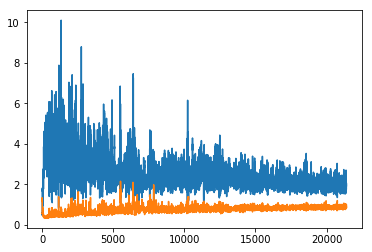

In [18]:
plt.plot(gen_loss_dir)
plt.plot(dis_loss_dir)

In [56]:
samples[25].shape

(1, 784)

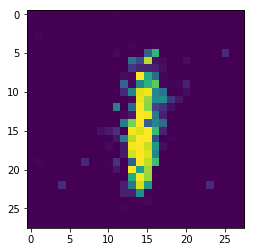

In [55]:
plt.imshow(samples[25].reshape(28,28))

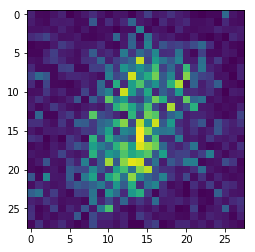

In [59]:
for i in range(10):
    plt.imshow(samples[i].reshape(28,28))

In [28]:
# #load model
# new_samples=[]
# saver = tf.train.Saver(var_list=g_vars)

# with tf.Session() as sess:
#     saver.restore(sess, './models/500_epochs.ckpt')
    
#     for x in range(5):
        
#         sample_z = np.random.uniform(-1,1,size=(1,100))
#         gen_sample = sess.run(generator(z, reuse=True), feed_dict={z:sample_z})
#         new_samples.append(gen_sample)